In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
train_df = pd.read_csv("train.csv", low_memory=False)
test_df = pd.read_csv("test.csv", low_memory=False)
data = pd.read_csv("data_set.csv", low_memory = False)

In [3]:
train_df = train_df[['id','precio']]
train_df['precio'].value_counts()

1500000.0    3041
2500000.0    3036
1200000.0    2909
3500000.0    2726
1300000.0    2480
             ... 
2704600.0       1
1352250.0       1
938260.0        1
2704460.0       1
2327000.0       1
Name: precio, Length: 15520, dtype: int64

In [4]:
features = pd.merge(train_df, data, on='id', how='inner')
features = features.fillna(0)
features['precio'].value_counts()

1500000.0    3041
2500000.0    3036
1200000.0    2909
3500000.0    2726
1300000.0    2480
             ... 
2704600.0       1
1352250.0       1
938260.0        1
2704460.0       1
2327000.0       1
Name: precio, Length: 15520, dtype: int64

In [5]:
labels = features['precio']
features = features.drop(['id','precio'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)
print("Train: ",len(x_train),"Test: ",len(x_test))

Train:  180000 Test:  60000


In [9]:
import catboost as cb
from catboost import CatBoostRegressor

params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300], }
cb = CatBoostRegressor()
cb_model = GridSearchCV(cb, params, scoring="neg_mean_absolute_error", cv = 3)
cb_model.fit(x_train, y_train)

0:	learn: 2122451.7926734	total: 58.7ms	remaining: 17.5s
1:	learn: 2097496.7596396	total: 69.5ms	remaining: 10.4s
2:	learn: 2074025.2884686	total: 80.3ms	remaining: 7.95s
3:	learn: 2052148.2747963	total: 91ms	remaining: 6.73s
4:	learn: 2029940.0529908	total: 102ms	remaining: 6.01s
5:	learn: 2008402.2739804	total: 113ms	remaining: 5.52s
6:	learn: 1987791.8746291	total: 123ms	remaining: 5.17s
7:	learn: 1968922.9946897	total: 134ms	remaining: 4.9s
8:	learn: 1950877.7942330	total: 145ms	remaining: 4.68s
9:	learn: 1932600.3098867	total: 156ms	remaining: 4.52s
10:	learn: 1915060.3754864	total: 166ms	remaining: 4.37s
11:	learn: 1897779.6566403	total: 177ms	remaining: 4.25s
12:	learn: 1881634.7902925	total: 188ms	remaining: 4.15s
13:	learn: 1865060.4683943	total: 199ms	remaining: 4.06s
14:	learn: 1849631.0534818	total: 209ms	remaining: 3.98s
15:	learn: 1835536.1148520	total: 220ms	remaining: 3.91s
16:	learn: 1821247.3954172	total: 231ms	remaining: 3.85s
17:	learn: 1807500.4771874	total: 241ms	

152:	learn: 1302229.5689049	total: 1.98s	remaining: 1.9s
153:	learn: 1301223.4169381	total: 2s	remaining: 1.89s
154:	learn: 1300407.4609170	total: 2.01s	remaining: 1.88s
155:	learn: 1299424.5211400	total: 2.02s	remaining: 1.87s
156:	learn: 1297948.3167432	total: 2.03s	remaining: 1.85s
157:	learn: 1297276.4841831	total: 2.04s	remaining: 1.84s
158:	learn: 1296061.3699800	total: 2.06s	remaining: 1.82s
159:	learn: 1295066.3029053	total: 2.07s	remaining: 1.81s
160:	learn: 1294123.4107926	total: 2.08s	remaining: 1.8s
161:	learn: 1293134.9045670	total: 2.09s	remaining: 1.78s
162:	learn: 1292043.7971449	total: 2.1s	remaining: 1.77s
163:	learn: 1290944.4120342	total: 2.12s	remaining: 1.76s
164:	learn: 1290091.9613661	total: 2.13s	remaining: 1.74s
165:	learn: 1289186.5143597	total: 2.14s	remaining: 1.73s
166:	learn: 1288533.6940476	total: 2.15s	remaining: 1.72s
167:	learn: 1287708.9877712	total: 2.17s	remaining: 1.7s
168:	learn: 1286816.6555742	total: 2.18s	remaining: 1.69s
169:	learn: 1285997.0

0:	learn: 2127455.3750152	total: 12.4ms	remaining: 3.72s
1:	learn: 2102585.2583015	total: 24.4ms	remaining: 3.63s
2:	learn: 2078778.2142558	total: 36.2ms	remaining: 3.58s
3:	learn: 2056148.1872287	total: 47.9ms	remaining: 3.55s
4:	learn: 2034754.6235361	total: 60.1ms	remaining: 3.55s
5:	learn: 2013042.7964959	total: 72.3ms	remaining: 3.54s
6:	learn: 1992080.3745636	total: 84.4ms	remaining: 3.53s
7:	learn: 1972972.9258292	total: 96.5ms	remaining: 3.52s
8:	learn: 1954737.7799604	total: 109ms	remaining: 3.53s
9:	learn: 1936754.3453800	total: 122ms	remaining: 3.52s
10:	learn: 1918928.3510092	total: 134ms	remaining: 3.51s
11:	learn: 1901900.1496822	total: 146ms	remaining: 3.5s
12:	learn: 1885748.7092880	total: 158ms	remaining: 3.48s
13:	learn: 1870397.4007041	total: 170ms	remaining: 3.47s
14:	learn: 1854300.7389533	total: 182ms	remaining: 3.45s
15:	learn: 1839009.4193600	total: 194ms	remaining: 3.45s
16:	learn: 1824524.9454105	total: 206ms	remaining: 3.43s
17:	learn: 1809930.4939873	total: 

150:	learn: 1312040.9734342	total: 1.92s	remaining: 1.89s
151:	learn: 1311038.8904881	total: 1.93s	remaining: 1.88s
152:	learn: 1310069.2174596	total: 1.95s	remaining: 1.87s
153:	learn: 1308983.2769869	total: 1.96s	remaining: 1.86s
154:	learn: 1307846.2630702	total: 1.97s	remaining: 1.84s
155:	learn: 1306784.4954599	total: 1.98s	remaining: 1.83s
156:	learn: 1305907.2038553	total: 2s	remaining: 1.82s
157:	learn: 1305172.1864538	total: 2.01s	remaining: 1.8s
158:	learn: 1303763.8331997	total: 2.02s	remaining: 1.79s
159:	learn: 1302871.0625830	total: 2.03s	remaining: 1.78s
160:	learn: 1301906.5599016	total: 2.04s	remaining: 1.76s
161:	learn: 1300900.6725454	total: 2.06s	remaining: 1.75s
162:	learn: 1300091.4624283	total: 2.07s	remaining: 1.74s
163:	learn: 1299085.9046282	total: 2.08s	remaining: 1.72s
164:	learn: 1298208.8690958	total: 2.09s	remaining: 1.71s
165:	learn: 1296771.8703229	total: 2.1s	remaining: 1.7s
166:	learn: 1295534.7618523	total: 2.12s	remaining: 1.68s
167:	learn: 1294589.

299:	learn: 1218346.6102517	total: 3.79s	remaining: 0us
0:	learn: 2129723.5653945	total: 12.9ms	remaining: 3.86s
1:	learn: 2104561.3997361	total: 25.3ms	remaining: 3.76s
2:	learn: 2080705.3316816	total: 37.5ms	remaining: 3.71s
3:	learn: 2057913.0950482	total: 49.8ms	remaining: 3.68s
4:	learn: 2036701.0629383	total: 61.8ms	remaining: 3.64s
5:	learn: 2015419.7160125	total: 74.1ms	remaining: 3.63s
6:	learn: 1995055.3333715	total: 86.8ms	remaining: 3.63s
7:	learn: 1976047.9010812	total: 99.4ms	remaining: 3.63s
8:	learn: 1957226.6192803	total: 112ms	remaining: 3.63s
9:	learn: 1939182.0582254	total: 125ms	remaining: 3.62s
10:	learn: 1920539.9313807	total: 137ms	remaining: 3.6s
11:	learn: 1903202.1488110	total: 150ms	remaining: 3.6s
12:	learn: 1886846.6516260	total: 163ms	remaining: 3.59s
13:	learn: 1870952.5467788	total: 175ms	remaining: 3.58s
14:	learn: 1855900.0091862	total: 188ms	remaining: 3.57s
15:	learn: 1840546.4540971	total: 200ms	remaining: 3.55s
16:	learn: 1825256.0715638	total: 21

143:	learn: 1319078.2030951	total: 1.9s	remaining: 2.06s
144:	learn: 1317659.6914240	total: 1.92s	remaining: 2.05s
145:	learn: 1316593.2960993	total: 1.93s	remaining: 2.04s
146:	learn: 1315451.8606681	total: 1.95s	remaining: 2.03s
147:	learn: 1314340.1598063	total: 1.96s	remaining: 2.01s
148:	learn: 1313251.2924047	total: 1.97s	remaining: 2s
149:	learn: 1312445.4613994	total: 1.99s	remaining: 1.99s
150:	learn: 1311375.4444035	total: 2s	remaining: 1.97s
151:	learn: 1310100.0491797	total: 2.01s	remaining: 1.96s
152:	learn: 1309063.3407088	total: 2.02s	remaining: 1.94s
153:	learn: 1307953.8737442	total: 2.04s	remaining: 1.93s
154:	learn: 1306860.6377463	total: 2.05s	remaining: 1.92s
155:	learn: 1306013.1382692	total: 2.06s	remaining: 1.9s
156:	learn: 1305247.1952780	total: 2.07s	remaining: 1.89s
157:	learn: 1304304.8249213	total: 2.08s	remaining: 1.87s
158:	learn: 1303477.0346124	total: 2.1s	remaining: 1.86s
159:	learn: 1302479.5833542	total: 2.11s	remaining: 1.85s
160:	learn: 1301433.141

289:	learn: 1221216.5566339	total: 3.84s	remaining: 132ms
290:	learn: 1220811.2154492	total: 3.85s	remaining: 119ms
291:	learn: 1220437.3384837	total: 3.87s	remaining: 106ms
292:	learn: 1219940.3761879	total: 3.88s	remaining: 92.7ms
293:	learn: 1219580.6177155	total: 3.89s	remaining: 79.4ms
294:	learn: 1219214.2927964	total: 3.9s	remaining: 66.2ms
295:	learn: 1218858.0922405	total: 3.92s	remaining: 52.9ms
296:	learn: 1218510.6154683	total: 3.93s	remaining: 39.7ms
297:	learn: 1218104.5148259	total: 3.94s	remaining: 26.4ms
298:	learn: 1217743.8684984	total: 3.95s	remaining: 13.2ms
299:	learn: 1217253.9390407	total: 3.96s	remaining: 0us
0:	learn: 2065669.2211227	total: 12.5ms	remaining: 3.75s
1:	learn: 1991122.1430511	total: 24.4ms	remaining: 3.64s
2:	learn: 1927246.6847367	total: 36.1ms	remaining: 3.58s
3:	learn: 1870679.0670631	total: 48.2ms	remaining: 3.57s
4:	learn: 1821518.4207209	total: 60.1ms	remaining: 3.55s
5:	learn: 1773805.4165375	total: 72.5ms	remaining: 3.55s
6:	learn: 173403

145:	learn: 1158782.6909978	total: 1.92s	remaining: 2.02s
146:	learn: 1157576.5235073	total: 1.93s	remaining: 2.01s
147:	learn: 1156952.4324066	total: 1.95s	remaining: 2s
148:	learn: 1156200.7617537	total: 1.96s	remaining: 1.99s
149:	learn: 1155584.2993654	total: 1.97s	remaining: 1.97s
150:	learn: 1154516.4426119	total: 1.98s	remaining: 1.96s
151:	learn: 1153853.6591696	total: 2s	remaining: 1.94s
152:	learn: 1152909.1841349	total: 2.01s	remaining: 1.93s
153:	learn: 1152312.6598256	total: 2.02s	remaining: 1.91s
154:	learn: 1151505.3622632	total: 2.03s	remaining: 1.9s
155:	learn: 1150858.6582829	total: 2.04s	remaining: 1.89s
156:	learn: 1150381.6092326	total: 2.05s	remaining: 1.87s
157:	learn: 1149544.2077024	total: 2.07s	remaining: 1.86s
158:	learn: 1149075.3137011	total: 2.08s	remaining: 1.84s
159:	learn: 1148491.8133550	total: 2.09s	remaining: 1.83s
160:	learn: 1148137.7836342	total: 2.1s	remaining: 1.81s
161:	learn: 1147727.3626525	total: 2.11s	remaining: 1.8s
162:	learn: 1147153.806

295:	learn: 1095749.5662082	total: 3.81s	remaining: 51.5ms
296:	learn: 1095525.1693241	total: 3.83s	remaining: 38.7ms
297:	learn: 1095174.4624234	total: 3.85s	remaining: 25.8ms
298:	learn: 1094913.1599670	total: 3.86s	remaining: 12.9ms
299:	learn: 1094655.6590573	total: 3.88s	remaining: 0us
0:	learn: 2070637.1861555	total: 12.3ms	remaining: 3.69s
1:	learn: 1997271.2811157	total: 24.3ms	remaining: 3.62s
2:	learn: 1931791.2067989	total: 35.9ms	remaining: 3.55s
3:	learn: 1874988.4943061	total: 47.9ms	remaining: 3.55s
4:	learn: 1827652.0649884	total: 59.4ms	remaining: 3.5s
5:	learn: 1780667.4496663	total: 71.3ms	remaining: 3.5s
6:	learn: 1735532.8422052	total: 83.5ms	remaining: 3.49s
7:	learn: 1699990.7090408	total: 95.5ms	remaining: 3.48s
8:	learn: 1667445.8604926	total: 107ms	remaining: 3.47s
9:	learn: 1638377.2619304	total: 120ms	remaining: 3.47s
10:	learn: 1611612.3975024	total: 132ms	remaining: 3.46s
11:	learn: 1588519.9312035	total: 143ms	remaining: 3.44s
12:	learn: 1564559.4741357	t

151:	learn: 1160126.7901130	total: 1.92s	remaining: 1.86s
152:	learn: 1159518.6199060	total: 1.93s	remaining: 1.85s
153:	learn: 1158832.3373567	total: 1.94s	remaining: 1.84s
154:	learn: 1158148.0360112	total: 1.95s	remaining: 1.83s
155:	learn: 1157719.3078439	total: 1.96s	remaining: 1.81s
156:	learn: 1157120.6815503	total: 1.98s	remaining: 1.8s
157:	learn: 1156733.9993143	total: 1.99s	remaining: 1.79s
158:	learn: 1156081.7553481	total: 2s	remaining: 1.77s
159:	learn: 1155565.7204633	total: 2.01s	remaining: 1.76s
160:	learn: 1155018.0126051	total: 2.02s	remaining: 1.75s
161:	learn: 1154388.9187953	total: 2.04s	remaining: 1.73s
162:	learn: 1153963.3844711	total: 2.05s	remaining: 1.72s
163:	learn: 1153401.3479450	total: 2.06s	remaining: 1.71s
164:	learn: 1152771.6572316	total: 2.07s	remaining: 1.7s
165:	learn: 1151968.1643769	total: 2.08s	remaining: 1.68s
166:	learn: 1151369.4685984	total: 2.1s	remaining: 1.67s
167:	learn: 1150635.3793259	total: 2.11s	remaining: 1.66s
168:	learn: 1150078.

0:	learn: 2071694.4311785	total: 12.8ms	remaining: 3.82s
1:	learn: 1997418.8558981	total: 25.2ms	remaining: 3.75s
2:	learn: 1933678.8624418	total: 37.7ms	remaining: 3.73s
3:	learn: 1875372.6716549	total: 50.7ms	remaining: 3.75s
4:	learn: 1825898.1788358	total: 62.8ms	remaining: 3.71s
5:	learn: 1782363.8266380	total: 79.5ms	remaining: 3.9s
6:	learn: 1739697.4668598	total: 92.1ms	remaining: 3.85s
7:	learn: 1700789.6540681	total: 105ms	remaining: 3.82s
8:	learn: 1667155.9512675	total: 117ms	remaining: 3.78s
9:	learn: 1638376.9812949	total: 130ms	remaining: 3.76s
10:	learn: 1613542.9105594	total: 142ms	remaining: 3.73s
11:	learn: 1590097.5644105	total: 154ms	remaining: 3.7s
12:	learn: 1568233.5270197	total: 167ms	remaining: 3.69s
13:	learn: 1549847.9546558	total: 180ms	remaining: 3.67s
14:	learn: 1530420.3676002	total: 192ms	remaining: 3.66s
15:	learn: 1516514.9168980	total: 205ms	remaining: 3.63s
16:	learn: 1502363.2365373	total: 228ms	remaining: 3.8s
17:	learn: 1490714.1883735	total: 241

147:	learn: 1162713.4487023	total: 1.94s	remaining: 1.99s
148:	learn: 1162033.5469772	total: 1.95s	remaining: 1.98s
149:	learn: 1161365.8035929	total: 1.97s	remaining: 1.97s
150:	learn: 1160496.0326989	total: 1.98s	remaining: 1.95s
151:	learn: 1159914.4608162	total: 1.99s	remaining: 1.94s
152:	learn: 1158948.0839306	total: 2s	remaining: 1.92s
153:	learn: 1158430.5962194	total: 2.02s	remaining: 1.91s
154:	learn: 1157872.6892653	total: 2.03s	remaining: 1.9s
155:	learn: 1157309.8524591	total: 2.04s	remaining: 1.88s
156:	learn: 1156815.4825707	total: 2.05s	remaining: 1.87s
157:	learn: 1156366.2076927	total: 2.06s	remaining: 1.85s
158:	learn: 1155796.3612419	total: 2.08s	remaining: 1.84s
159:	learn: 1155217.1318709	total: 2.09s	remaining: 1.83s
160:	learn: 1154858.2601508	total: 2.1s	remaining: 1.81s
161:	learn: 1154458.0586313	total: 2.11s	remaining: 1.8s
162:	learn: 1153722.1970114	total: 2.12s	remaining: 1.78s
163:	learn: 1153052.3521527	total: 2.14s	remaining: 1.77s
164:	learn: 1152496.

296:	learn: 1099713.5498340	total: 3.87s	remaining: 39.1ms
297:	learn: 1099383.8900141	total: 3.88s	remaining: 26.1ms
298:	learn: 1098850.1846075	total: 3.9s	remaining: 13ms
299:	learn: 1098427.2427179	total: 3.91s	remaining: 0us
0:	learn: 2026824.4982634	total: 12.6ms	remaining: 3.77s
1:	learn: 1923809.2766884	total: 24.6ms	remaining: 3.66s
2:	learn: 1840856.5353973	total: 36.3ms	remaining: 3.6s
3:	learn: 1766181.2090040	total: 48.2ms	remaining: 3.56s
4:	learn: 1707181.8169371	total: 60.3ms	remaining: 3.56s
5:	learn: 1653718.5612495	total: 72.2ms	remaining: 3.54s
6:	learn: 1615018.3483470	total: 83.9ms	remaining: 3.51s
7:	learn: 1576762.9837571	total: 95.9ms	remaining: 3.5s
8:	learn: 1540993.7955476	total: 108ms	remaining: 3.49s
9:	learn: 1512365.1227457	total: 121ms	remaining: 3.5s
10:	learn: 1488775.7774796	total: 133ms	remaining: 3.5s
11:	learn: 1471427.2960139	total: 145ms	remaining: 3.48s
12:	learn: 1452696.1244681	total: 157ms	remaining: 3.47s
13:	learn: 1438293.8918917	total: 1

148:	learn: 1119115.3895180	total: 1.9s	remaining: 1.93s
149:	learn: 1118675.1159967	total: 1.92s	remaining: 1.92s
150:	learn: 1118187.8518039	total: 1.93s	remaining: 1.9s
151:	learn: 1117419.8280540	total: 1.94s	remaining: 1.89s
152:	learn: 1117036.2483697	total: 1.95s	remaining: 1.88s
153:	learn: 1116727.4496730	total: 1.97s	remaining: 1.86s
154:	learn: 1115896.8333420	total: 1.98s	remaining: 1.85s
155:	learn: 1115362.3118725	total: 1.99s	remaining: 1.84s
156:	learn: 1114654.8068485	total: 2s	remaining: 1.82s
157:	learn: 1114362.9574067	total: 2.01s	remaining: 1.81s
158:	learn: 1113960.5290711	total: 2.02s	remaining: 1.79s
159:	learn: 1113519.2734777	total: 2.04s	remaining: 1.78s
160:	learn: 1113158.7029032	total: 2.05s	remaining: 1.77s
161:	learn: 1112427.6475303	total: 2.06s	remaining: 1.75s
162:	learn: 1112055.9495422	total: 2.07s	remaining: 1.74s
163:	learn: 1111826.1266592	total: 2.08s	remaining: 1.73s
164:	learn: 1111489.8914006	total: 2.1s	remaining: 1.71s
165:	learn: 1110870.

0:	learn: 2031769.7218366	total: 12.4ms	remaining: 3.72s
1:	learn: 1925641.3588465	total: 24.3ms	remaining: 3.62s
2:	learn: 1842025.8270419	total: 35.9ms	remaining: 3.56s
3:	learn: 1768691.0314765	total: 47.5ms	remaining: 3.51s
4:	learn: 1704026.2443258	total: 59.6ms	remaining: 3.52s
5:	learn: 1655483.2206384	total: 71.5ms	remaining: 3.5s
6:	learn: 1614716.9138291	total: 83.3ms	remaining: 3.49s
7:	learn: 1578114.8507660	total: 95.4ms	remaining: 3.48s
8:	learn: 1549449.1726682	total: 107ms	remaining: 3.47s
9:	learn: 1520049.9265445	total: 120ms	remaining: 3.48s
10:	learn: 1499837.4203944	total: 132ms	remaining: 3.46s
11:	learn: 1476023.4137195	total: 144ms	remaining: 3.46s
12:	learn: 1461165.1329517	total: 156ms	remaining: 3.44s
13:	learn: 1443697.1533998	total: 168ms	remaining: 3.43s
14:	learn: 1426690.2322284	total: 180ms	remaining: 3.43s
15:	learn: 1416332.1475884	total: 192ms	remaining: 3.41s
16:	learn: 1405871.4813087	total: 204ms	remaining: 3.39s
17:	learn: 1392163.8318910	total: 

153:	learn: 1122129.9838221	total: 1.93s	remaining: 1.83s
154:	learn: 1121567.2145514	total: 1.95s	remaining: 1.82s
155:	learn: 1120947.5455143	total: 1.96s	remaining: 1.81s
156:	learn: 1119813.1766231	total: 1.97s	remaining: 1.8s
157:	learn: 1119271.8560661	total: 1.99s	remaining: 1.78s
158:	learn: 1118637.2077309	total: 2s	remaining: 1.77s
159:	learn: 1118051.0168915	total: 2.01s	remaining: 1.76s
160:	learn: 1117091.9549948	total: 2.02s	remaining: 1.75s
161:	learn: 1116793.7203009	total: 2.03s	remaining: 1.73s
162:	learn: 1116484.2164136	total: 2.05s	remaining: 1.72s
163:	learn: 1116135.7223845	total: 2.06s	remaining: 1.71s
164:	learn: 1115744.3309332	total: 2.07s	remaining: 1.69s
165:	learn: 1115019.7087061	total: 2.08s	remaining: 1.68s
166:	learn: 1114402.4080561	total: 2.09s	remaining: 1.67s
167:	learn: 1113997.8083310	total: 2.1s	remaining: 1.65s
168:	learn: 1113525.4315106	total: 2.12s	remaining: 1.64s
169:	learn: 1113297.4810635	total: 2.13s	remaining: 1.63s
170:	learn: 1112657

298:	learn: 1066310.8918530	total: 3.82s	remaining: 12.8ms
299:	learn: 1065908.4762230	total: 3.83s	remaining: 0us
0:	learn: 2031980.4568942	total: 12.9ms	remaining: 3.86s
1:	learn: 1932446.6354629	total: 25ms	remaining: 3.73s
2:	learn: 1849810.0956448	total: 37.2ms	remaining: 3.68s
3:	learn: 1774923.9337893	total: 49.3ms	remaining: 3.65s
4:	learn: 1713648.5806955	total: 61.8ms	remaining: 3.65s
5:	learn: 1657031.5432713	total: 74.3ms	remaining: 3.64s
6:	learn: 1618209.3033894	total: 87ms	remaining: 3.64s
7:	learn: 1581400.1319835	total: 99.4ms	remaining: 3.63s
8:	learn: 1549102.5026960	total: 112ms	remaining: 3.62s
9:	learn: 1525743.2401733	total: 124ms	remaining: 3.6s
10:	learn: 1497581.5191583	total: 137ms	remaining: 3.61s
11:	learn: 1480270.0818597	total: 150ms	remaining: 3.59s
12:	learn: 1460985.6210750	total: 163ms	remaining: 3.61s
13:	learn: 1443938.6210544	total: 176ms	remaining: 3.59s
14:	learn: 1432129.2010938	total: 188ms	remaining: 3.57s
15:	learn: 1417381.1093070	total: 200

157:	learn: 1118685.5106163	total: 2.1s	remaining: 1.89s
158:	learn: 1118172.3745011	total: 2.11s	remaining: 1.88s
159:	learn: 1117934.5390533	total: 2.13s	remaining: 1.86s
160:	learn: 1117528.9772426	total: 2.14s	remaining: 1.85s
161:	learn: 1116980.9284311	total: 2.15s	remaining: 1.84s
162:	learn: 1116568.4801498	total: 2.17s	remaining: 1.82s
163:	learn: 1115495.1224589	total: 2.18s	remaining: 1.81s
164:	learn: 1114756.7444409	total: 2.2s	remaining: 1.8s
165:	learn: 1114215.0848191	total: 2.21s	remaining: 1.78s
166:	learn: 1113863.2633951	total: 2.22s	remaining: 1.77s
167:	learn: 1113407.2671560	total: 2.23s	remaining: 1.75s
168:	learn: 1113129.9080106	total: 2.24s	remaining: 1.74s
169:	learn: 1112801.3913152	total: 2.25s	remaining: 1.72s
170:	learn: 1112356.5757772	total: 2.27s	remaining: 1.71s
171:	learn: 1111758.1230039	total: 2.28s	remaining: 1.7s
172:	learn: 1111432.2688849	total: 2.29s	remaining: 1.68s
173:	learn: 1110986.5121539	total: 2.31s	remaining: 1.67s
174:	learn: 111064

0:	learn: 2122492.2924800	total: 12.5ms	remaining: 3.74s
1:	learn: 2097551.8697197	total: 24.5ms	remaining: 3.64s
2:	learn: 2074093.0084221	total: 36.3ms	remaining: 3.6s
3:	learn: 2052244.6500600	total: 48.1ms	remaining: 3.56s
4:	learn: 2030045.7280272	total: 60.1ms	remaining: 3.54s
5:	learn: 2008517.2271213	total: 72.1ms	remaining: 3.53s
6:	learn: 1987915.6831216	total: 83.9ms	remaining: 3.51s
7:	learn: 1969054.2872133	total: 95.8ms	remaining: 3.5s
8:	learn: 1951034.0181470	total: 108ms	remaining: 3.49s
9:	learn: 1932765.6363811	total: 120ms	remaining: 3.49s
10:	learn: 1915233.9046136	total: 132ms	remaining: 3.48s
11:	learn: 1897959.2834097	total: 144ms	remaining: 3.46s
12:	learn: 1881819.7440827	total: 157ms	remaining: 3.46s
13:	learn: 1865256.7731598	total: 169ms	remaining: 3.45s
14:	learn: 1849848.5672865	total: 181ms	remaining: 3.44s
15:	learn: 1835771.6542027	total: 193ms	remaining: 3.43s
16:	learn: 1821479.1446976	total: 205ms	remaining: 3.41s
17:	learn: 1807695.4906633	total: 2

147:	learn: 1306789.4777715	total: 1.88s	remaining: 1.94s
148:	learn: 1305941.4542218	total: 1.9s	remaining: 1.92s
149:	learn: 1304800.9504210	total: 1.91s	remaining: 1.91s
150:	learn: 1303579.8615541	total: 1.92s	remaining: 1.9s
151:	learn: 1302580.9000264	total: 1.94s	remaining: 1.89s
152:	learn: 1301812.0296850	total: 1.95s	remaining: 1.87s
153:	learn: 1300485.4249385	total: 1.96s	remaining: 1.86s
154:	learn: 1299176.9115915	total: 1.97s	remaining: 1.84s
155:	learn: 1298146.4339448	total: 1.99s	remaining: 1.83s
156:	learn: 1297167.9216015	total: 2s	remaining: 1.82s
157:	learn: 1296145.2414039	total: 2.01s	remaining: 1.81s
158:	learn: 1295261.2671023	total: 2.02s	remaining: 1.8s
159:	learn: 1294029.5287242	total: 2.04s	remaining: 1.78s
160:	learn: 1293100.7963221	total: 2.05s	remaining: 1.77s
161:	learn: 1292113.8957826	total: 2.06s	remaining: 1.76s
162:	learn: 1291318.1344088	total: 2.07s	remaining: 1.74s
163:	learn: 1290098.2329283	total: 2.09s	remaining: 1.73s
164:	learn: 1289297.

296:	learn: 1212117.0776802	total: 3.78s	remaining: 38.2ms
297:	learn: 1211756.3968889	total: 3.8s	remaining: 25.5ms
298:	learn: 1211428.5703749	total: 3.81s	remaining: 12.8ms
299:	learn: 1211112.0024695	total: 3.82s	remaining: 0us
0:	learn: 2127495.3796173	total: 12.4ms	remaining: 3.72s
1:	learn: 2102641.8902310	total: 24.4ms	remaining: 3.64s
2:	learn: 2078847.8064181	total: 36.4ms	remaining: 3.6s
3:	learn: 2056229.8126684	total: 48.7ms	remaining: 3.6s
4:	learn: 2034868.4900577	total: 61ms	remaining: 3.6s
5:	learn: 2013165.9253822	total: 73.2ms	remaining: 3.59s
6:	learn: 1992212.6912255	total: 85.4ms	remaining: 3.57s
7:	learn: 1973112.6017200	total: 97.5ms	remaining: 3.56s
8:	learn: 1954900.5136364	total: 110ms	remaining: 3.57s
9:	learn: 1936925.3073333	total: 123ms	remaining: 3.56s
10:	learn: 1919107.3588278	total: 135ms	remaining: 3.54s
11:	learn: 1902085.8667641	total: 147ms	remaining: 3.52s
12:	learn: 1885940.1451622	total: 159ms	remaining: 3.51s
13:	learn: 1870592.1858257	total: 

147:	learn: 1315466.5681523	total: 1.89s	remaining: 1.94s
148:	learn: 1314345.8639619	total: 1.9s	remaining: 1.93s
149:	learn: 1313427.0852208	total: 1.92s	remaining: 1.92s
150:	learn: 1312480.4532557	total: 1.93s	remaining: 1.9s
151:	learn: 1311195.7026964	total: 1.94s	remaining: 1.89s
152:	learn: 1309871.7476387	total: 1.95s	remaining: 1.87s
153:	learn: 1308631.4054504	total: 1.96s	remaining: 1.86s
154:	learn: 1307633.7476832	total: 1.97s	remaining: 1.85s
155:	learn: 1306638.2613194	total: 1.99s	remaining: 1.83s
156:	learn: 1305261.0484648	total: 2s	remaining: 1.82s
157:	learn: 1304560.8566031	total: 2.01s	remaining: 1.81s
158:	learn: 1303774.4807927	total: 2.02s	remaining: 1.79s
159:	learn: 1302536.7122378	total: 2.04s	remaining: 1.78s
160:	learn: 1301568.1261841	total: 2.05s	remaining: 1.77s
161:	learn: 1300548.4918151	total: 2.06s	remaining: 1.76s
162:	learn: 1299727.9094098	total: 2.08s	remaining: 1.75s
163:	learn: 1298693.8083218	total: 2.1s	remaining: 1.74s
164:	learn: 1297730.

294:	learn: 1219221.6174319	total: 3.77s	remaining: 64ms
295:	learn: 1218760.1641191	total: 3.79s	remaining: 51.2ms
296:	learn: 1218511.0981675	total: 3.8s	remaining: 38.4ms
297:	learn: 1218128.7608364	total: 3.81s	remaining: 25.6ms
298:	learn: 1217784.2830861	total: 3.83s	remaining: 12.8ms
299:	learn: 1217470.7262930	total: 3.84s	remaining: 0us
0:	learn: 2129737.6564183	total: 13.5ms	remaining: 4.04s
1:	learn: 2104591.4502398	total: 26ms	remaining: 3.88s
2:	learn: 2080749.1313576	total: 38.7ms	remaining: 3.83s
3:	learn: 2057967.5655511	total: 51.5ms	remaining: 3.81s
4:	learn: 2036773.8789176	total: 64ms	remaining: 3.77s
5:	learn: 2015504.1929779	total: 76.5ms	remaining: 3.75s
6:	learn: 1995148.2233390	total: 89.4ms	remaining: 3.74s
7:	learn: 1976148.4081849	total: 102ms	remaining: 3.71s
8:	learn: 1957362.1165102	total: 114ms	remaining: 3.7s
9:	learn: 1939325.5155774	total: 127ms	remaining: 3.69s
10:	learn: 1920697.7384373	total: 139ms	remaining: 3.66s
11:	learn: 1903370.5993601	total:

141:	learn: 1321312.4142000	total: 1.89s	remaining: 2.1s
142:	learn: 1319999.0792646	total: 1.9s	remaining: 2.09s
143:	learn: 1319117.6476088	total: 1.91s	remaining: 2.07s
144:	learn: 1318316.6294032	total: 1.93s	remaining: 2.06s
145:	learn: 1317098.7792837	total: 1.94s	remaining: 2.05s
146:	learn: 1315979.7595680	total: 1.95s	remaining: 2.03s
147:	learn: 1314845.0530491	total: 1.97s	remaining: 2.02s
148:	learn: 1313531.8638281	total: 1.98s	remaining: 2s
149:	learn: 1312456.3902430	total: 1.99s	remaining: 1.99s
150:	learn: 1311374.5866526	total: 2s	remaining: 1.98s
151:	learn: 1310064.8256873	total: 2.02s	remaining: 1.96s
152:	learn: 1309048.3238623	total: 2.03s	remaining: 1.95s
153:	learn: 1308008.5779995	total: 2.04s	remaining: 1.94s
154:	learn: 1306832.0552538	total: 2.06s	remaining: 1.92s
155:	learn: 1306019.0775890	total: 2.07s	remaining: 1.91s
156:	learn: 1305312.5305776	total: 2.08s	remaining: 1.9s
157:	learn: 1304405.7844183	total: 2.1s	remaining: 1.89s
158:	learn: 1303788.1523

285:	learn: 1222517.3168365	total: 3.78s	remaining: 185ms
286:	learn: 1222115.6243442	total: 3.8s	remaining: 172ms
287:	learn: 1221839.1480725	total: 3.81s	remaining: 159ms
288:	learn: 1221515.8903122	total: 3.83s	remaining: 146ms
289:	learn: 1221183.2818684	total: 3.84s	remaining: 132ms
290:	learn: 1220769.8650137	total: 3.85s	remaining: 119ms
291:	learn: 1220161.6485579	total: 3.86s	remaining: 106ms
292:	learn: 1219740.5187715	total: 3.88s	remaining: 92.6ms
293:	learn: 1219365.0574146	total: 3.89s	remaining: 79.4ms
294:	learn: 1218996.1454576	total: 3.9s	remaining: 66.2ms
295:	learn: 1218647.8773111	total: 3.92s	remaining: 52.9ms
296:	learn: 1218193.1783944	total: 3.93s	remaining: 39.7ms
297:	learn: 1217771.2880230	total: 3.94s	remaining: 26.4ms
298:	learn: 1217376.5005519	total: 3.95s	remaining: 13.2ms
299:	learn: 1216872.2197833	total: 3.96s	remaining: 0us
0:	learn: 2065797.9582200	total: 12.7ms	remaining: 3.79s
1:	learn: 1991286.8939487	total: 24.7ms	remaining: 3.67s
2:	learn: 192

134:	learn: 1165714.4762113	total: 1.69s	remaining: 2.07s
135:	learn: 1165027.9021592	total: 1.71s	remaining: 2.07s
136:	learn: 1164275.5269873	total: 1.73s	remaining: 2.06s
137:	learn: 1163702.4135363	total: 1.74s	remaining: 2.04s
138:	learn: 1162932.7921672	total: 1.75s	remaining: 2.03s
139:	learn: 1162446.9169589	total: 1.76s	remaining: 2.02s
140:	learn: 1161267.6572094	total: 1.77s	remaining: 2s
141:	learn: 1160686.1862854	total: 1.79s	remaining: 1.99s
142:	learn: 1159997.1822125	total: 1.8s	remaining: 1.97s
143:	learn: 1159250.8173869	total: 1.81s	remaining: 1.96s
144:	learn: 1158934.2594533	total: 1.82s	remaining: 1.95s
145:	learn: 1158411.5153676	total: 1.83s	remaining: 1.93s
146:	learn: 1157754.2324915	total: 1.84s	remaining: 1.92s
147:	learn: 1157249.7610576	total: 1.86s	remaining: 1.91s
148:	learn: 1156800.0087804	total: 1.87s	remaining: 1.89s
149:	learn: 1156062.8766174	total: 1.88s	remaining: 1.88s
150:	learn: 1155682.1182522	total: 1.89s	remaining: 1.87s
151:	learn: 115527

285:	learn: 1097918.5704744	total: 3.62s	remaining: 177ms
286:	learn: 1097377.6750717	total: 3.63s	remaining: 165ms
287:	learn: 1097047.8061589	total: 3.64s	remaining: 152ms
288:	learn: 1096784.8520654	total: 3.65s	remaining: 139ms
289:	learn: 1096627.8734123	total: 3.67s	remaining: 126ms
290:	learn: 1096461.5234319	total: 3.68s	remaining: 114ms
291:	learn: 1096137.2230211	total: 3.69s	remaining: 101ms
292:	learn: 1095896.6732324	total: 3.7s	remaining: 88.4ms
293:	learn: 1095622.1700300	total: 3.71s	remaining: 75.8ms
294:	learn: 1095269.7550814	total: 3.73s	remaining: 63.1ms
295:	learn: 1095058.6853716	total: 3.74s	remaining: 50.5ms
296:	learn: 1094835.6586583	total: 3.75s	remaining: 37.9ms
297:	learn: 1094381.6445270	total: 3.76s	remaining: 25.2ms
298:	learn: 1094247.8564744	total: 3.77s	remaining: 12.6ms
299:	learn: 1093973.1942969	total: 3.78s	remaining: 0us
0:	learn: 2070764.3434162	total: 12.3ms	remaining: 3.69s
1:	learn: 1997439.2494854	total: 24.1ms	remaining: 3.59s
2:	learn: 19

132:	learn: 1174391.2269943	total: 1.68s	remaining: 2.11s
133:	learn: 1173494.4012458	total: 1.7s	remaining: 2.1s
134:	learn: 1172650.6393806	total: 1.71s	remaining: 2.09s
135:	learn: 1172018.7022479	total: 1.72s	remaining: 2.08s
136:	learn: 1171577.4548968	total: 1.74s	remaining: 2.06s
137:	learn: 1170900.1170101	total: 1.75s	remaining: 2.05s
138:	learn: 1169991.4863153	total: 1.76s	remaining: 2.04s
139:	learn: 1169316.5769750	total: 1.77s	remaining: 2.02s
140:	learn: 1168632.7406196	total: 1.78s	remaining: 2.01s
141:	learn: 1168032.3369951	total: 1.79s	remaining: 2s
142:	learn: 1167669.6711710	total: 1.8s	remaining: 1.98s
143:	learn: 1167167.4495634	total: 1.81s	remaining: 1.97s
144:	learn: 1166426.3361094	total: 1.83s	remaining: 1.95s
145:	learn: 1165299.3814780	total: 1.84s	remaining: 1.94s
146:	learn: 1164557.9602978	total: 1.85s	remaining: 1.93s
147:	learn: 1164085.2699076	total: 1.86s	remaining: 1.91s
148:	learn: 1163384.0295395	total: 1.88s	remaining: 1.9s
149:	learn: 1162578.8

284:	learn: 1104484.7773609	total: 3.59s	remaining: 189ms
285:	learn: 1103927.5307076	total: 3.61s	remaining: 177ms
286:	learn: 1103548.1159897	total: 3.62s	remaining: 164ms
287:	learn: 1103310.7231201	total: 3.64s	remaining: 152ms
288:	learn: 1102603.1830720	total: 3.65s	remaining: 139ms
289:	learn: 1102419.9097877	total: 3.66s	remaining: 126ms
290:	learn: 1102084.5133161	total: 3.67s	remaining: 114ms
291:	learn: 1101761.2144801	total: 3.69s	remaining: 101ms
292:	learn: 1101284.9844624	total: 3.7s	remaining: 88.4ms
293:	learn: 1100980.0473679	total: 3.71s	remaining: 75.7ms
294:	learn: 1100564.5392249	total: 3.72s	remaining: 63.1ms
295:	learn: 1100417.2000930	total: 3.73s	remaining: 50.5ms
296:	learn: 1100235.5212780	total: 3.74s	remaining: 37.8ms
297:	learn: 1099671.9662511	total: 3.76s	remaining: 25.2ms
298:	learn: 1099427.4574364	total: 3.77s	remaining: 12.6ms
299:	learn: 1099016.6989816	total: 3.78s	remaining: 0us
0:	learn: 2071739.2350787	total: 12.8ms	remaining: 3.83s
1:	learn: 1

129:	learn: 1176998.9002041	total: 1.69s	remaining: 2.21s
130:	learn: 1175994.8481774	total: 1.71s	remaining: 2.2s
131:	learn: 1175229.4836194	total: 1.72s	remaining: 2.19s
132:	learn: 1174484.9492037	total: 1.74s	remaining: 2.18s
133:	learn: 1173278.9111978	total: 1.75s	remaining: 2.16s
134:	learn: 1172496.0423563	total: 1.76s	remaining: 2.15s
135:	learn: 1171929.6900598	total: 1.77s	remaining: 2.13s
136:	learn: 1171311.3036914	total: 1.78s	remaining: 2.12s
137:	learn: 1170494.8050583	total: 1.79s	remaining: 2.11s
138:	learn: 1169920.9758741	total: 1.81s	remaining: 2.09s
139:	learn: 1169127.9327661	total: 1.82s	remaining: 2.08s
140:	learn: 1168757.3187263	total: 1.83s	remaining: 2.06s
141:	learn: 1168087.3793411	total: 1.84s	remaining: 2.05s
142:	learn: 1166847.3359757	total: 1.86s	remaining: 2.04s
143:	learn: 1166349.3238257	total: 1.87s	remaining: 2.02s
144:	learn: 1165533.8705195	total: 1.88s	remaining: 2.01s
145:	learn: 1164964.8444125	total: 1.9s	remaining: 2s
146:	learn: 1164101

276:	learn: 1107117.8641032	total: 3.59s	remaining: 298ms
277:	learn: 1106738.3762362	total: 3.61s	remaining: 286ms
278:	learn: 1106355.7427212	total: 3.62s	remaining: 273ms
279:	learn: 1106199.9683633	total: 3.63s	remaining: 260ms
280:	learn: 1106029.2559852	total: 3.65s	remaining: 247ms
281:	learn: 1105839.9779892	total: 3.66s	remaining: 234ms
282:	learn: 1105490.8479648	total: 3.67s	remaining: 221ms
283:	learn: 1105244.5329861	total: 3.68s	remaining: 208ms
284:	learn: 1104957.1080900	total: 3.69s	remaining: 195ms
285:	learn: 1104689.1851131	total: 3.71s	remaining: 182ms
286:	learn: 1104414.2107032	total: 3.72s	remaining: 169ms
287:	learn: 1104132.2655271	total: 3.73s	remaining: 156ms
288:	learn: 1103727.2293575	total: 3.75s	remaining: 143ms
289:	learn: 1103561.3757512	total: 3.76s	remaining: 130ms
290:	learn: 1103123.1906226	total: 3.77s	remaining: 117ms
291:	learn: 1102898.9050470	total: 3.79s	remaining: 104ms
292:	learn: 1102122.3334789	total: 3.81s	remaining: 90.9ms
293:	learn: 1

130:	learn: 1132640.3510828	total: 1.67s	remaining: 2.15s
131:	learn: 1132025.9045295	total: 1.68s	remaining: 2.14s
132:	learn: 1131274.1908968	total: 1.69s	remaining: 2.12s
133:	learn: 1130704.7195007	total: 1.7s	remaining: 2.11s
134:	learn: 1129455.9072289	total: 1.71s	remaining: 2.1s
135:	learn: 1128949.0239313	total: 1.73s	remaining: 2.08s
136:	learn: 1128459.4406735	total: 1.74s	remaining: 2.07s
137:	learn: 1128029.3221816	total: 1.75s	remaining: 2.05s
138:	learn: 1127684.0657579	total: 1.76s	remaining: 2.04s
139:	learn: 1127058.3137470	total: 1.77s	remaining: 2.03s
140:	learn: 1126654.4739572	total: 1.78s	remaining: 2.01s
141:	learn: 1126317.4634729	total: 1.8s	remaining: 2s
142:	learn: 1125766.0133922	total: 1.81s	remaining: 1.99s
143:	learn: 1125144.8628629	total: 1.82s	remaining: 1.97s
144:	learn: 1124832.1608887	total: 1.83s	remaining: 1.96s
145:	learn: 1124186.8043953	total: 1.84s	remaining: 1.95s
146:	learn: 1123645.8880562	total: 1.86s	remaining: 1.93s
147:	learn: 1123025.

283:	learn: 1068750.4667874	total: 3.59s	remaining: 202ms
284:	learn: 1068589.6535900	total: 3.6s	remaining: 190ms
285:	learn: 1068320.8186864	total: 3.62s	remaining: 177ms
286:	learn: 1067875.5448304	total: 3.63s	remaining: 164ms
287:	learn: 1067722.6195382	total: 3.64s	remaining: 152ms
288:	learn: 1067526.3930550	total: 3.65s	remaining: 139ms
289:	learn: 1067181.6314918	total: 3.66s	remaining: 126ms
290:	learn: 1066644.4287069	total: 3.67s	remaining: 114ms
291:	learn: 1066439.7200386	total: 3.69s	remaining: 101ms
292:	learn: 1066200.1042945	total: 3.7s	remaining: 88.3ms
293:	learn: 1065984.2898634	total: 3.71s	remaining: 75.7ms
294:	learn: 1065709.7144509	total: 3.72s	remaining: 63.1ms
295:	learn: 1065495.2476474	total: 3.73s	remaining: 50.4ms
296:	learn: 1065136.3796028	total: 3.74s	remaining: 37.8ms
297:	learn: 1064650.7028386	total: 3.76s	remaining: 25.2ms
298:	learn: 1064353.6315290	total: 3.77s	remaining: 12.6ms
299:	learn: 1063972.8417183	total: 3.78s	remaining: 0us
0:	learn: 2

136:	learn: 1133948.6618394	total: 1.74s	remaining: 2.06s
137:	learn: 1133003.5319707	total: 1.75s	remaining: 2.06s
138:	learn: 1132686.7802458	total: 1.76s	remaining: 2.04s
139:	learn: 1132231.8259479	total: 1.77s	remaining: 2.03s
140:	learn: 1131819.3621275	total: 1.79s	remaining: 2.01s
141:	learn: 1131045.4277627	total: 1.8s	remaining: 2s
142:	learn: 1130608.8359954	total: 1.81s	remaining: 1.99s
143:	learn: 1129700.9452673	total: 1.82s	remaining: 1.97s
144:	learn: 1129369.8380947	total: 1.83s	remaining: 1.96s
145:	learn: 1128193.1641070	total: 1.84s	remaining: 1.95s
146:	learn: 1127527.2306506	total: 1.86s	remaining: 1.93s
147:	learn: 1127081.9367997	total: 1.87s	remaining: 1.92s
148:	learn: 1126570.7810739	total: 1.89s	remaining: 1.91s
149:	learn: 1126014.1609080	total: 1.9s	remaining: 1.9s
150:	learn: 1125457.8496267	total: 1.91s	remaining: 1.88s
151:	learn: 1125060.6023850	total: 1.92s	remaining: 1.87s
152:	learn: 1124615.4252430	total: 1.93s	remaining: 1.85s
153:	learn: 1124109.

286:	learn: 1073487.6548913	total: 3.63s	remaining: 164ms
287:	learn: 1073223.8029763	total: 3.64s	remaining: 152ms
288:	learn: 1073044.6255292	total: 3.66s	remaining: 139ms
289:	learn: 1072826.3855331	total: 3.67s	remaining: 126ms
290:	learn: 1072296.8546663	total: 3.68s	remaining: 114ms
291:	learn: 1072033.1731811	total: 3.69s	remaining: 101ms
292:	learn: 1071550.6983551	total: 3.71s	remaining: 88.5ms
293:	learn: 1071264.4572994	total: 3.72s	remaining: 75.9ms
294:	learn: 1071071.0978300	total: 3.73s	remaining: 63.2ms
295:	learn: 1070214.2581764	total: 3.74s	remaining: 50.6ms
296:	learn: 1070090.2891940	total: 3.75s	remaining: 37.9ms
297:	learn: 1069916.3097701	total: 3.77s	remaining: 25.3ms
298:	learn: 1068751.2477486	total: 3.78s	remaining: 12.6ms
299:	learn: 1068459.2216035	total: 3.79s	remaining: 0us
0:	learn: 2032045.1728647	total: 13.1ms	remaining: 3.93s
1:	learn: 1932652.4189072	total: 25.8ms	remaining: 3.85s
2:	learn: 1850058.2448624	total: 38.4ms	remaining: 3.81s
3:	learn: 17

132:	learn: 1134698.2739059	total: 1.71s	remaining: 2.15s
133:	learn: 1134181.6420155	total: 1.74s	remaining: 2.15s
134:	learn: 1133354.5559670	total: 1.75s	remaining: 2.14s
135:	learn: 1132824.9437259	total: 1.76s	remaining: 2.12s
136:	learn: 1132021.2365123	total: 1.78s	remaining: 2.11s
137:	learn: 1131612.1397838	total: 1.79s	remaining: 2.1s
138:	learn: 1131027.9223765	total: 1.8s	remaining: 2.08s
139:	learn: 1130428.1091892	total: 1.81s	remaining: 2.07s
140:	learn: 1129936.8805462	total: 1.82s	remaining: 2.06s
141:	learn: 1128674.6814123	total: 1.84s	remaining: 2.04s
142:	learn: 1128285.1644582	total: 1.85s	remaining: 2.03s
143:	learn: 1128017.3128313	total: 1.86s	remaining: 2.02s
144:	learn: 1127544.8219996	total: 1.87s	remaining: 2s
145:	learn: 1127105.0347349	total: 1.9s	remaining: 2s
146:	learn: 1126733.6066618	total: 1.92s	remaining: 2s
147:	learn: 1125810.6087956	total: 1.93s	remaining: 1.99s
148:	learn: 1125162.2134646	total: 1.95s	remaining: 1.98s
149:	learn: 1124628.322374

276:	learn: 1074747.0275285	total: 3.6s	remaining: 299ms
277:	learn: 1074367.4416050	total: 3.61s	remaining: 286ms
278:	learn: 1073442.2215677	total: 3.63s	remaining: 273ms
279:	learn: 1073170.8466754	total: 3.64s	remaining: 260ms
280:	learn: 1072864.8957250	total: 3.65s	remaining: 247ms
281:	learn: 1072435.0772951	total: 3.67s	remaining: 234ms
282:	learn: 1072168.0640945	total: 3.68s	remaining: 221ms
283:	learn: 1071963.0637736	total: 3.69s	remaining: 208ms
284:	learn: 1071498.4436438	total: 3.7s	remaining: 195ms
285:	learn: 1070993.1481816	total: 3.71s	remaining: 182ms
286:	learn: 1070868.4136343	total: 3.73s	remaining: 169ms
287:	learn: 1070792.5416795	total: 3.74s	remaining: 156ms
288:	learn: 1070661.5480169	total: 3.75s	remaining: 143ms
289:	learn: 1070440.7102584	total: 3.76s	remaining: 130ms
290:	learn: 1069940.9978262	total: 3.77s	remaining: 117ms
291:	learn: 1069718.2105402	total: 3.79s	remaining: 104ms
292:	learn: 1069560.3665559	total: 3.81s	remaining: 91ms
293:	learn: 10692

128:	learn: 1333367.2666442	total: 1.69s	remaining: 2.23s
129:	learn: 1332066.6001143	total: 1.7s	remaining: 2.23s
130:	learn: 1331033.2972531	total: 1.72s	remaining: 2.21s
131:	learn: 1329550.3992629	total: 1.73s	remaining: 2.2s
132:	learn: 1328288.5195870	total: 1.74s	remaining: 2.19s
133:	learn: 1326927.6539449	total: 1.75s	remaining: 2.17s
134:	learn: 1325841.5673243	total: 1.76s	remaining: 2.16s
135:	learn: 1324592.3960179	total: 1.78s	remaining: 2.14s
136:	learn: 1323504.5324355	total: 1.79s	remaining: 2.13s
137:	learn: 1321967.1744766	total: 1.8s	remaining: 2.12s
138:	learn: 1320988.2060059	total: 1.81s	remaining: 2.1s
139:	learn: 1320086.7944897	total: 1.83s	remaining: 2.09s
140:	learn: 1319024.1257155	total: 1.84s	remaining: 2.07s
141:	learn: 1318188.7595950	total: 1.85s	remaining: 2.06s
142:	learn: 1317063.6102032	total: 1.86s	remaining: 2.05s
143:	learn: 1315741.7946540	total: 1.88s	remaining: 2.03s
144:	learn: 1314269.7554322	total: 1.89s	remaining: 2.02s
145:	learn: 131322

274:	learn: 1222594.4395498	total: 3.58s	remaining: 326ms
275:	learn: 1222194.0740817	total: 3.6s	remaining: 313ms
276:	learn: 1221878.6826269	total: 3.61s	remaining: 300ms
277:	learn: 1221387.8863949	total: 3.63s	remaining: 287ms
278:	learn: 1221088.6346056	total: 3.64s	remaining: 274ms
279:	learn: 1220854.1057994	total: 3.65s	remaining: 261ms
280:	learn: 1220365.8959879	total: 3.66s	remaining: 248ms
281:	learn: 1219972.5326155	total: 3.67s	remaining: 235ms
282:	learn: 1219436.3443920	total: 3.69s	remaining: 221ms
283:	learn: 1219070.2217448	total: 3.7s	remaining: 208ms
284:	learn: 1218663.6856880	total: 3.71s	remaining: 195ms
285:	learn: 1218272.4055296	total: 3.72s	remaining: 182ms
286:	learn: 1217793.2188005	total: 3.73s	remaining: 169ms
287:	learn: 1217470.7540285	total: 3.75s	remaining: 156ms
288:	learn: 1217062.4352576	total: 3.76s	remaining: 143ms
289:	learn: 1216710.8394416	total: 3.77s	remaining: 130ms
290:	learn: 1216240.3727824	total: 3.78s	remaining: 117ms
291:	learn: 1215

133:	learn: 1331335.9560549	total: 1.72s	remaining: 2.14s
134:	learn: 1330068.9268050	total: 1.74s	remaining: 2.13s
135:	learn: 1328914.2460130	total: 1.75s	remaining: 2.11s
136:	learn: 1327527.5059063	total: 1.76s	remaining: 2.1s
137:	learn: 1326318.8453612	total: 1.77s	remaining: 2.08s
138:	learn: 1325251.6007954	total: 1.79s	remaining: 2.07s
139:	learn: 1323954.2585034	total: 1.8s	remaining: 2.05s
140:	learn: 1322789.4129468	total: 1.81s	remaining: 2.04s
141:	learn: 1321854.1502200	total: 1.82s	remaining: 2.03s
142:	learn: 1320456.9120632	total: 1.83s	remaining: 2.01s
143:	learn: 1319168.8335844	total: 1.85s	remaining: 2s
144:	learn: 1317724.9842209	total: 1.86s	remaining: 1.99s
145:	learn: 1316724.2009206	total: 1.87s	remaining: 1.97s
146:	learn: 1315816.6488737	total: 1.88s	remaining: 1.96s
147:	learn: 1314802.1366887	total: 1.9s	remaining: 1.95s
148:	learn: 1314050.6896832	total: 1.91s	remaining: 1.93s
149:	learn: 1312875.7658872	total: 1.92s	remaining: 1.92s
150:	learn: 1311631.

283:	learn: 1222058.9155804	total: 3.65s	remaining: 206ms
284:	learn: 1221631.3042639	total: 3.66s	remaining: 193ms
285:	learn: 1221245.3725488	total: 3.67s	remaining: 180ms
286:	learn: 1220824.2129797	total: 3.69s	remaining: 167ms
287:	learn: 1220616.7080892	total: 3.7s	remaining: 154ms
288:	learn: 1220297.7294438	total: 3.71s	remaining: 141ms
289:	learn: 1220054.5296679	total: 3.72s	remaining: 128ms
290:	learn: 1219848.6954285	total: 3.73s	remaining: 115ms
291:	learn: 1219522.4043841	total: 3.74s	remaining: 103ms
292:	learn: 1219012.8226911	total: 3.76s	remaining: 89.7ms
293:	learn: 1218816.6520188	total: 3.77s	remaining: 76.9ms
294:	learn: 1218455.8440299	total: 3.78s	remaining: 64.1ms
295:	learn: 1218004.4865200	total: 3.79s	remaining: 51.3ms
296:	learn: 1217752.0648319	total: 3.8s	remaining: 38.4ms
297:	learn: 1217262.2792869	total: 3.82s	remaining: 25.6ms
298:	learn: 1216927.1832213	total: 3.83s	remaining: 12.8ms
299:	learn: 1216599.9840448	total: 3.84s	remaining: 0us
0:	learn: 2

130:	learn: 1336811.2746863	total: 1.72s	remaining: 2.22s
131:	learn: 1335556.8783844	total: 1.74s	remaining: 2.22s
132:	learn: 1334183.9773088	total: 1.76s	remaining: 2.21s
133:	learn: 1333290.7969824	total: 1.77s	remaining: 2.19s
134:	learn: 1331710.5045136	total: 1.78s	remaining: 2.18s
135:	learn: 1330493.0722376	total: 1.79s	remaining: 2.16s
136:	learn: 1329129.1836470	total: 1.81s	remaining: 2.15s
137:	learn: 1327634.3974512	total: 1.82s	remaining: 2.13s
138:	learn: 1326037.7218539	total: 1.83s	remaining: 2.12s
139:	learn: 1324800.1263560	total: 1.84s	remaining: 2.11s
140:	learn: 1323392.5908273	total: 1.86s	remaining: 2.09s
141:	learn: 1322448.6890371	total: 1.87s	remaining: 2.08s
142:	learn: 1321192.1103583	total: 1.88s	remaining: 2.06s
143:	learn: 1320129.3038273	total: 1.89s	remaining: 2.05s
144:	learn: 1319252.6709660	total: 1.91s	remaining: 2.04s
145:	learn: 1318012.8832815	total: 1.92s	remaining: 2.02s
146:	learn: 1316901.8041571	total: 1.94s	remaining: 2.02s
147:	learn: 13

276:	learn: 1227691.8507377	total: 3.62s	remaining: 300ms
277:	learn: 1227214.3928587	total: 3.63s	remaining: 287ms
278:	learn: 1226745.2916325	total: 3.64s	remaining: 274ms
279:	learn: 1226447.1459499	total: 3.66s	remaining: 261ms
280:	learn: 1225767.6135108	total: 3.67s	remaining: 248ms
281:	learn: 1225095.0664912	total: 3.68s	remaining: 235ms
282:	learn: 1224673.5836275	total: 3.69s	remaining: 222ms
283:	learn: 1224277.9526335	total: 3.71s	remaining: 209ms
284:	learn: 1223769.0038355	total: 3.72s	remaining: 196ms
285:	learn: 1223340.0273082	total: 3.73s	remaining: 183ms
286:	learn: 1222941.3919396	total: 3.74s	remaining: 170ms
287:	learn: 1222596.2558759	total: 3.75s	remaining: 156ms
288:	learn: 1222278.1240097	total: 3.77s	remaining: 143ms
289:	learn: 1221964.0407747	total: 3.78s	remaining: 130ms
290:	learn: 1221536.0621502	total: 3.79s	remaining: 117ms
291:	learn: 1221182.8578797	total: 3.8s	remaining: 104ms
292:	learn: 1220959.2703011	total: 3.81s	remaining: 91.1ms
293:	learn: 12

131:	learn: 1169954.2746894	total: 1.69s	remaining: 2.15s
132:	learn: 1169465.6747543	total: 1.71s	remaining: 2.15s
133:	learn: 1168941.2797366	total: 1.73s	remaining: 2.14s
134:	learn: 1168240.8633864	total: 1.74s	remaining: 2.12s
135:	learn: 1167714.8040506	total: 1.75s	remaining: 2.11s
136:	learn: 1166870.8471000	total: 1.76s	remaining: 2.1s
137:	learn: 1166202.0985149	total: 1.77s	remaining: 2.08s
138:	learn: 1165785.4939937	total: 1.78s	remaining: 2.07s
139:	learn: 1165042.5219026	total: 1.8s	remaining: 2.05s
140:	learn: 1164376.3039352	total: 1.81s	remaining: 2.04s
141:	learn: 1163583.9073938	total: 1.82s	remaining: 2.03s
142:	learn: 1162297.7223996	total: 1.83s	remaining: 2.02s
143:	learn: 1161618.9645051	total: 1.85s	remaining: 2s
144:	learn: 1161013.9901201	total: 1.86s	remaining: 1.99s
145:	learn: 1160363.6863366	total: 1.87s	remaining: 1.97s
146:	learn: 1159704.7461755	total: 1.88s	remaining: 1.96s
147:	learn: 1158598.0448162	total: 1.9s	remaining: 1.95s
148:	learn: 1158000.

281:	learn: 1101529.7177051	total: 3.59s	remaining: 229ms
282:	learn: 1101174.2935840	total: 3.61s	remaining: 217ms
283:	learn: 1100886.9943215	total: 3.62s	remaining: 204ms
284:	learn: 1100685.9727451	total: 3.63s	remaining: 191ms
285:	learn: 1100189.8425110	total: 3.65s	remaining: 179ms
286:	learn: 1099899.5470208	total: 3.66s	remaining: 166ms
287:	learn: 1099704.8673671	total: 3.67s	remaining: 153ms
288:	learn: 1099242.2978908	total: 3.68s	remaining: 140ms
289:	learn: 1098954.9072081	total: 3.7s	remaining: 127ms
290:	learn: 1098771.8757579	total: 3.71s	remaining: 115ms
291:	learn: 1098466.4572987	total: 3.72s	remaining: 102ms
292:	learn: 1098179.3033120	total: 3.73s	remaining: 89.1ms
293:	learn: 1097553.2609089	total: 3.74s	remaining: 76.4ms
294:	learn: 1097184.9668979	total: 3.75s	remaining: 63.7ms
295:	learn: 1096969.0597849	total: 3.77s	remaining: 50.9ms
296:	learn: 1096768.3354266	total: 3.78s	remaining: 38.2ms
297:	learn: 1096558.3935943	total: 3.79s	remaining: 25.4ms
298:	lear

132:	learn: 1175134.9895813	total: 1.72s	remaining: 2.16s
133:	learn: 1174183.8115500	total: 1.74s	remaining: 2.15s
134:	learn: 1173251.4983267	total: 1.75s	remaining: 2.14s
135:	learn: 1172748.8484018	total: 1.76s	remaining: 2.12s
136:	learn: 1172065.6534603	total: 1.77s	remaining: 2.11s
137:	learn: 1171256.0709997	total: 1.78s	remaining: 2.09s
138:	learn: 1170603.1850422	total: 1.79s	remaining: 2.08s
139:	learn: 1169342.2320276	total: 1.81s	remaining: 2.07s
140:	learn: 1168859.9413576	total: 1.82s	remaining: 2.05s
141:	learn: 1168202.5023701	total: 1.83s	remaining: 2.04s
142:	learn: 1167485.9829196	total: 1.84s	remaining: 2.02s
143:	learn: 1166800.7811399	total: 1.85s	remaining: 2.01s
144:	learn: 1165989.3811583	total: 1.87s	remaining: 2s
145:	learn: 1165406.7193546	total: 1.88s	remaining: 1.98s
146:	learn: 1164698.8728459	total: 1.89s	remaining: 1.97s
147:	learn: 1164233.0398527	total: 1.9s	remaining: 1.95s
148:	learn: 1163662.6011470	total: 1.91s	remaining: 1.94s
149:	learn: 116339

282:	learn: 1107504.0031138	total: 3.62s	remaining: 218ms
283:	learn: 1107329.7178996	total: 3.64s	remaining: 205ms
284:	learn: 1107072.5372353	total: 3.65s	remaining: 192ms
285:	learn: 1106807.6409344	total: 3.66s	remaining: 179ms
286:	learn: 1106362.7167771	total: 3.67s	remaining: 166ms
287:	learn: 1106091.8256644	total: 3.68s	remaining: 153ms
288:	learn: 1105680.1451055	total: 3.69s	remaining: 141ms
289:	learn: 1105518.8768900	total: 3.71s	remaining: 128ms
290:	learn: 1105342.5852626	total: 3.72s	remaining: 115ms
291:	learn: 1105135.0345857	total: 3.73s	remaining: 102ms
292:	learn: 1104867.2783034	total: 3.74s	remaining: 89.4ms
293:	learn: 1104497.3422821	total: 3.75s	remaining: 76.6ms
294:	learn: 1104086.3220375	total: 3.77s	remaining: 63.9ms
295:	learn: 1103841.8100124	total: 3.78s	remaining: 51.1ms
296:	learn: 1103574.6188883	total: 3.79s	remaining: 38.3ms
297:	learn: 1103290.2907632	total: 3.8s	remaining: 25.5ms
298:	learn: 1103064.3214629	total: 3.81s	remaining: 12.8ms
299:	lea

129:	learn: 1178850.6489679	total: 1.69s	remaining: 2.21s
130:	learn: 1177979.4309062	total: 1.7s	remaining: 2.2s
131:	learn: 1177321.2492954	total: 1.72s	remaining: 2.19s
132:	learn: 1176007.4807359	total: 1.73s	remaining: 2.17s
133:	learn: 1175263.6386286	total: 1.74s	remaining: 2.16s
134:	learn: 1174574.8725658	total: 1.75s	remaining: 2.15s
135:	learn: 1173796.6061261	total: 1.77s	remaining: 2.13s
136:	learn: 1173203.0443001	total: 1.78s	remaining: 2.12s
137:	learn: 1172389.3377847	total: 1.79s	remaining: 2.1s
138:	learn: 1171434.9990928	total: 1.8s	remaining: 2.09s
139:	learn: 1170872.5688634	total: 1.82s	remaining: 2.08s
140:	learn: 1170243.7893511	total: 1.83s	remaining: 2.06s
141:	learn: 1169649.2409239	total: 1.84s	remaining: 2.05s
142:	learn: 1169086.9208063	total: 1.85s	remaining: 2.04s
143:	learn: 1168133.7459874	total: 1.87s	remaining: 2.02s
144:	learn: 1166837.0792914	total: 1.88s	remaining: 2.01s
145:	learn: 1166297.1563577	total: 1.9s	remaining: 2s
146:	learn: 1165805.71

274:	learn: 1110825.9417832	total: 3.57s	remaining: 324ms
275:	learn: 1110584.5910249	total: 3.59s	remaining: 312ms
276:	learn: 1110213.8677605	total: 3.6s	remaining: 299ms
277:	learn: 1109981.7262405	total: 3.61s	remaining: 286ms
278:	learn: 1109477.3401126	total: 3.63s	remaining: 273ms
279:	learn: 1109363.2559686	total: 3.64s	remaining: 260ms
280:	learn: 1109325.2864036	total: 3.65s	remaining: 247ms
281:	learn: 1109015.5444291	total: 3.66s	remaining: 234ms
282:	learn: 1108485.7720651	total: 3.67s	remaining: 221ms
283:	learn: 1108281.8187144	total: 3.69s	remaining: 208ms
284:	learn: 1108045.7194886	total: 3.7s	remaining: 195ms
285:	learn: 1107720.8869677	total: 3.71s	remaining: 182ms
286:	learn: 1107441.5432094	total: 3.72s	remaining: 169ms
287:	learn: 1107218.2898205	total: 3.73s	remaining: 156ms
288:	learn: 1106910.7185379	total: 3.75s	remaining: 143ms
289:	learn: 1106585.3543834	total: 3.76s	remaining: 130ms
290:	learn: 1106270.3183337	total: 3.78s	remaining: 117ms
291:	learn: 1105

118:	learn: 1144663.1739390	total: 1.52s	remaining: 2.31s
119:	learn: 1143776.5621655	total: 1.54s	remaining: 2.31s
120:	learn: 1143044.1943606	total: 1.55s	remaining: 2.3s
121:	learn: 1142231.7617066	total: 1.56s	remaining: 2.28s
122:	learn: 1141562.5557446	total: 1.58s	remaining: 2.27s
123:	learn: 1140755.0493015	total: 1.59s	remaining: 2.25s
124:	learn: 1139937.1032378	total: 1.6s	remaining: 2.24s
125:	learn: 1139268.5568368	total: 1.61s	remaining: 2.23s
126:	learn: 1138896.3968125	total: 1.62s	remaining: 2.21s
127:	learn: 1138235.2560899	total: 1.64s	remaining: 2.2s
128:	learn: 1137301.7486456	total: 1.65s	remaining: 2.19s
129:	learn: 1136719.4783142	total: 1.66s	remaining: 2.17s
130:	learn: 1136122.7080436	total: 1.67s	remaining: 2.16s
131:	learn: 1135485.2573264	total: 1.68s	remaining: 2.14s
132:	learn: 1135006.7951256	total: 1.7s	remaining: 2.13s
133:	learn: 1134174.8844404	total: 1.71s	remaining: 2.12s
134:	learn: 1133717.8030086	total: 1.72s	remaining: 2.1s
135:	learn: 1133366

265:	learn: 1076233.9891310	total: 3.41s	remaining: 436ms
266:	learn: 1076032.0261699	total: 3.43s	remaining: 424ms
267:	learn: 1075872.0247922	total: 3.44s	remaining: 411ms
268:	learn: 1075730.6511043	total: 3.45s	remaining: 398ms
269:	learn: 1075559.1088452	total: 3.46s	remaining: 385ms
270:	learn: 1075327.1781692	total: 3.48s	remaining: 372ms
271:	learn: 1075134.0827304	total: 3.49s	remaining: 359ms
272:	learn: 1074861.8847984	total: 3.5s	remaining: 346ms
273:	learn: 1074605.0532176	total: 3.51s	remaining: 333ms
274:	learn: 1074316.1828859	total: 3.52s	remaining: 320ms
275:	learn: 1074031.8295787	total: 3.53s	remaining: 307ms
276:	learn: 1073054.6880016	total: 3.55s	remaining: 294ms
277:	learn: 1072845.9282711	total: 3.56s	remaining: 282ms
278:	learn: 1072613.9350186	total: 3.57s	remaining: 269ms
279:	learn: 1072430.5096143	total: 3.58s	remaining: 256ms
280:	learn: 1072292.1357685	total: 3.59s	remaining: 243ms
281:	learn: 1071632.1793417	total: 3.6s	remaining: 230ms
282:	learn: 1071

117:	learn: 1149531.1715373	total: 1.5s	remaining: 2.31s
118:	learn: 1148709.4578910	total: 1.52s	remaining: 2.31s
119:	learn: 1148204.1414151	total: 1.53s	remaining: 2.3s
120:	learn: 1147676.3250387	total: 1.55s	remaining: 2.29s
121:	learn: 1147111.7310007	total: 1.56s	remaining: 2.27s
122:	learn: 1146391.1888134	total: 1.57s	remaining: 2.26s
123:	learn: 1145798.8255385	total: 1.58s	remaining: 2.25s
124:	learn: 1144531.4967354	total: 1.59s	remaining: 2.23s
125:	learn: 1143898.9099637	total: 1.6s	remaining: 2.22s
126:	learn: 1143338.8357472	total: 1.62s	remaining: 2.2s
127:	learn: 1142559.8904333	total: 1.63s	remaining: 2.19s
128:	learn: 1141615.4017374	total: 1.64s	remaining: 2.17s
129:	learn: 1140893.0428969	total: 1.65s	remaining: 2.16s
130:	learn: 1140464.8474373	total: 1.66s	remaining: 2.15s
131:	learn: 1139330.9947459	total: 1.68s	remaining: 2.13s
132:	learn: 1138860.3065766	total: 1.69s	remaining: 2.12s
133:	learn: 1138180.1759110	total: 1.7s	remaining: 2.11s
134:	learn: 1137481

264:	learn: 1081435.4073484	total: 3.38s	remaining: 446ms
265:	learn: 1081309.4560602	total: 3.39s	remaining: 433ms
266:	learn: 1081082.1008273	total: 3.4s	remaining: 421ms
267:	learn: 1080790.7217843	total: 3.41s	remaining: 408ms
268:	learn: 1080452.6932233	total: 3.43s	remaining: 395ms
269:	learn: 1080147.2735760	total: 3.44s	remaining: 382ms
270:	learn: 1079818.1632064	total: 3.45s	remaining: 369ms
271:	learn: 1079373.9154055	total: 3.46s	remaining: 356ms
272:	learn: 1079102.2966778	total: 3.47s	remaining: 344ms
273:	learn: 1078281.4592604	total: 3.49s	remaining: 331ms
274:	learn: 1077986.4734554	total: 3.5s	remaining: 318ms
275:	learn: 1077713.4366079	total: 3.51s	remaining: 305ms
276:	learn: 1077382.5989576	total: 3.52s	remaining: 292ms
277:	learn: 1077237.6896631	total: 3.53s	remaining: 280ms
278:	learn: 1077024.4245960	total: 3.54s	remaining: 267ms
279:	learn: 1076853.2819718	total: 3.55s	remaining: 254ms
280:	learn: 1076731.1176400	total: 3.56s	remaining: 241ms
281:	learn: 1076

112:	learn: 1152549.0851737	total: 1.49s	remaining: 2.46s
113:	learn: 1151970.2410172	total: 1.5s	remaining: 2.46s
114:	learn: 1151117.9835041	total: 1.52s	remaining: 2.44s
115:	learn: 1150094.8527945	total: 1.53s	remaining: 2.43s
116:	learn: 1149352.7333693	total: 1.54s	remaining: 2.41s
117:	learn: 1148743.4922690	total: 1.56s	remaining: 2.4s
118:	learn: 1147901.5735911	total: 1.57s	remaining: 2.38s
119:	learn: 1147515.8380803	total: 1.58s	remaining: 2.37s
120:	learn: 1146679.8609437	total: 1.59s	remaining: 2.36s
121:	learn: 1146026.1377988	total: 1.6s	remaining: 2.34s
122:	learn: 1145339.0605370	total: 1.62s	remaining: 2.33s
123:	learn: 1144734.6959226	total: 1.63s	remaining: 2.31s
124:	learn: 1144110.5094862	total: 1.64s	remaining: 2.3s
125:	learn: 1143582.6456236	total: 1.66s	remaining: 2.29s
126:	learn: 1142731.5840293	total: 1.67s	remaining: 2.27s
127:	learn: 1141830.3227241	total: 1.68s	remaining: 2.26s
128:	learn: 1141185.6359157	total: 1.71s	remaining: 2.27s
129:	learn: 114044

257:	learn: 1082204.4433677	total: 3.38s	remaining: 551ms
258:	learn: 1082005.2769261	total: 3.4s	remaining: 538ms
259:	learn: 1081666.3590236	total: 3.42s	remaining: 525ms
260:	learn: 1081265.2902422	total: 3.43s	remaining: 512ms
261:	learn: 1081150.1523612	total: 3.44s	remaining: 499ms
262:	learn: 1080773.6331338	total: 3.45s	remaining: 486ms
263:	learn: 1080485.2291562	total: 3.46s	remaining: 472ms
264:	learn: 1080253.0273557	total: 3.48s	remaining: 459ms
265:	learn: 1079993.3106441	total: 3.49s	remaining: 446ms
266:	learn: 1079442.2293195	total: 3.5s	remaining: 433ms
267:	learn: 1079134.3144384	total: 3.51s	remaining: 419ms
268:	learn: 1078908.3647634	total: 3.52s	remaining: 406ms
269:	learn: 1078741.1116163	total: 3.54s	remaining: 393ms
270:	learn: 1078668.5770632	total: 3.55s	remaining: 380ms
271:	learn: 1078463.9332291	total: 3.56s	remaining: 367ms
272:	learn: 1078222.5736901	total: 3.57s	remaining: 353ms
273:	learn: 1078041.6061337	total: 3.59s	remaining: 341ms
274:	learn: 1077

112:	learn: 1230510.0450201	total: 2.18s	remaining: 3.61s
113:	learn: 1229309.6737931	total: 2.2s	remaining: 3.59s
114:	learn: 1227778.4679581	total: 2.22s	remaining: 3.57s
115:	learn: 1226102.5711085	total: 2.23s	remaining: 3.55s
116:	learn: 1224723.4323844	total: 2.25s	remaining: 3.52s
117:	learn: 1223728.9702326	total: 2.27s	remaining: 3.5s
118:	learn: 1222352.5830507	total: 2.29s	remaining: 3.48s
119:	learn: 1221268.5258406	total: 2.31s	remaining: 3.46s
120:	learn: 1219798.3362663	total: 2.33s	remaining: 3.44s
121:	learn: 1218754.5852503	total: 2.35s	remaining: 3.42s
122:	learn: 1217570.4480113	total: 2.36s	remaining: 3.4s
123:	learn: 1216664.6030667	total: 2.38s	remaining: 3.38s
124:	learn: 1215323.7941691	total: 2.41s	remaining: 3.37s
125:	learn: 1214073.1350291	total: 2.42s	remaining: 3.35s
126:	learn: 1213036.4845539	total: 2.44s	remaining: 3.33s
127:	learn: 1211497.1469540	total: 2.46s	remaining: 3.31s
128:	learn: 1209927.1435098	total: 2.48s	remaining: 3.29s
129:	learn: 12088

255:	learn: 1124473.2509772	total: 4.91s	remaining: 844ms
256:	learn: 1124025.1950948	total: 4.93s	remaining: 825ms
257:	learn: 1123700.5834961	total: 4.95s	remaining: 806ms
258:	learn: 1123208.7756448	total: 4.97s	remaining: 786ms
259:	learn: 1122810.3176270	total: 4.99s	remaining: 767ms
260:	learn: 1122531.5306229	total: 5s	remaining: 748ms
261:	learn: 1122218.5595622	total: 5.02s	remaining: 728ms
262:	learn: 1121805.3658379	total: 5.04s	remaining: 709ms
263:	learn: 1121402.3905039	total: 5.06s	remaining: 689ms
264:	learn: 1120873.0492119	total: 5.08s	remaining: 670ms
265:	learn: 1120412.7206277	total: 5.09s	remaining: 651ms
266:	learn: 1120051.9098689	total: 5.12s	remaining: 632ms
267:	learn: 1119636.5833818	total: 5.14s	remaining: 613ms
268:	learn: 1119231.5465158	total: 5.16s	remaining: 594ms
269:	learn: 1118909.5183968	total: 5.17s	remaining: 575ms
270:	learn: 1118508.0040824	total: 5.19s	remaining: 556ms
271:	learn: 1118081.3172854	total: 5.21s	remaining: 537ms
272:	learn: 11176

99:	learn: 1252957.6077601	total: 1.96s	remaining: 3.91s
100:	learn: 1251494.8825879	total: 1.98s	remaining: 3.9s
101:	learn: 1249841.4815552	total: 2s	remaining: 3.88s
102:	learn: 1247896.1401299	total: 2.02s	remaining: 3.86s
103:	learn: 1246506.4353585	total: 2.04s	remaining: 3.84s
104:	learn: 1244671.0948404	total: 2.05s	remaining: 3.81s
105:	learn: 1243151.1585236	total: 2.07s	remaining: 3.79s
106:	learn: 1241689.1552803	total: 2.09s	remaining: 3.77s
107:	learn: 1239995.5449763	total: 2.11s	remaining: 3.75s
108:	learn: 1238395.7368722	total: 2.12s	remaining: 3.72s
109:	learn: 1236764.1194711	total: 2.14s	remaining: 3.7s
110:	learn: 1235241.9455963	total: 2.17s	remaining: 3.69s
111:	learn: 1233976.4182885	total: 2.19s	remaining: 3.67s
112:	learn: 1232736.4864422	total: 2.2s	remaining: 3.65s
113:	learn: 1231604.4756790	total: 2.22s	remaining: 3.63s
114:	learn: 1230007.1302301	total: 2.24s	remaining: 3.6s
115:	learn: 1228915.7873300	total: 2.26s	remaining: 3.58s
116:	learn: 1227638.70

251:	learn: 1132344.8864962	total: 4.98s	remaining: 949ms
252:	learn: 1132071.1495868	total: 5s	remaining: 929ms
253:	learn: 1131628.9304354	total: 5.02s	remaining: 909ms
254:	learn: 1131175.1818865	total: 5.04s	remaining: 889ms
255:	learn: 1130859.1319525	total: 5.05s	remaining: 869ms
256:	learn: 1130498.3924054	total: 5.07s	remaining: 849ms
257:	learn: 1130009.2992241	total: 5.09s	remaining: 829ms
258:	learn: 1129763.5755112	total: 5.11s	remaining: 809ms
259:	learn: 1129319.2817261	total: 5.13s	remaining: 789ms
260:	learn: 1129019.4307184	total: 5.15s	remaining: 769ms
261:	learn: 1128681.4209981	total: 5.16s	remaining: 749ms
262:	learn: 1128284.8425410	total: 5.18s	remaining: 729ms
263:	learn: 1127894.1920078	total: 5.21s	remaining: 710ms
264:	learn: 1127365.5695533	total: 5.23s	remaining: 691ms
265:	learn: 1126684.8230241	total: 5.25s	remaining: 671ms
266:	learn: 1126312.4616992	total: 5.26s	remaining: 651ms
267:	learn: 1126022.7295592	total: 5.28s	remaining: 631ms
268:	learn: 11257

99:	learn: 1254427.6004970	total: 1.98s	remaining: 3.96s
100:	learn: 1253085.8857664	total: 2s	remaining: 3.95s
101:	learn: 1251345.9767842	total: 2.02s	remaining: 3.92s
102:	learn: 1249461.4926747	total: 2.04s	remaining: 3.9s
103:	learn: 1247943.5137896	total: 2.06s	remaining: 3.88s
104:	learn: 1246607.1191519	total: 2.08s	remaining: 3.86s
105:	learn: 1244792.4613831	total: 2.1s	remaining: 3.84s
106:	learn: 1243316.1761897	total: 2.11s	remaining: 3.81s
107:	learn: 1242080.7941513	total: 2.13s	remaining: 3.79s
108:	learn: 1240586.3703548	total: 2.15s	remaining: 3.77s
109:	learn: 1239224.4300983	total: 2.17s	remaining: 3.75s
110:	learn: 1237565.5131877	total: 2.2s	remaining: 3.75s
111:	learn: 1235968.6320036	total: 2.22s	remaining: 3.72s
112:	learn: 1234582.8631188	total: 2.24s	remaining: 3.7s
113:	learn: 1233483.9036572	total: 2.25s	remaining: 3.68s
114:	learn: 1232131.7937992	total: 2.27s	remaining: 3.66s
115:	learn: 1231140.6050854	total: 2.29s	remaining: 3.63s
116:	learn: 1230013.15

250:	learn: 1133837.0528327	total: 4.95s	remaining: 967ms
251:	learn: 1133476.3650031	total: 4.98s	remaining: 949ms
252:	learn: 1132792.1570158	total: 5s	remaining: 929ms
253:	learn: 1132331.4001890	total: 5.02s	remaining: 909ms
254:	learn: 1131836.9431514	total: 5.04s	remaining: 889ms
255:	learn: 1131360.6836670	total: 5.06s	remaining: 869ms
256:	learn: 1130761.0024937	total: 5.08s	remaining: 849ms
257:	learn: 1130256.4135213	total: 5.09s	remaining: 829ms
258:	learn: 1129900.2285512	total: 5.11s	remaining: 809ms
259:	learn: 1129562.0349165	total: 5.13s	remaining: 789ms
260:	learn: 1129230.5988228	total: 5.15s	remaining: 769ms
261:	learn: 1128764.9647091	total: 5.18s	remaining: 751ms
262:	learn: 1128224.0894888	total: 5.2s	remaining: 731ms
263:	learn: 1127850.9676040	total: 5.22s	remaining: 711ms
264:	learn: 1127410.0740522	total: 5.24s	remaining: 692ms
265:	learn: 1127029.6647043	total: 5.25s	remaining: 672ms
266:	learn: 1126511.9794057	total: 5.27s	remaining: 652ms
267:	learn: 112628

100:	learn: 1098363.6812379	total: 1.95s	remaining: 3.83s
101:	learn: 1097274.4656358	total: 1.97s	remaining: 3.83s
102:	learn: 1095924.6751012	total: 1.99s	remaining: 3.81s
103:	learn: 1095144.7337954	total: 2.01s	remaining: 3.79s
104:	learn: 1094619.1438390	total: 2.03s	remaining: 3.76s
105:	learn: 1093561.9062898	total: 2.04s	remaining: 3.74s
106:	learn: 1092502.4982048	total: 2.06s	remaining: 3.72s
107:	learn: 1091685.6357891	total: 2.08s	remaining: 3.7s
108:	learn: 1090755.6454110	total: 2.1s	remaining: 3.68s
109:	learn: 1089960.4829378	total: 2.12s	remaining: 3.66s
110:	learn: 1089098.6145190	total: 2.15s	remaining: 3.65s
111:	learn: 1088044.5198073	total: 2.17s	remaining: 3.64s
112:	learn: 1087059.5211922	total: 2.19s	remaining: 3.62s
113:	learn: 1086229.0023224	total: 2.21s	remaining: 3.6s
114:	learn: 1085273.9276197	total: 2.22s	remaining: 3.58s
115:	learn: 1084359.2800579	total: 2.24s	remaining: 3.56s
116:	learn: 1083695.9209998	total: 2.26s	remaining: 3.53s
117:	learn: 10826

247:	learn: 1006645.7682733	total: 4.76s	remaining: 997ms
248:	learn: 1006195.9661832	total: 4.77s	remaining: 978ms
249:	learn: 1005825.4467889	total: 4.79s	remaining: 959ms
250:	learn: 1005364.4524321	total: 4.81s	remaining: 939ms
251:	learn: 1004862.8405840	total: 4.83s	remaining: 920ms
252:	learn: 1004525.8498570	total: 4.85s	remaining: 900ms
253:	learn: 1004134.9068682	total: 4.87s	remaining: 881ms
254:	learn: 1003792.0294395	total: 4.88s	remaining: 862ms
255:	learn: 1003601.8006857	total: 4.9s	remaining: 842ms
256:	learn: 1003190.1600142	total: 4.92s	remaining: 823ms
257:	learn: 1002842.0995769	total: 4.93s	remaining: 803ms
258:	learn: 1002396.0666029	total: 4.95s	remaining: 784ms
259:	learn: 1002126.4661224	total: 4.98s	remaining: 766ms
260:	learn: 1001570.1543497	total: 5s	remaining: 747ms
261:	learn: 1001128.7296442	total: 5.02s	remaining: 728ms
262:	learn: 1000912.8222679	total: 5.04s	remaining: 709ms
263:	learn: 1000572.3161311	total: 5.05s	remaining: 689ms
264:	learn: 100024

101:	learn: 1103918.0301774	total: 1.96s	remaining: 3.8s
102:	learn: 1102866.7788297	total: 1.98s	remaining: 3.78s
103:	learn: 1102155.1540972	total: 2s	remaining: 3.76s
104:	learn: 1101476.5768721	total: 2.01s	remaining: 3.74s
105:	learn: 1100625.7064363	total: 2.03s	remaining: 3.72s
106:	learn: 1100088.4915744	total: 2.05s	remaining: 3.7s
107:	learn: 1099036.4977323	total: 2.07s	remaining: 3.67s
108:	learn: 1098284.8924320	total: 2.09s	remaining: 3.65s
109:	learn: 1097406.4556843	total: 2.1s	remaining: 3.63s
110:	learn: 1096425.9917259	total: 2.12s	remaining: 3.61s
111:	learn: 1095477.8007746	total: 2.14s	remaining: 3.59s
112:	learn: 1094715.8853731	total: 2.16s	remaining: 3.57s
113:	learn: 1093500.2260156	total: 2.18s	remaining: 3.56s
114:	learn: 1091706.9091831	total: 2.2s	remaining: 3.54s
115:	learn: 1090222.5314985	total: 2.22s	remaining: 3.52s
116:	learn: 1089354.3720702	total: 2.23s	remaining: 3.5s
117:	learn: 1088145.9751665	total: 2.25s	remaining: 3.47s
118:	learn: 1087372.29

249:	learn: 1015014.6390526	total: 4.76s	remaining: 953ms
250:	learn: 1014677.6066343	total: 4.79s	remaining: 934ms
251:	learn: 1014301.3309275	total: 4.8s	remaining: 915ms
252:	learn: 1013892.5092625	total: 4.82s	remaining: 896ms
253:	learn: 1013349.6308141	total: 4.84s	remaining: 877ms
254:	learn: 1012809.0800201	total: 4.86s	remaining: 857ms
255:	learn: 1012546.7867916	total: 4.87s	remaining: 838ms
256:	learn: 1012284.2295475	total: 4.89s	remaining: 819ms
257:	learn: 1011641.1314171	total: 4.91s	remaining: 800ms
258:	learn: 1011103.6050351	total: 4.93s	remaining: 781ms
259:	learn: 1010686.8477213	total: 4.95s	remaining: 762ms
260:	learn: 1010395.7987348	total: 4.97s	remaining: 743ms
261:	learn: 1010018.0472682	total: 4.99s	remaining: 724ms
262:	learn: 1009443.6966307	total: 5.01s	remaining: 705ms
263:	learn: 1009013.0672855	total: 5.03s	remaining: 686ms
264:	learn: 1008797.9817734	total: 5.05s	remaining: 667ms
265:	learn: 1008613.8040255	total: 5.07s	remaining: 648ms
266:	learn: 100

99:	learn: 1104362.0479710	total: 1.95s	remaining: 3.89s
100:	learn: 1103358.4114672	total: 1.97s	remaining: 3.88s
101:	learn: 1102792.5871444	total: 1.99s	remaining: 3.86s
102:	learn: 1102372.2737393	total: 2s	remaining: 3.83s
103:	learn: 1101306.5645091	total: 2.02s	remaining: 3.81s
104:	learn: 1100419.0283491	total: 2.04s	remaining: 3.79s
105:	learn: 1099851.0929233	total: 2.06s	remaining: 3.77s
106:	learn: 1098860.4206615	total: 2.08s	remaining: 3.74s
107:	learn: 1098169.8234387	total: 2.09s	remaining: 3.72s
108:	learn: 1096957.6549544	total: 2.11s	remaining: 3.7s
109:	learn: 1095938.2939117	total: 2.13s	remaining: 3.68s
110:	learn: 1095296.1659346	total: 2.15s	remaining: 3.66s
111:	learn: 1094167.2045394	total: 2.17s	remaining: 3.65s
112:	learn: 1092789.8959562	total: 2.19s	remaining: 3.63s
113:	learn: 1092057.2689249	total: 2.21s	remaining: 3.61s
114:	learn: 1091294.6183165	total: 2.23s	remaining: 3.59s
115:	learn: 1090554.2902355	total: 2.25s	remaining: 3.56s
116:	learn: 1089715

243:	learn: 1013749.5812305	total: 4.74s	remaining: 1.09s
244:	learn: 1013214.0384025	total: 4.75s	remaining: 1.07s
245:	learn: 1012695.0046945	total: 4.77s	remaining: 1.05s
246:	learn: 1012270.1154982	total: 4.79s	remaining: 1.03s
247:	learn: 1011528.6515047	total: 4.81s	remaining: 1.01s
248:	learn: 1011187.1793397	total: 4.83s	remaining: 989ms
249:	learn: 1010706.8359479	total: 4.85s	remaining: 970ms
250:	learn: 1010356.4487875	total: 4.87s	remaining: 950ms
251:	learn: 1010031.4297292	total: 4.88s	remaining: 931ms
252:	learn: 1009835.4387133	total: 4.9s	remaining: 911ms
253:	learn: 1009432.2982803	total: 4.92s	remaining: 891ms
254:	learn: 1009105.9673400	total: 4.94s	remaining: 873ms
255:	learn: 1008512.0411479	total: 4.97s	remaining: 854ms
256:	learn: 1008224.7171703	total: 4.98s	remaining: 834ms
257:	learn: 1007839.6992191	total: 5s	remaining: 815ms
258:	learn: 1007468.7883484	total: 5.02s	remaining: 795ms
259:	learn: 1007172.9607357	total: 5.04s	remaining: 775ms
260:	learn: 100681

96:	learn: 1058183.1029641	total: 1.97s	remaining: 4.12s
97:	learn: 1057379.1287791	total: 1.99s	remaining: 4.11s
98:	learn: 1056420.7498782	total: 2.01s	remaining: 4.08s
99:	learn: 1054912.5236084	total: 2.03s	remaining: 4.05s
100:	learn: 1054028.0215269	total: 2.04s	remaining: 4.03s
101:	learn: 1053268.4104343	total: 2.06s	remaining: 4.01s
102:	learn: 1052123.2789770	total: 2.08s	remaining: 3.98s
103:	learn: 1050950.0473752	total: 2.1s	remaining: 3.96s
104:	learn: 1050105.0763117	total: 2.12s	remaining: 3.93s
105:	learn: 1048945.8166775	total: 2.13s	remaining: 3.91s
106:	learn: 1047830.0185310	total: 2.15s	remaining: 3.88s
107:	learn: 1047048.7725281	total: 2.17s	remaining: 3.86s
108:	learn: 1046381.1493422	total: 2.19s	remaining: 3.85s
109:	learn: 1045021.0391426	total: 2.22s	remaining: 3.83s
110:	learn: 1044554.3217696	total: 2.23s	remaining: 3.81s
111:	learn: 1043929.6809778	total: 2.25s	remaining: 3.78s
112:	learn: 1043231.5449456	total: 2.27s	remaining: 3.76s
113:	learn: 1042482

240:	learn: 969517.3279591	total: 4.71s	remaining: 1.15s
241:	learn: 969139.3554548	total: 4.73s	remaining: 1.13s
242:	learn: 968841.2275495	total: 4.75s	remaining: 1.11s
243:	learn: 968187.5843033	total: 4.78s	remaining: 1.1s
244:	learn: 967883.7581098	total: 4.79s	remaining: 1.08s
245:	learn: 967493.8950688	total: 4.81s	remaining: 1.06s
246:	learn: 966974.5068710	total: 4.83s	remaining: 1.04s
247:	learn: 966590.5356121	total: 4.85s	remaining: 1.02s
248:	learn: 965904.2243035	total: 4.87s	remaining: 997ms
249:	learn: 965547.3214690	total: 4.89s	remaining: 977ms
250:	learn: 965352.7972606	total: 4.91s	remaining: 958ms
251:	learn: 965177.2161374	total: 4.93s	remaining: 940ms
252:	learn: 964722.1287275	total: 4.96s	remaining: 921ms
253:	learn: 964499.9836569	total: 4.97s	remaining: 901ms
254:	learn: 964156.4950003	total: 4.99s	remaining: 881ms
255:	learn: 963918.3842020	total: 5.01s	remaining: 861ms
256:	learn: 963525.7912743	total: 5.03s	remaining: 841ms
257:	learn: 963312.7814674	total

91:	learn: 1071074.4014582	total: 1.78s	remaining: 4.02s
92:	learn: 1070053.5227000	total: 1.8s	remaining: 4s
93:	learn: 1069377.7713060	total: 1.82s	remaining: 3.98s
94:	learn: 1068393.9017622	total: 1.83s	remaining: 3.96s
95:	learn: 1067538.6767806	total: 1.85s	remaining: 3.94s
96:	learn: 1066720.1786136	total: 1.87s	remaining: 3.91s
97:	learn: 1065358.1046376	total: 1.89s	remaining: 3.89s
98:	learn: 1064656.5868647	total: 1.9s	remaining: 3.87s
99:	learn: 1063039.9432546	total: 1.92s	remaining: 3.85s
100:	learn: 1062193.7508158	total: 1.94s	remaining: 3.82s
101:	learn: 1061106.7259875	total: 1.96s	remaining: 3.81s
102:	learn: 1060012.9014771	total: 1.99s	remaining: 3.8s
103:	learn: 1058964.1393471	total: 2.01s	remaining: 3.78s
104:	learn: 1058203.5306725	total: 2.02s	remaining: 3.76s
105:	learn: 1057151.7694239	total: 2.04s	remaining: 3.74s
106:	learn: 1056575.0947106	total: 2.06s	remaining: 3.72s
107:	learn: 1056059.8452657	total: 2.08s	remaining: 3.69s
108:	learn: 1055219.2530152	t

238:	learn: 979166.9543157	total: 4.52s	remaining: 1.15s
239:	learn: 978590.5868223	total: 4.56s	remaining: 1.14s
240:	learn: 978267.2141359	total: 4.57s	remaining: 1.12s
241:	learn: 977396.7847660	total: 4.59s	remaining: 1.1s
242:	learn: 977084.2179467	total: 4.61s	remaining: 1.08s
243:	learn: 976665.5885715	total: 4.63s	remaining: 1.06s
244:	learn: 976195.3848338	total: 4.65s	remaining: 1.04s
245:	learn: 975992.5194133	total: 4.67s	remaining: 1.02s
246:	learn: 975398.6584948	total: 4.68s	remaining: 1s
247:	learn: 975047.4661787	total: 4.7s	remaining: 985ms
248:	learn: 974698.5089998	total: 4.72s	remaining: 966ms
249:	learn: 974348.2166214	total: 4.74s	remaining: 949ms
250:	learn: 973595.9889119	total: 4.76s	remaining: 930ms
251:	learn: 973018.8059515	total: 4.78s	remaining: 911ms
252:	learn: 972763.1746266	total: 4.8s	remaining: 891ms
253:	learn: 972429.4093786	total: 4.82s	remaining: 872ms
254:	learn: 972165.8679840	total: 4.83s	remaining: 853ms
255:	learn: 971710.4512359	total: 4.8

88:	learn: 1079580.9895454	total: 1.75s	remaining: 4.16s
89:	learn: 1078577.1708019	total: 1.77s	remaining: 4.14s
90:	learn: 1077528.9361026	total: 1.79s	remaining: 4.12s
91:	learn: 1076258.0098992	total: 1.81s	remaining: 4.1s
92:	learn: 1075124.5922152	total: 1.83s	remaining: 4.07s
93:	learn: 1074285.9637717	total: 1.85s	remaining: 4.05s
94:	learn: 1073305.4210606	total: 1.87s	remaining: 4.03s
95:	learn: 1071751.5037145	total: 1.88s	remaining: 4s
96:	learn: 1070970.2877636	total: 1.9s	remaining: 3.98s
97:	learn: 1070173.6842322	total: 1.92s	remaining: 3.96s
98:	learn: 1068544.8214638	total: 1.94s	remaining: 3.93s
99:	learn: 1067572.1653825	total: 1.96s	remaining: 3.91s
100:	learn: 1066806.9723630	total: 1.98s	remaining: 3.9s
101:	learn: 1066044.3258709	total: 2s	remaining: 3.88s
102:	learn: 1065402.4669428	total: 2.02s	remaining: 3.86s
103:	learn: 1064515.8274613	total: 2.03s	remaining: 3.83s
104:	learn: 1063342.2778255	total: 2.06s	remaining: 3.82s
105:	learn: 1062506.5854816	total: 

242:	learn: 973197.4391744	total: 4.78s	remaining: 1.12s
243:	learn: 972927.1776958	total: 4.8s	remaining: 1.1s
244:	learn: 972565.3311683	total: 4.82s	remaining: 1.08s
245:	learn: 972308.2935377	total: 4.83s	remaining: 1.06s
246:	learn: 971923.0331074	total: 4.85s	remaining: 1.04s
247:	learn: 971621.2093931	total: 4.87s	remaining: 1.02s
248:	learn: 971127.7032654	total: 4.89s	remaining: 1s
249:	learn: 970877.8762251	total: 4.91s	remaining: 981ms
250:	learn: 970404.1444194	total: 4.92s	remaining: 961ms
251:	learn: 970164.6436536	total: 4.94s	remaining: 941ms
252:	learn: 969871.2548444	total: 4.96s	remaining: 921ms
253:	learn: 969440.3467815	total: 4.98s	remaining: 901ms
254:	learn: 968870.4934082	total: 5.01s	remaining: 884ms
255:	learn: 968343.3873286	total: 5.04s	remaining: 866ms
256:	learn: 967912.8424574	total: 5.06s	remaining: 846ms
257:	learn: 967581.9567650	total: 5.07s	remaining: 826ms
258:	learn: 967254.3145420	total: 5.09s	remaining: 806ms
259:	learn: 966816.3919231	total: 5.

88:	learn: 1269673.9639396	total: 1.76s	remaining: 4.18s
89:	learn: 1267486.0970401	total: 1.78s	remaining: 4.16s
90:	learn: 1265458.4283218	total: 1.8s	remaining: 4.14s
91:	learn: 1263567.2997073	total: 1.82s	remaining: 4.11s
92:	learn: 1262101.4533183	total: 1.83s	remaining: 4.09s
93:	learn: 1260453.9393192	total: 1.85s	remaining: 4.06s
94:	learn: 1258666.2512192	total: 1.87s	remaining: 4.04s
95:	learn: 1256741.7089851	total: 1.89s	remaining: 4.02s
96:	learn: 1254822.1432927	total: 1.91s	remaining: 3.99s
97:	learn: 1253208.5337079	total: 1.93s	remaining: 3.97s
98:	learn: 1251839.8386283	total: 1.94s	remaining: 3.94s
99:	learn: 1250410.7666121	total: 1.96s	remaining: 3.92s
100:	learn: 1248299.5323728	total: 1.99s	remaining: 3.93s
101:	learn: 1246997.1174982	total: 2.01s	remaining: 3.9s
102:	learn: 1245145.5717305	total: 2.03s	remaining: 3.88s
103:	learn: 1243743.4099438	total: 2.04s	remaining: 3.85s
104:	learn: 1242211.6803510	total: 2.06s	remaining: 3.83s
105:	learn: 1240810.9488458	

233:	learn: 1134665.5985971	total: 4.54s	remaining: 1.28s
234:	learn: 1133972.0329535	total: 4.56s	remaining: 1.26s
235:	learn: 1133545.9903255	total: 4.58s	remaining: 1.24s
236:	learn: 1132887.7986858	total: 4.6s	remaining: 1.22s
237:	learn: 1132531.6380991	total: 4.62s	remaining: 1.2s
238:	learn: 1132077.0305839	total: 4.63s	remaining: 1.18s
239:	learn: 1131642.5089412	total: 4.65s	remaining: 1.16s
240:	learn: 1131102.8193273	total: 4.67s	remaining: 1.14s
241:	learn: 1130772.4652671	total: 4.69s	remaining: 1.12s
242:	learn: 1130371.1392633	total: 4.71s	remaining: 1.1s
243:	learn: 1129952.9080058	total: 4.72s	remaining: 1.08s
244:	learn: 1129560.7860502	total: 4.75s	remaining: 1.06s
245:	learn: 1129149.0863692	total: 4.77s	remaining: 1.05s
246:	learn: 1128695.2162937	total: 4.79s	remaining: 1.03s
247:	learn: 1128336.6931081	total: 4.81s	remaining: 1.01s
248:	learn: 1128029.2810504	total: 4.82s	remaining: 988ms
249:	learn: 1127630.0237218	total: 4.84s	remaining: 968ms
250:	learn: 11272

87:	learn: 1276988.0627107	total: 1.75s	remaining: 4.21s
88:	learn: 1275031.3201967	total: 1.77s	remaining: 4.2s
89:	learn: 1272888.2543422	total: 1.79s	remaining: 4.17s
90:	learn: 1270792.0431556	total: 1.8s	remaining: 4.15s
91:	learn: 1269099.7198829	total: 1.82s	remaining: 4.12s
92:	learn: 1267400.4720206	total: 1.84s	remaining: 4.1s
93:	learn: 1265622.8611550	total: 1.86s	remaining: 4.07s
94:	learn: 1263684.9894888	total: 1.88s	remaining: 4.05s
95:	learn: 1262122.2580141	total: 1.9s	remaining: 4.03s
96:	learn: 1260479.2060114	total: 1.91s	remaining: 4s
97:	learn: 1258797.2282378	total: 1.93s	remaining: 3.98s
98:	learn: 1257454.9574017	total: 1.95s	remaining: 3.96s
99:	learn: 1255519.2789604	total: 1.98s	remaining: 3.96s
100:	learn: 1253885.7805196	total: 2s	remaining: 3.94s
101:	learn: 1252387.0013106	total: 2.02s	remaining: 3.92s
102:	learn: 1250418.2579184	total: 2.04s	remaining: 3.89s
103:	learn: 1248810.9574168	total: 2.05s	remaining: 3.87s
104:	learn: 1246980.6263705	total: 2.

232:	learn: 1142301.8414849	total: 4.52s	remaining: 1.3s
233:	learn: 1141880.7093677	total: 4.54s	remaining: 1.28s
234:	learn: 1141424.1912959	total: 4.56s	remaining: 1.26s
235:	learn: 1141104.7335066	total: 4.58s	remaining: 1.24s
236:	learn: 1140587.5545667	total: 4.59s	remaining: 1.22s
237:	learn: 1140222.5302502	total: 4.61s	remaining: 1.2s
238:	learn: 1139721.4126471	total: 4.63s	remaining: 1.18s
239:	learn: 1139056.2824472	total: 4.65s	remaining: 1.16s
240:	learn: 1138766.7180849	total: 4.67s	remaining: 1.14s
241:	learn: 1138079.6950120	total: 4.68s	remaining: 1.12s
242:	learn: 1137652.1304726	total: 4.7s	remaining: 1.1s
243:	learn: 1137202.1123315	total: 4.72s	remaining: 1.08s
244:	learn: 1136832.7707622	total: 4.75s	remaining: 1.07s
245:	learn: 1136454.6088791	total: 4.77s	remaining: 1.05s
246:	learn: 1136059.2136662	total: 4.78s	remaining: 1.03s
247:	learn: 1135698.3705444	total: 4.8s	remaining: 1.01s
248:	learn: 1135365.1196196	total: 4.82s	remaining: 987ms
249:	learn: 1134971

84:	learn: 1284114.7044617	total: 1.73s	remaining: 4.38s
85:	learn: 1281408.4140185	total: 1.75s	remaining: 4.36s
86:	learn: 1279014.5885629	total: 1.77s	remaining: 4.33s
87:	learn: 1277161.0294865	total: 1.79s	remaining: 4.31s
88:	learn: 1275156.9591002	total: 1.81s	remaining: 4.28s
89:	learn: 1273372.5946751	total: 1.82s	remaining: 4.26s
90:	learn: 1271489.8571960	total: 1.84s	remaining: 4.23s
91:	learn: 1269049.7191837	total: 1.86s	remaining: 4.21s
92:	learn: 1267376.6244076	total: 1.88s	remaining: 4.19s
93:	learn: 1266094.2192804	total: 1.9s	remaining: 4.16s
94:	learn: 1264111.0007887	total: 1.92s	remaining: 4.14s
95:	learn: 1262273.4722823	total: 1.94s	remaining: 4.12s
96:	learn: 1260240.4274106	total: 1.96s	remaining: 4.1s
97:	learn: 1258596.9159588	total: 1.98s	remaining: 4.08s
98:	learn: 1256892.1166521	total: 2s	remaining: 4.06s
99:	learn: 1255733.3801395	total: 2.02s	remaining: 4.03s
100:	learn: 1254077.2679628	total: 2.04s	remaining: 4.01s
101:	learn: 1252460.6788016	total: 

227:	learn: 1145649.7889450	total: 4.55s	remaining: 1.44s
228:	learn: 1144833.1661368	total: 4.58s	remaining: 1.42s
229:	learn: 1144244.9420823	total: 4.6s	remaining: 1.4s
230:	learn: 1143645.8073821	total: 4.63s	remaining: 1.38s
231:	learn: 1143304.2591705	total: 4.64s	remaining: 1.36s
232:	learn: 1142914.8752057	total: 4.66s	remaining: 1.34s
233:	learn: 1142643.8225720	total: 4.68s	remaining: 1.32s
234:	learn: 1142234.5520629	total: 4.7s	remaining: 1.3s
235:	learn: 1141932.9517285	total: 4.71s	remaining: 1.28s
236:	learn: 1141466.6413905	total: 4.73s	remaining: 1.26s
237:	learn: 1141197.0879257	total: 4.75s	remaining: 1.24s
238:	learn: 1140739.1609793	total: 4.78s	remaining: 1.22s
239:	learn: 1140370.2106929	total: 4.8s	remaining: 1.2s
240:	learn: 1139934.2786419	total: 4.82s	remaining: 1.18s
241:	learn: 1139448.3708991	total: 4.83s	remaining: 1.16s
242:	learn: 1138884.2522828	total: 4.85s	remaining: 1.14s
243:	learn: 1138346.7915192	total: 4.87s	remaining: 1.12s
244:	learn: 1138007.

77:	learn: 1126650.1522005	total: 1.51s	remaining: 4.3s
78:	learn: 1125206.7237879	total: 1.53s	remaining: 4.28s
79:	learn: 1123686.8538776	total: 1.55s	remaining: 4.27s
80:	learn: 1122873.7403309	total: 1.57s	remaining: 4.24s
81:	learn: 1121895.1908957	total: 1.59s	remaining: 4.22s
82:	learn: 1120935.9679509	total: 1.61s	remaining: 4.2s
83:	learn: 1118868.7960253	total: 1.63s	remaining: 4.18s
84:	learn: 1117210.6595659	total: 1.64s	remaining: 4.16s
85:	learn: 1116288.6107033	total: 1.66s	remaining: 4.14s
86:	learn: 1115432.0789895	total: 1.68s	remaining: 4.11s
87:	learn: 1114463.0713503	total: 1.7s	remaining: 4.09s
88:	learn: 1113564.9028803	total: 1.73s	remaining: 4.09s
89:	learn: 1112436.5424006	total: 1.74s	remaining: 4.07s
90:	learn: 1111582.5367386	total: 1.76s	remaining: 4.05s
91:	learn: 1110587.1837577	total: 1.78s	remaining: 4.03s
92:	learn: 1109066.6134583	total: 1.8s	remaining: 4.01s
93:	learn: 1108265.4081937	total: 1.82s	remaining: 3.99s
94:	learn: 1107331.8327725	total: 1

221:	learn: 1024139.0930088	total: 4.26s	remaining: 1.5s
222:	learn: 1023679.9265705	total: 4.28s	remaining: 1.48s
223:	learn: 1023245.8526092	total: 4.3s	remaining: 1.46s
224:	learn: 1022931.1479434	total: 4.32s	remaining: 1.44s
225:	learn: 1022697.6255665	total: 4.33s	remaining: 1.42s
226:	learn: 1022226.5891987	total: 4.35s	remaining: 1.4s
227:	learn: 1021750.0374452	total: 4.37s	remaining: 1.38s
228:	learn: 1021184.8093988	total: 4.39s	remaining: 1.36s
229:	learn: 1020641.7852971	total: 4.4s	remaining: 1.34s
230:	learn: 1020232.5409132	total: 4.42s	remaining: 1.32s
231:	learn: 1019849.5506844	total: 4.44s	remaining: 1.3s
232:	learn: 1019432.4957709	total: 4.47s	remaining: 1.28s
233:	learn: 1018951.9206328	total: 4.49s	remaining: 1.26s
234:	learn: 1018683.7034123	total: 4.5s	remaining: 1.25s
235:	learn: 1018393.5927132	total: 4.52s	remaining: 1.23s
236:	learn: 1018030.9395280	total: 4.54s	remaining: 1.21s
237:	learn: 1017712.4541981	total: 4.56s	remaining: 1.19s
238:	learn: 1017205.

68:	learn: 1146222.8416912	total: 1.32s	remaining: 4.43s
69:	learn: 1144890.8033902	total: 1.35s	remaining: 4.44s
70:	learn: 1142621.5886652	total: 1.37s	remaining: 4.43s
71:	learn: 1141329.9163944	total: 1.39s	remaining: 4.4s
72:	learn: 1139795.7362866	total: 1.41s	remaining: 4.38s
73:	learn: 1138702.2458602	total: 1.43s	remaining: 4.36s
74:	learn: 1137527.6683576	total: 1.45s	remaining: 4.34s
75:	learn: 1136241.9321599	total: 1.47s	remaining: 4.33s
76:	learn: 1135272.4491875	total: 1.49s	remaining: 4.31s
77:	learn: 1133603.6009207	total: 1.51s	remaining: 4.29s
78:	learn: 1131458.5920516	total: 1.52s	remaining: 4.26s
79:	learn: 1129855.3082732	total: 1.55s	remaining: 4.27s
80:	learn: 1128694.1581076	total: 1.57s	remaining: 4.24s
81:	learn: 1126960.6666678	total: 1.59s	remaining: 4.22s
82:	learn: 1125936.1656062	total: 1.6s	remaining: 4.2s
83:	learn: 1124659.0215123	total: 1.62s	remaining: 4.17s
84:	learn: 1123623.1939560	total: 1.64s	remaining: 4.15s
85:	learn: 1122356.8277071	total: 

213:	learn: 1034724.2137156	total: 4.08s	remaining: 1.64s
214:	learn: 1034313.7994215	total: 4.1s	remaining: 1.62s
215:	learn: 1034056.2051333	total: 4.12s	remaining: 1.6s
216:	learn: 1033658.2052958	total: 4.13s	remaining: 1.58s
217:	learn: 1033288.7426858	total: 4.15s	remaining: 1.56s
218:	learn: 1032770.0945131	total: 4.17s	remaining: 1.54s
219:	learn: 1032212.5959514	total: 4.19s	remaining: 1.52s
220:	learn: 1031873.8634703	total: 4.21s	remaining: 1.5s
221:	learn: 1031226.2675825	total: 4.22s	remaining: 1.48s
222:	learn: 1030734.2585026	total: 4.24s	remaining: 1.46s
223:	learn: 1030224.0736086	total: 4.26s	remaining: 1.45s
224:	learn: 1029558.8254084	total: 4.28s	remaining: 1.43s
225:	learn: 1029019.6245096	total: 4.3s	remaining: 1.41s
226:	learn: 1028682.7038740	total: 4.33s	remaining: 1.39s
227:	learn: 1028410.5361680	total: 4.34s	remaining: 1.37s
228:	learn: 1028063.8238230	total: 4.36s	remaining: 1.35s
229:	learn: 1027697.1106640	total: 4.38s	remaining: 1.33s
230:	learn: 102730

66:	learn: 1148431.7238106	total: 1.32s	remaining: 4.58s
67:	learn: 1146510.5519417	total: 1.34s	remaining: 4.56s
68:	learn: 1144453.3614354	total: 1.36s	remaining: 4.54s
69:	learn: 1143363.2507855	total: 1.37s	remaining: 4.51s
70:	learn: 1141692.0374197	total: 1.39s	remaining: 4.49s
71:	learn: 1140588.2276274	total: 1.41s	remaining: 4.47s
72:	learn: 1139649.7354075	total: 1.43s	remaining: 4.46s
73:	learn: 1138033.4328003	total: 1.45s	remaining: 4.44s
74:	learn: 1136476.4442645	total: 1.47s	remaining: 4.42s
75:	learn: 1135735.8297119	total: 1.49s	remaining: 4.39s
76:	learn: 1134524.8885751	total: 1.51s	remaining: 4.37s
77:	learn: 1133702.3700234	total: 1.53s	remaining: 4.37s
78:	learn: 1132596.3761158	total: 1.56s	remaining: 4.35s
79:	learn: 1131004.2068165	total: 1.57s	remaining: 4.33s
80:	learn: 1129504.3614903	total: 1.59s	remaining: 4.3s
81:	learn: 1128803.8544671	total: 1.61s	remaining: 4.28s
82:	learn: 1127354.1547394	total: 1.63s	remaining: 4.25s
83:	learn: 1126296.1914969	total

219:	learn: 1028425.6726523	total: 4.32s	remaining: 1.57s
220:	learn: 1028066.7110198	total: 4.34s	remaining: 1.55s
221:	learn: 1027732.8811391	total: 4.36s	remaining: 1.53s
222:	learn: 1027454.9896169	total: 4.38s	remaining: 1.51s
223:	learn: 1026992.2182020	total: 4.39s	remaining: 1.49s
224:	learn: 1026356.6246996	total: 4.41s	remaining: 1.47s
225:	learn: 1025974.2459929	total: 4.43s	remaining: 1.45s
226:	learn: 1025595.1323285	total: 4.45s	remaining: 1.43s
227:	learn: 1025227.8833464	total: 4.47s	remaining: 1.41s
228:	learn: 1024839.6617330	total: 4.49s	remaining: 1.39s
229:	learn: 1024578.6175331	total: 4.5s	remaining: 1.37s
230:	learn: 1024076.8126528	total: 4.53s	remaining: 1.35s
231:	learn: 1023539.2581679	total: 4.55s	remaining: 1.33s
232:	learn: 1023198.4835957	total: 4.57s	remaining: 1.31s
233:	learn: 1022848.2152729	total: 4.59s	remaining: 1.29s
234:	learn: 1022515.3132207	total: 4.61s	remaining: 1.27s
235:	learn: 1021998.7827379	total: 4.63s	remaining: 1.25s
236:	learn: 102

66:	learn: 1101078.4294409	total: 1.29s	remaining: 4.5s
67:	learn: 1099993.5749615	total: 1.31s	remaining: 4.48s
68:	learn: 1098948.0423727	total: 1.33s	remaining: 4.46s
69:	learn: 1098334.9463983	total: 1.35s	remaining: 4.43s
70:	learn: 1096900.8116942	total: 1.37s	remaining: 4.41s
71:	learn: 1095786.0579092	total: 1.39s	remaining: 4.39s
72:	learn: 1093544.9724313	total: 1.4s	remaining: 4.37s
73:	learn: 1092987.7933579	total: 1.42s	remaining: 4.34s
74:	learn: 1092283.4192800	total: 1.44s	remaining: 4.32s
75:	learn: 1091184.4492314	total: 1.46s	remaining: 4.29s
76:	learn: 1088913.4473883	total: 1.48s	remaining: 4.27s
77:	learn: 1087471.1208424	total: 1.5s	remaining: 4.26s
78:	learn: 1086310.3422255	total: 1.52s	remaining: 4.26s
79:	learn: 1085604.4172143	total: 1.54s	remaining: 4.23s
80:	learn: 1084221.2680417	total: 1.56s	remaining: 4.21s
81:	learn: 1083139.2510650	total: 1.57s	remaining: 4.19s
82:	learn: 1082203.2566724	total: 1.59s	remaining: 4.16s
83:	learn: 1081240.2628694	total: 

213:	learn: 990527.9299718	total: 4.07s	remaining: 1.64s
214:	learn: 990043.4108501	total: 4.1s	remaining: 1.62s
215:	learn: 989870.6526783	total: 4.12s	remaining: 1.6s
216:	learn: 989351.4455200	total: 4.14s	remaining: 1.58s
217:	learn: 988962.1246973	total: 4.16s	remaining: 1.56s
218:	learn: 988668.0211835	total: 4.17s	remaining: 1.54s
219:	learn: 988467.9242401	total: 4.19s	remaining: 1.52s
220:	learn: 988017.3280326	total: 4.21s	remaining: 1.5s
221:	learn: 987443.7308993	total: 4.23s	remaining: 1.48s
222:	learn: 987150.0614081	total: 4.24s	remaining: 1.47s
223:	learn: 986845.5740801	total: 4.26s	remaining: 1.45s
224:	learn: 986805.0792745	total: 4.28s	remaining: 1.43s
225:	learn: 986472.3791631	total: 4.3s	remaining: 1.41s
226:	learn: 986103.8243384	total: 4.32s	remaining: 1.39s
227:	learn: 985889.8076122	total: 4.34s	remaining: 1.37s
228:	learn: 985604.4234066	total: 4.37s	remaining: 1.35s
229:	learn: 985581.4568488	total: 4.39s	remaining: 1.34s
230:	learn: 985240.3262158	total: 4

67:	learn: 1109674.5527986	total: 1.32s	remaining: 4.5s
68:	learn: 1108665.2090164	total: 1.34s	remaining: 4.49s
69:	learn: 1107433.3873230	total: 1.36s	remaining: 4.46s
70:	learn: 1106219.1085288	total: 1.38s	remaining: 4.44s
71:	learn: 1104984.2799379	total: 1.39s	remaining: 4.41s
72:	learn: 1103542.9288193	total: 1.41s	remaining: 4.39s
73:	learn: 1101315.0298655	total: 1.43s	remaining: 4.37s
74:	learn: 1100029.2786226	total: 1.45s	remaining: 4.35s
75:	learn: 1097510.4084122	total: 1.47s	remaining: 4.33s
76:	learn: 1095940.8167960	total: 1.49s	remaining: 4.31s
77:	learn: 1094964.6919066	total: 1.51s	remaining: 4.29s
78:	learn: 1093254.6069692	total: 1.53s	remaining: 4.29s
79:	learn: 1092058.5546158	total: 1.55s	remaining: 4.27s
80:	learn: 1091121.2179157	total: 1.57s	remaining: 4.24s
81:	learn: 1090373.5552774	total: 1.59s	remaining: 4.22s
82:	learn: 1088993.6611775	total: 1.6s	remaining: 4.2s
83:	learn: 1087692.9914640	total: 1.62s	remaining: 4.17s
84:	learn: 1086371.6544181	total: 

211:	learn: 1001844.7077350	total: 4.04s	remaining: 1.68s
212:	learn: 1001189.0590324	total: 4.07s	remaining: 1.66s
213:	learn: 1000677.8961886	total: 4.09s	remaining: 1.64s
214:	learn: 1000128.8225882	total: 4.11s	remaining: 1.62s
215:	learn: 999927.6718073	total: 4.12s	remaining: 1.6s
216:	learn: 999658.4359549	total: 4.14s	remaining: 1.58s
217:	learn: 999545.2118330	total: 4.16s	remaining: 1.56s
218:	learn: 999143.1953389	total: 4.17s	remaining: 1.54s
219:	learn: 998643.2570071	total: 4.19s	remaining: 1.52s
220:	learn: 998360.9243706	total: 4.21s	remaining: 1.5s
221:	learn: 997775.5938751	total: 4.23s	remaining: 1.49s
222:	learn: 997453.4758163	total: 4.26s	remaining: 1.47s
223:	learn: 996263.7420469	total: 4.28s	remaining: 1.45s
224:	learn: 995851.4301462	total: 4.3s	remaining: 1.43s
225:	learn: 995275.1465481	total: 4.32s	remaining: 1.41s
226:	learn: 994618.8317843	total: 4.34s	remaining: 1.4s
227:	learn: 994460.1837612	total: 4.36s	remaining: 1.38s
228:	learn: 994219.7814168	tota

64:	learn: 1112334.9412355	total: 1.32s	remaining: 4.78s
65:	learn: 1111214.7362809	total: 1.34s	remaining: 4.77s
66:	learn: 1108636.8453930	total: 1.36s	remaining: 4.75s
67:	learn: 1107252.9876984	total: 1.38s	remaining: 4.72s
68:	learn: 1104999.0286758	total: 1.4s	remaining: 4.7s
69:	learn: 1103790.3785052	total: 1.42s	remaining: 4.67s
70:	learn: 1102125.6760306	total: 1.44s	remaining: 4.65s
71:	learn: 1100999.7173274	total: 1.46s	remaining: 4.63s
72:	learn: 1099851.9147960	total: 1.48s	remaining: 4.6s
73:	learn: 1098150.1979832	total: 1.5s	remaining: 4.57s
74:	learn: 1096661.5817556	total: 1.51s	remaining: 4.54s
75:	learn: 1095831.9292294	total: 1.54s	remaining: 4.55s
76:	learn: 1093365.9980249	total: 1.56s	remaining: 4.53s
77:	learn: 1092012.5246343	total: 1.58s	remaining: 4.5s
78:	learn: 1090962.1664429	total: 1.6s	remaining: 4.47s
79:	learn: 1089937.0266079	total: 1.62s	remaining: 4.45s
80:	learn: 1089073.2434891	total: 1.63s	remaining: 4.42s
81:	learn: 1087385.8882777	total: 1.6

209:	learn: 996729.6756100	total: 4.18s	remaining: 1.79s
210:	learn: 996159.4140310	total: 4.2s	remaining: 1.77s
211:	learn: 995772.4000322	total: 4.21s	remaining: 1.75s
212:	learn: 995337.2486333	total: 4.23s	remaining: 1.73s
213:	learn: 994826.7160056	total: 4.25s	remaining: 1.71s
214:	learn: 994570.9246344	total: 4.27s	remaining: 1.69s
215:	learn: 993968.6662072	total: 4.29s	remaining: 1.67s
216:	learn: 993659.7202406	total: 4.31s	remaining: 1.65s
217:	learn: 993108.4977262	total: 4.33s	remaining: 1.63s
218:	learn: 992694.3485658	total: 4.34s	remaining: 1.61s
219:	learn: 992173.4207649	total: 4.36s	remaining: 1.58s
220:	learn: 991877.0525813	total: 4.38s	remaining: 1.56s
221:	learn: 991648.3792640	total: 4.4s	remaining: 1.55s
222:	learn: 991076.2576649	total: 4.42s	remaining: 1.53s
223:	learn: 990563.5528576	total: 4.44s	remaining: 1.51s
224:	learn: 990231.6506049	total: 4.46s	remaining: 1.49s
225:	learn: 989890.8367705	total: 4.48s	remaining: 1.47s
226:	learn: 989459.4332331	total:

55:	learn: 1371997.6950913	total: 1.12s	remaining: 4.89s
56:	learn: 1367625.9736059	total: 1.15s	remaining: 4.88s
57:	learn: 1363502.1364401	total: 1.16s	remaining: 4.86s
58:	learn: 1359764.3842050	total: 1.18s	remaining: 4.83s
59:	learn: 1355476.1879946	total: 1.2s	remaining: 4.81s
60:	learn: 1351577.5462461	total: 1.22s	remaining: 4.78s
61:	learn: 1347487.4873182	total: 1.24s	remaining: 4.75s
62:	learn: 1343136.1581719	total: 1.26s	remaining: 4.73s
63:	learn: 1339538.6331290	total: 1.28s	remaining: 4.71s
64:	learn: 1335911.4082159	total: 1.29s	remaining: 4.68s
65:	learn: 1331944.1871477	total: 1.31s	remaining: 4.66s
66:	learn: 1329005.9133644	total: 1.34s	remaining: 4.67s
67:	learn: 1325564.2493398	total: 1.36s	remaining: 4.65s
68:	learn: 1322731.1909471	total: 1.38s	remaining: 4.62s
69:	learn: 1319333.5389857	total: 1.4s	remaining: 4.6s
70:	learn: 1316771.2899244	total: 1.42s	remaining: 4.57s
71:	learn: 1314136.3394877	total: 1.43s	remaining: 4.54s
72:	learn: 1311180.5105692	total: 

199:	learn: 1159123.8114786	total: 3.89s	remaining: 1.95s
200:	learn: 1158395.2806533	total: 3.92s	remaining: 1.93s
201:	learn: 1157698.5446290	total: 3.94s	remaining: 1.91s
202:	learn: 1157165.6210103	total: 3.96s	remaining: 1.89s
203:	learn: 1156655.6463101	total: 3.97s	remaining: 1.87s
204:	learn: 1156079.8740997	total: 3.99s	remaining: 1.85s
205:	learn: 1155192.0589827	total: 4.01s	remaining: 1.83s
206:	learn: 1154593.2817189	total: 4.03s	remaining: 1.81s
207:	learn: 1154184.2883687	total: 4.05s	remaining: 1.79s
208:	learn: 1153518.0162783	total: 4.07s	remaining: 1.77s
209:	learn: 1152938.0375650	total: 4.08s	remaining: 1.75s
210:	learn: 1152334.8754236	total: 4.11s	remaining: 1.73s
211:	learn: 1151518.0976881	total: 4.14s	remaining: 1.72s
212:	learn: 1151112.7958775	total: 4.16s	remaining: 1.7s
213:	learn: 1150534.7934832	total: 4.17s	remaining: 1.68s
214:	learn: 1150057.7022744	total: 4.19s	remaining: 1.66s
215:	learn: 1149677.3762473	total: 4.21s	remaining: 1.64s
216:	learn: 114

44:	learn: 1435514.4307016	total: 904ms	remaining: 5.13s
45:	learn: 1429473.1999987	total: 928ms	remaining: 5.13s
46:	learn: 1423342.3393743	total: 948ms	remaining: 5.1s
47:	learn: 1417739.5349212	total: 967ms	remaining: 5.08s
48:	learn: 1412045.0543406	total: 986ms	remaining: 5.05s
49:	learn: 1406379.0955535	total: 1s	remaining: 5.03s
50:	learn: 1401026.3606129	total: 1.02s	remaining: 5s
51:	learn: 1396223.2819393	total: 1.04s	remaining: 4.98s
52:	learn: 1391213.0896080	total: 1.06s	remaining: 4.95s
53:	learn: 1386294.3258497	total: 1.08s	remaining: 4.92s
54:	learn: 1381434.1222278	total: 1.1s	remaining: 4.89s
55:	learn: 1377398.4256722	total: 1.13s	remaining: 4.91s
56:	learn: 1372993.9263143	total: 1.15s	remaining: 4.88s
57:	learn: 1369064.7598759	total: 1.16s	remaining: 4.85s
58:	learn: 1364855.8974687	total: 1.18s	remaining: 4.83s
59:	learn: 1360435.6200806	total: 1.2s	remaining: 4.8s
60:	learn: 1356531.1929239	total: 1.22s	remaining: 4.77s
61:	learn: 1352638.4633439	total: 1.24s	r

190:	learn: 1168110.8575680	total: 3.7s	remaining: 2.11s
191:	learn: 1167704.6819048	total: 3.72s	remaining: 2.1s
192:	learn: 1166976.7984000	total: 3.74s	remaining: 2.08s
193:	learn: 1166407.7493906	total: 3.76s	remaining: 2.06s
194:	learn: 1165787.7947854	total: 3.78s	remaining: 2.04s
195:	learn: 1165174.6890815	total: 3.8s	remaining: 2.02s
196:	learn: 1164769.5394534	total: 3.81s	remaining: 2s
197:	learn: 1164330.6385142	total: 3.83s	remaining: 1.97s
198:	learn: 1163861.9784367	total: 3.85s	remaining: 1.95s
199:	learn: 1163274.2350726	total: 3.87s	remaining: 1.93s
200:	learn: 1162793.9582820	total: 3.88s	remaining: 1.91s
201:	learn: 1162084.8349323	total: 3.91s	remaining: 1.9s
202:	learn: 1161411.2402170	total: 3.94s	remaining: 1.88s
203:	learn: 1160895.9799943	total: 3.95s	remaining: 1.86s
204:	learn: 1160328.9059629	total: 3.97s	remaining: 1.84s
205:	learn: 1159816.5589841	total: 3.99s	remaining: 1.82s
206:	learn: 1159287.3181283	total: 4.01s	remaining: 1.8s
207:	learn: 1158594.24

43:	learn: 1439858.6733958	total: 908ms	remaining: 5.28s
44:	learn: 1433671.2707894	total: 929ms	remaining: 5.26s
45:	learn: 1427708.2778239	total: 948ms	remaining: 5.23s
46:	learn: 1421643.3585256	total: 967ms	remaining: 5.21s
47:	learn: 1415698.9382386	total: 986ms	remaining: 5.17s
48:	learn: 1410127.8257452	total: 1s	remaining: 5.15s
49:	learn: 1405066.8896555	total: 1.02s	remaining: 5.12s
50:	learn: 1399709.7624143	total: 1.04s	remaining: 5.09s
51:	learn: 1394257.2526018	total: 1.06s	remaining: 5.06s
52:	learn: 1389910.6822314	total: 1.08s	remaining: 5.03s
53:	learn: 1385209.8125913	total: 1.1s	remaining: 5s
54:	learn: 1381239.6550913	total: 1.12s	remaining: 4.99s
55:	learn: 1376554.2452995	total: 1.14s	remaining: 4.98s
56:	learn: 1372573.3382204	total: 1.16s	remaining: 4.95s
57:	learn: 1368041.8648282	total: 1.18s	remaining: 4.93s
58:	learn: 1363874.7499942	total: 1.2s	remaining: 4.91s
59:	learn: 1359730.2437206	total: 1.22s	remaining: 4.88s
60:	learn: 1355869.8416827	total: 1.24s

196:	learn: 1164700.1141540	total: 3.95s	remaining: 2.07s
197:	learn: 1164243.9853680	total: 3.97s	remaining: 2.05s
198:	learn: 1163600.4499264	total: 3.99s	remaining: 2.03s
199:	learn: 1163091.2034988	total: 4.01s	remaining: 2s
200:	learn: 1162358.6293153	total: 4.03s	remaining: 1.99s
201:	learn: 1161666.2420352	total: 4.05s	remaining: 1.97s
202:	learn: 1161053.2151693	total: 4.07s	remaining: 1.95s
203:	learn: 1160541.7271266	total: 4.09s	remaining: 1.92s
204:	learn: 1159757.1618489	total: 4.11s	remaining: 1.9s
205:	learn: 1159173.1895578	total: 4.13s	remaining: 1.88s
206:	learn: 1158699.1101982	total: 4.15s	remaining: 1.86s
207:	learn: 1157971.2876200	total: 4.17s	remaining: 1.85s
208:	learn: 1157466.1709882	total: 4.19s	remaining: 1.83s
209:	learn: 1156963.8627221	total: 4.21s	remaining: 1.8s
210:	learn: 1156540.0307065	total: 4.23s	remaining: 1.78s
211:	learn: 1156112.6974054	total: 4.25s	remaining: 1.76s
212:	learn: 1155703.7005885	total: 4.27s	remaining: 1.74s
213:	learn: 1155095

44:	learn: 1187748.4362062	total: 883ms	remaining: 5s
45:	learn: 1185366.2960231	total: 901ms	remaining: 4.98s
46:	learn: 1182164.9265711	total: 919ms	remaining: 4.95s
47:	learn: 1180203.0605870	total: 938ms	remaining: 4.92s
48:	learn: 1177474.6450741	total: 958ms	remaining: 4.91s
49:	learn: 1175284.7443170	total: 975ms	remaining: 4.87s
50:	learn: 1173645.6312533	total: 993ms	remaining: 4.85s
51:	learn: 1171451.9503131	total: 1.01s	remaining: 4.82s
52:	learn: 1168805.9030919	total: 1.03s	remaining: 4.8s
53:	learn: 1167302.0251664	total: 1.05s	remaining: 4.77s
54:	learn: 1166089.7348230	total: 1.06s	remaining: 4.75s
55:	learn: 1163560.4373770	total: 1.08s	remaining: 4.72s
56:	learn: 1161248.9427096	total: 1.11s	remaining: 4.73s
57:	learn: 1158997.4515515	total: 1.13s	remaining: 4.71s
58:	learn: 1157378.4582347	total: 1.15s	remaining: 4.69s
59:	learn: 1156185.9974913	total: 1.17s	remaining: 4.66s
60:	learn: 1153641.2441006	total: 1.18s	remaining: 4.64s
61:	learn: 1151987.1615611	total: 1

192:	learn: 1042674.9404561	total: 3.71s	remaining: 2.06s
193:	learn: 1042291.1096797	total: 3.73s	remaining: 2.04s
194:	learn: 1041938.2111560	total: 3.74s	remaining: 2.02s
195:	learn: 1041605.1936797	total: 3.76s	remaining: 2s
196:	learn: 1041119.9398003	total: 3.78s	remaining: 1.97s
197:	learn: 1040950.7205191	total: 3.79s	remaining: 1.95s
198:	learn: 1040505.3992158	total: 3.81s	remaining: 1.93s
199:	learn: 1040108.4527087	total: 3.83s	remaining: 1.91s
200:	learn: 1039533.2192632	total: 3.85s	remaining: 1.89s
201:	learn: 1038973.3431995	total: 3.87s	remaining: 1.88s
202:	learn: 1038592.8711374	total: 3.88s	remaining: 1.85s
203:	learn: 1038233.6859864	total: 3.9s	remaining: 1.84s
204:	learn: 1037872.4066478	total: 3.93s	remaining: 1.82s
205:	learn: 1037303.8661228	total: 3.95s	remaining: 1.8s
206:	learn: 1036909.5708786	total: 3.97s	remaining: 1.78s
207:	learn: 1036210.3251140	total: 3.98s	remaining: 1.76s
208:	learn: 1035737.2731158	total: 4s	remaining: 1.74s
209:	learn: 1035277.20

44:	learn: 1196320.3523338	total: 865ms	remaining: 4.9s
45:	learn: 1194603.1376668	total: 892ms	remaining: 4.92s
46:	learn: 1191574.3201803	total: 913ms	remaining: 4.92s
47:	learn: 1189691.3122785	total: 931ms	remaining: 4.89s
48:	learn: 1186374.5218377	total: 951ms	remaining: 4.87s
49:	learn: 1183602.1939992	total: 969ms	remaining: 4.84s
50:	learn: 1181795.5278520	total: 987ms	remaining: 4.82s
51:	learn: 1180259.6596167	total: 1s	remaining: 4.79s
52:	learn: 1178230.2441270	total: 1.02s	remaining: 4.76s
53:	learn: 1176672.2121215	total: 1.04s	remaining: 4.73s
54:	learn: 1173368.9765466	total: 1.06s	remaining: 4.71s
55:	learn: 1171695.3559423	total: 1.08s	remaining: 4.71s
56:	learn: 1169798.0970982	total: 1.11s	remaining: 4.72s
57:	learn: 1167574.5616766	total: 1.13s	remaining: 4.7s
58:	learn: 1165218.3621280	total: 1.14s	remaining: 4.67s
59:	learn: 1163662.5563036	total: 1.16s	remaining: 4.65s
60:	learn: 1162319.8193600	total: 1.18s	remaining: 4.62s
61:	learn: 1160492.2539629	total: 1.

189:	learn: 1051174.7572474	total: 3.65s	remaining: 2.11s
190:	learn: 1050599.5800257	total: 3.67s	remaining: 2.1s
191:	learn: 1050276.0076789	total: 3.69s	remaining: 2.08s
192:	learn: 1049729.6680104	total: 3.71s	remaining: 2.06s
193:	learn: 1049307.9618774	total: 3.73s	remaining: 2.04s
194:	learn: 1048778.8939103	total: 3.74s	remaining: 2.01s
195:	learn: 1048372.1883670	total: 3.76s	remaining: 2s
196:	learn: 1048026.3905764	total: 3.78s	remaining: 1.98s
197:	learn: 1047677.8268631	total: 3.79s	remaining: 1.96s
198:	learn: 1047167.4335216	total: 3.81s	remaining: 1.94s
199:	learn: 1046839.1520959	total: 3.83s	remaining: 1.92s
200:	learn: 1046419.1032556	total: 3.85s	remaining: 1.9s
201:	learn: 1046095.1314955	total: 3.87s	remaining: 1.88s
202:	learn: 1045537.9533909	total: 3.89s	remaining: 1.86s
203:	learn: 1045186.9038008	total: 3.91s	remaining: 1.84s
204:	learn: 1044860.0045533	total: 3.93s	remaining: 1.82s
205:	learn: 1044079.5014236	total: 3.94s	remaining: 1.8s
206:	learn: 1043821.

32:	learn: 1242063.2578596	total: 658ms	remaining: 5.32s
33:	learn: 1236921.9337789	total: 683ms	remaining: 5.35s
34:	learn: 1231547.0545702	total: 702ms	remaining: 5.32s
35:	learn: 1227655.4208367	total: 720ms	remaining: 5.28s
36:	learn: 1224951.4707090	total: 738ms	remaining: 5.24s
37:	learn: 1219853.6306910	total: 758ms	remaining: 5.22s
38:	learn: 1216229.3801827	total: 775ms	remaining: 5.19s
39:	learn: 1212702.0730762	total: 794ms	remaining: 5.16s
40:	learn: 1209294.9604070	total: 811ms	remaining: 5.12s
41:	learn: 1205367.9130446	total: 829ms	remaining: 5.09s
42:	learn: 1201405.9812896	total: 848ms	remaining: 5.07s
43:	learn: 1197977.1489840	total: 870ms	remaining: 5.06s
44:	learn: 1195309.8078728	total: 892ms	remaining: 5.06s
45:	learn: 1191271.2007143	total: 913ms	remaining: 5.04s
46:	learn: 1189483.2043666	total: 931ms	remaining: 5.01s
47:	learn: 1187787.4666547	total: 948ms	remaining: 4.98s
48:	learn: 1185397.9861614	total: 968ms	remaining: 4.96s
49:	learn: 1182724.8889702	tota

186:	learn: 1050249.6652558	total: 3.67s	remaining: 2.22s
187:	learn: 1050209.1252736	total: 3.69s	remaining: 2.2s
188:	learn: 1049787.2864604	total: 3.71s	remaining: 2.18s
189:	learn: 1049777.6431921	total: 3.72s	remaining: 2.15s
190:	learn: 1049269.7553558	total: 3.74s	remaining: 2.13s
191:	learn: 1048767.3178172	total: 3.76s	remaining: 2.12s
192:	learn: 1048308.8935279	total: 3.78s	remaining: 2.09s
193:	learn: 1048027.9513331	total: 3.8s	remaining: 2.07s
194:	learn: 1047609.7545028	total: 3.82s	remaining: 2.06s
195:	learn: 1046914.6924312	total: 3.84s	remaining: 2.04s
196:	learn: 1046799.6211795	total: 3.85s	remaining: 2.02s
197:	learn: 1046314.0544384	total: 3.88s	remaining: 2s
198:	learn: 1045773.2620890	total: 3.9s	remaining: 1.98s
199:	learn: 1045294.7352841	total: 3.92s	remaining: 1.96s
200:	learn: 1045089.3515084	total: 3.94s	remaining: 1.94s
201:	learn: 1044559.4621883	total: 3.96s	remaining: 1.92s
202:	learn: 1044029.3601235	total: 3.98s	remaining: 1.9s
203:	learn: 1043616.5

34:	learn: 1169582.4843456	total: 681ms	remaining: 5.16s
35:	learn: 1165690.9250774	total: 707ms	remaining: 5.18s
36:	learn: 1163884.9198615	total: 725ms	remaining: 5.15s
37:	learn: 1161622.2127141	total: 743ms	remaining: 5.12s
38:	learn: 1158293.0249484	total: 761ms	remaining: 5.09s
39:	learn: 1154306.0354813	total: 779ms	remaining: 5.06s
40:	learn: 1152099.3093119	total: 796ms	remaining: 5.03s
41:	learn: 1149517.2035710	total: 815ms	remaining: 5s
42:	learn: 1146598.0683058	total: 832ms	remaining: 4.97s
43:	learn: 1144328.9991358	total: 856ms	remaining: 4.98s
44:	learn: 1142426.0109194	total: 874ms	remaining: 4.95s
45:	learn: 1140349.1329502	total: 901ms	remaining: 4.97s
46:	learn: 1138414.9341769	total: 920ms	remaining: 4.95s
47:	learn: 1135736.0672938	total: 939ms	remaining: 4.93s
48:	learn: 1133602.2964492	total: 956ms	remaining: 4.9s
49:	learn: 1130752.0892792	total: 973ms	remaining: 4.87s
50:	learn: 1128461.9925380	total: 991ms	remaining: 4.84s
51:	learn: 1127305.8392665	total: 1

180:	learn: 1013753.7142170	total: 3.46s	remaining: 2.27s
181:	learn: 1013416.7937548	total: 3.48s	remaining: 2.26s
182:	learn: 1013062.0037518	total: 3.5s	remaining: 2.24s
183:	learn: 1012526.9449258	total: 3.52s	remaining: 2.22s
184:	learn: 1012206.1337151	total: 3.54s	remaining: 2.2s
185:	learn: 1011998.9035330	total: 3.56s	remaining: 2.18s
186:	learn: 1011506.0470149	total: 3.57s	remaining: 2.16s
187:	learn: 1010528.0998015	total: 3.59s	remaining: 2.14s
188:	learn: 1010230.9685638	total: 3.61s	remaining: 2.12s
189:	learn: 1009697.1491521	total: 3.63s	remaining: 2.1s
190:	learn: 1009339.2395697	total: 3.65s	remaining: 2.08s
191:	learn: 1008790.1643528	total: 3.67s	remaining: 2.06s
192:	learn: 1008319.7062374	total: 3.7s	remaining: 2.05s
193:	learn: 1008075.3578064	total: 3.71s	remaining: 2.03s
194:	learn: 1007806.2074856	total: 3.73s	remaining: 2.01s
195:	learn: 1007376.1077358	total: 3.75s	remaining: 1.99s
196:	learn: 1006848.1524529	total: 3.77s	remaining: 1.97s
197:	learn: 100637

33:	learn: 1176523.6074648	total: 662ms	remaining: 5.18s
34:	learn: 1172914.2631568	total: 682ms	remaining: 5.17s
35:	learn: 1170392.4417748	total: 701ms	remaining: 5.14s
36:	learn: 1167135.4132847	total: 720ms	remaining: 5.12s
37:	learn: 1163917.4524048	total: 740ms	remaining: 5.1s
38:	learn: 1161857.5603030	total: 757ms	remaining: 5.06s
39:	learn: 1158023.7473159	total: 775ms	remaining: 5.04s
40:	learn: 1156152.6218406	total: 793ms	remaining: 5.01s
41:	learn: 1152327.7801455	total: 812ms	remaining: 4.99s
42:	learn: 1150040.5847944	total: 830ms	remaining: 4.96s
43:	learn: 1147860.0135428	total: 847ms	remaining: 4.93s
44:	learn: 1144780.1598575	total: 877ms	remaining: 4.97s
45:	learn: 1143196.8829408	total: 896ms	remaining: 4.95s
46:	learn: 1139976.5938835	total: 913ms	remaining: 4.92s
47:	learn: 1138236.5379123	total: 931ms	remaining: 4.89s
48:	learn: 1135756.9561828	total: 949ms	remaining: 4.86s
49:	learn: 1133868.7309517	total: 967ms	remaining: 4.83s
50:	learn: 1132491.5760704	total

185:	learn: 1017110.1110878	total: 3.67s	remaining: 2.25s
186:	learn: 1016750.6713869	total: 3.69s	remaining: 2.23s
187:	learn: 1016215.7885649	total: 3.71s	remaining: 2.21s
188:	learn: 1015815.0007693	total: 3.73s	remaining: 2.19s
189:	learn: 1015513.1874773	total: 3.74s	remaining: 2.17s
190:	learn: 1015218.9251593	total: 3.76s	remaining: 2.15s
191:	learn: 1014760.8573075	total: 3.78s	remaining: 2.13s
192:	learn: 1014541.9293405	total: 3.79s	remaining: 2.1s
193:	learn: 1014323.7153502	total: 3.81s	remaining: 2.08s
194:	learn: 1013956.7157910	total: 3.83s	remaining: 2.06s
195:	learn: 1013620.6396847	total: 3.85s	remaining: 2.04s
196:	learn: 1013466.8700064	total: 3.86s	remaining: 2.02s
197:	learn: 1013060.7775895	total: 3.89s	remaining: 2s
198:	learn: 1012583.1837918	total: 3.92s	remaining: 1.99s
199:	learn: 1012302.7731353	total: 3.93s	remaining: 1.97s
200:	learn: 1012003.1628445	total: 3.95s	remaining: 1.95s
201:	learn: 1011900.0649258	total: 3.97s	remaining: 1.92s
202:	learn: 101166

32:	learn: 1185424.5357296	total: 658ms	remaining: 5.32s
33:	learn: 1180701.5644631	total: 684ms	remaining: 5.35s
34:	learn: 1175754.2173654	total: 703ms	remaining: 5.32s
35:	learn: 1172434.5177320	total: 721ms	remaining: 5.29s
36:	learn: 1170318.6824621	total: 739ms	remaining: 5.25s
37:	learn: 1167628.7936458	total: 758ms	remaining: 5.23s
38:	learn: 1165453.9711704	total: 776ms	remaining: 5.19s
39:	learn: 1162729.6599291	total: 795ms	remaining: 5.17s
40:	learn: 1159903.5047571	total: 813ms	remaining: 5.13s
41:	learn: 1156782.2190173	total: 832ms	remaining: 5.11s
42:	learn: 1153751.9574373	total: 851ms	remaining: 5.09s
43:	learn: 1152146.9998806	total: 879ms	remaining: 5.12s
44:	learn: 1150729.0973280	total: 899ms	remaining: 5.09s
45:	learn: 1147680.0482104	total: 918ms	remaining: 5.07s
46:	learn: 1145713.1879090	total: 935ms	remaining: 5.03s
47:	learn: 1144209.0292118	total: 953ms	remaining: 5s
48:	learn: 1142943.8757738	total: 970ms	remaining: 4.97s
49:	learn: 1140760.6132377	total: 

185:	learn: 1018521.3579902	total: 3.67s	remaining: 2.25s
186:	learn: 1017884.0830741	total: 3.69s	remaining: 2.23s
187:	learn: 1017454.6448648	total: 3.71s	remaining: 2.21s
188:	learn: 1016978.8956643	total: 3.72s	remaining: 2.19s
189:	learn: 1016556.2803473	total: 3.74s	remaining: 2.17s
190:	learn: 1016316.5591075	total: 3.76s	remaining: 2.15s
191:	learn: 1015800.8942237	total: 3.78s	remaining: 2.13s
192:	learn: 1015221.1377067	total: 3.8s	remaining: 2.11s
193:	learn: 1014706.6982857	total: 3.82s	remaining: 2.09s
194:	learn: 1014503.9022513	total: 3.83s	remaining: 2.06s
195:	learn: 1014146.3031870	total: 3.85s	remaining: 2.04s
196:	learn: 1013987.9918353	total: 3.87s	remaining: 2.02s
197:	learn: 1013544.6993344	total: 3.9s	remaining: 2.01s
198:	learn: 1013471.2994063	total: 3.92s	remaining: 1.99s
199:	learn: 1012988.3997176	total: 3.94s	remaining: 1.97s
200:	learn: 1012580.0482851	total: 3.96s	remaining: 1.95s
201:	learn: 1011969.2415714	total: 3.98s	remaining: 1.93s
202:	learn: 1011

30:	learn: 1466624.1525146	total: 1.59s	remaining: 13.8s
31:	learn: 1455649.9567626	total: 1.65s	remaining: 13.8s
32:	learn: 1444997.6335957	total: 1.69s	remaining: 13.7s
33:	learn: 1434527.8277457	total: 1.74s	remaining: 13.6s
34:	learn: 1424400.3001842	total: 1.79s	remaining: 13.6s
35:	learn: 1415287.6025799	total: 1.85s	remaining: 13.6s
36:	learn: 1405679.0384353	total: 1.9s	remaining: 13.5s
37:	learn: 1396757.9657091	total: 1.95s	remaining: 13.4s
38:	learn: 1388702.5971578	total: 2s	remaining: 13.4s
39:	learn: 1380740.3265882	total: 2.05s	remaining: 13.3s
40:	learn: 1372804.7493686	total: 2.1s	remaining: 13.3s
41:	learn: 1365209.0899817	total: 2.15s	remaining: 13.2s
42:	learn: 1357260.3696014	total: 2.2s	remaining: 13.2s
43:	learn: 1350184.7069990	total: 2.25s	remaining: 13.1s
44:	learn: 1343165.7014943	total: 2.3s	remaining: 13s
45:	learn: 1336691.1785965	total: 2.36s	remaining: 13s
46:	learn: 1330387.4705720	total: 2.41s	remaining: 13s
47:	learn: 1324333.2749224	total: 2.46s	rema

175:	learn: 1087124.0806018	total: 8.93s	remaining: 6.29s
176:	learn: 1086522.8735064	total: 8.98s	remaining: 6.24s
177:	learn: 1085486.3162899	total: 9.02s	remaining: 6.18s
178:	learn: 1084879.3588651	total: 9.07s	remaining: 6.13s
179:	learn: 1084247.8244358	total: 9.12s	remaining: 6.08s
180:	learn: 1083508.6983037	total: 9.18s	remaining: 6.03s
181:	learn: 1083109.6729286	total: 9.23s	remaining: 5.98s
182:	learn: 1082345.5123576	total: 9.28s	remaining: 5.93s
183:	learn: 1081836.2532933	total: 9.33s	remaining: 5.88s
184:	learn: 1081284.5656275	total: 9.38s	remaining: 5.83s
185:	learn: 1080690.6671167	total: 9.43s	remaining: 5.78s
186:	learn: 1080216.4068789	total: 9.48s	remaining: 5.73s
187:	learn: 1079324.9734054	total: 9.53s	remaining: 5.68s
188:	learn: 1078725.9468704	total: 9.58s	remaining: 5.62s
189:	learn: 1078063.4947599	total: 9.62s	remaining: 5.57s
190:	learn: 1077248.3830130	total: 9.68s	remaining: 5.53s
191:	learn: 1076604.1426905	total: 9.73s	remaining: 5.47s
192:	learn: 10

20:	learn: 1613431.4737568	total: 1.06s	remaining: 14.1s
21:	learn: 1596933.7217727	total: 1.11s	remaining: 14s
22:	learn: 1580852.8388065	total: 1.16s	remaining: 14s
23:	learn: 1565634.1857164	total: 1.21s	remaining: 13.9s
24:	learn: 1551387.4099122	total: 1.26s	remaining: 13.8s
25:	learn: 1537085.0358055	total: 1.32s	remaining: 13.9s
26:	learn: 1523593.4350911	total: 1.37s	remaining: 13.9s
27:	learn: 1510722.3446708	total: 1.43s	remaining: 13.9s
28:	learn: 1498381.1904578	total: 1.48s	remaining: 13.8s
29:	learn: 1485943.9112121	total: 1.54s	remaining: 13.9s
30:	learn: 1474143.3929381	total: 1.59s	remaining: 13.8s
31:	learn: 1462648.8508240	total: 1.65s	remaining: 13.8s
32:	learn: 1451626.4701114	total: 1.7s	remaining: 13.8s
33:	learn: 1441197.2447021	total: 1.76s	remaining: 13.8s
34:	learn: 1431068.5257458	total: 1.81s	remaining: 13.7s
35:	learn: 1421023.2381670	total: 1.87s	remaining: 13.7s
36:	learn: 1411559.7779954	total: 1.92s	remaining: 13.7s
37:	learn: 1402774.4770773	total: 1.

167:	learn: 1098502.0134277	total: 8.94s	remaining: 7.02s
168:	learn: 1097873.7309030	total: 8.99s	remaining: 6.97s
169:	learn: 1096936.7789544	total: 9.04s	remaining: 6.92s
170:	learn: 1096456.7977972	total: 9.09s	remaining: 6.86s
171:	learn: 1095980.9887697	total: 9.15s	remaining: 6.81s
172:	learn: 1095182.1057632	total: 9.2s	remaining: 6.76s
173:	learn: 1094540.0626519	total: 9.25s	remaining: 6.7s
174:	learn: 1093746.3651468	total: 9.3s	remaining: 6.64s
175:	learn: 1093129.4263902	total: 9.35s	remaining: 6.59s
176:	learn: 1092609.1108267	total: 9.41s	remaining: 6.54s
177:	learn: 1092135.0356441	total: 9.46s	remaining: 6.48s
178:	learn: 1091522.1232568	total: 9.51s	remaining: 6.42s
179:	learn: 1090812.4706113	total: 9.55s	remaining: 6.37s
180:	learn: 1089917.1073721	total: 9.61s	remaining: 6.32s
181:	learn: 1089541.6859107	total: 9.66s	remaining: 6.26s
182:	learn: 1088709.3136257	total: 9.71s	remaining: 6.21s
183:	learn: 1088103.8144281	total: 9.76s	remaining: 6.15s
184:	learn: 10873

10:	learn: 1817482.3362786	total: 560ms	remaining: 14.7s
11:	learn: 1793468.8694038	total: 610ms	remaining: 14.6s
12:	learn: 1770327.2960607	total: 659ms	remaining: 14.6s
13:	learn: 1747873.8053505	total: 709ms	remaining: 14.5s
14:	learn: 1726564.2823554	total: 758ms	remaining: 14.4s
15:	learn: 1706491.3065084	total: 810ms	remaining: 14.4s
16:	learn: 1686591.0296849	total: 861ms	remaining: 14.3s
17:	learn: 1667007.3664219	total: 911ms	remaining: 14.3s
18:	learn: 1648749.4946734	total: 962ms	remaining: 14.2s
19:	learn: 1630897.4748006	total: 1.02s	remaining: 14.2s
20:	learn: 1613638.2483431	total: 1.08s	remaining: 14.3s
21:	learn: 1596975.0027023	total: 1.13s	remaining: 14.3s
22:	learn: 1580901.9734710	total: 1.18s	remaining: 14.2s
23:	learn: 1565391.0948396	total: 1.23s	remaining: 14.1s
24:	learn: 1550847.2557841	total: 1.28s	remaining: 14.1s
25:	learn: 1536875.9053618	total: 1.33s	remaining: 14s
26:	learn: 1523224.6092498	total: 1.38s	remaining: 13.9s
27:	learn: 1510039.8813085	total:

158:	learn: 1107498.5427982	total: 8.03s	remaining: 7.12s
159:	learn: 1106756.3510583	total: 8.07s	remaining: 7.07s
160:	learn: 1105847.8094986	total: 8.12s	remaining: 7.01s
161:	learn: 1104821.7883372	total: 8.17s	remaining: 6.96s
162:	learn: 1104151.2048731	total: 8.22s	remaining: 6.91s
163:	learn: 1103073.4272171	total: 8.28s	remaining: 6.86s
164:	learn: 1102258.7054568	total: 8.33s	remaining: 6.81s
165:	learn: 1101759.2579305	total: 8.37s	remaining: 6.76s
166:	learn: 1101191.1595719	total: 8.42s	remaining: 6.71s
167:	learn: 1100493.6494827	total: 8.47s	remaining: 6.66s
168:	learn: 1099798.2620886	total: 8.52s	remaining: 6.61s
169:	learn: 1098890.7244365	total: 8.57s	remaining: 6.55s
170:	learn: 1098462.2395491	total: 8.62s	remaining: 6.5s
171:	learn: 1097736.9655391	total: 8.67s	remaining: 6.45s
172:	learn: 1097018.2451458	total: 8.72s	remaining: 6.4s
173:	learn: 1096378.7725390	total: 8.77s	remaining: 6.35s
174:	learn: 1095427.5361596	total: 8.82s	remaining: 6.3s
175:	learn: 10950

0:	learn: 2027039.8839397	total: 49ms	remaining: 14.7s
1:	learn: 1919234.0313720	total: 95.6ms	remaining: 14.2s
2:	learn: 1827133.6858837	total: 144ms	remaining: 14.2s
3:	learn: 1746281.4150139	total: 191ms	remaining: 14.2s
4:	learn: 1675367.6366591	total: 240ms	remaining: 14.1s
5:	learn: 1612789.8007034	total: 310ms	remaining: 15.2s
6:	learn: 1558268.8887898	total: 363ms	remaining: 15.2s
7:	learn: 1512086.3046885	total: 414ms	remaining: 15.1s
8:	learn: 1471724.5003795	total: 464ms	remaining: 15s
9:	learn: 1435614.5258166	total: 511ms	remaining: 14.8s
10:	learn: 1401651.1794660	total: 568ms	remaining: 14.9s
11:	learn: 1373284.7875194	total: 616ms	remaining: 14.8s
12:	learn: 1347797.0505651	total: 664ms	remaining: 14.7s
13:	learn: 1324557.3439288	total: 713ms	remaining: 14.6s
14:	learn: 1306092.0327112	total: 770ms	remaining: 14.6s
15:	learn: 1289859.5421976	total: 818ms	remaining: 14.5s
16:	learn: 1275249.5896788	total: 864ms	remaining: 14.4s
17:	learn: 1263104.1089104	total: 913ms	rem

146:	learn: 967601.4884060	total: 7.43s	remaining: 7.74s
147:	learn: 966677.8605569	total: 7.48s	remaining: 7.68s
148:	learn: 965571.5024811	total: 7.53s	remaining: 7.63s
149:	learn: 964762.9250808	total: 7.58s	remaining: 7.58s
150:	learn: 964179.4499613	total: 7.62s	remaining: 7.52s
151:	learn: 963247.0022747	total: 7.68s	remaining: 7.48s
152:	learn: 962157.5940763	total: 7.73s	remaining: 7.43s
153:	learn: 961608.2856008	total: 7.78s	remaining: 7.37s
154:	learn: 961181.8090348	total: 7.83s	remaining: 7.32s
155:	learn: 960158.0248982	total: 7.87s	remaining: 7.27s
156:	learn: 959506.7616671	total: 7.93s	remaining: 7.22s
157:	learn: 958806.4230742	total: 7.98s	remaining: 7.17s
158:	learn: 957833.9168812	total: 8.03s	remaining: 7.12s
159:	learn: 957097.4317411	total: 8.07s	remaining: 7.06s
160:	learn: 956017.5825086	total: 8.12s	remaining: 7.01s
161:	learn: 955431.3927638	total: 8.18s	remaining: 6.97s
162:	learn: 954758.8234420	total: 8.23s	remaining: 6.92s
163:	learn: 953814.6964508	tota

295:	learn: 874073.3554176	total: 14.8s	remaining: 201ms
296:	learn: 873529.9316125	total: 14.9s	remaining: 150ms
297:	learn: 872995.0955583	total: 14.9s	remaining: 100ms
298:	learn: 872367.2448430	total: 15s	remaining: 50.1ms
299:	learn: 872167.2157012	total: 15s	remaining: 0us
0:	learn: 2031441.7469985	total: 49ms	remaining: 14.6s
1:	learn: 1924733.4433229	total: 95.9ms	remaining: 14.3s
2:	learn: 1833259.6242112	total: 143ms	remaining: 14.1s
3:	learn: 1751764.3373974	total: 190ms	remaining: 14.1s
4:	learn: 1681283.7307367	total: 237ms	remaining: 14s
5:	learn: 1619826.5534606	total: 286ms	remaining: 14s
6:	learn: 1564483.9407666	total: 333ms	remaining: 14s
7:	learn: 1515963.9523637	total: 382ms	remaining: 13.9s
8:	learn: 1473945.3584780	total: 429ms	remaining: 13.9s
9:	learn: 1439304.4386130	total: 476ms	remaining: 13.8s
10:	learn: 1408930.5741469	total: 526ms	remaining: 13.8s
11:	learn: 1381656.3894305	total: 574ms	remaining: 13.8s
12:	learn: 1356837.1248863	total: 620ms	remaining: 1

142:	learn: 980438.5754772	total: 6.93s	remaining: 7.61s
143:	learn: 979852.6264898	total: 6.98s	remaining: 7.56s
144:	learn: 979153.8345937	total: 7.02s	remaining: 7.51s
145:	learn: 978570.0910292	total: 7.07s	remaining: 7.46s
146:	learn: 977787.5086500	total: 7.12s	remaining: 7.41s
147:	learn: 976803.2334976	total: 7.17s	remaining: 7.36s
148:	learn: 975652.2501534	total: 7.22s	remaining: 7.32s
149:	learn: 974918.2334702	total: 7.27s	remaining: 7.27s
150:	learn: 974299.4689438	total: 7.32s	remaining: 7.22s
151:	learn: 973583.8119641	total: 7.37s	remaining: 7.17s
152:	learn: 972670.7060766	total: 7.42s	remaining: 7.13s
153:	learn: 971966.6010385	total: 7.46s	remaining: 7.08s
154:	learn: 970724.5094491	total: 7.51s	remaining: 7.03s
155:	learn: 969878.2672597	total: 7.56s	remaining: 6.98s
156:	learn: 969270.5940830	total: 7.61s	remaining: 6.93s
157:	learn: 968639.4781074	total: 7.66s	remaining: 6.88s
158:	learn: 967958.7970931	total: 7.7s	remaining: 6.83s
159:	learn: 967257.9357771	total

287:	learn: 889819.0620578	total: 14s	remaining: 582ms
288:	learn: 889125.9106261	total: 14s	remaining: 533ms
289:	learn: 888485.1637529	total: 14.1s	remaining: 485ms
290:	learn: 887996.1676868	total: 14.1s	remaining: 436ms
291:	learn: 887400.4062002	total: 14.1s	remaining: 388ms
292:	learn: 886925.1303790	total: 14.2s	remaining: 339ms
293:	learn: 886244.5081008	total: 14.2s	remaining: 291ms
294:	learn: 885662.5074352	total: 14.3s	remaining: 242ms
295:	learn: 885391.3080336	total: 14.3s	remaining: 194ms
296:	learn: 884858.1544805	total: 14.4s	remaining: 145ms
297:	learn: 884226.8768843	total: 14.4s	remaining: 96.9ms
298:	learn: 883635.1121839	total: 14.5s	remaining: 48.5ms
299:	learn: 883383.9984467	total: 14.5s	remaining: 0us
0:	learn: 2033517.4906503	total: 48.3ms	remaining: 14.4s
1:	learn: 1926947.8772426	total: 97.7ms	remaining: 14.6s
2:	learn: 1835085.4796168	total: 148ms	remaining: 14.6s
3:	learn: 1754794.2831359	total: 201ms	remaining: 14.9s
4:	learn: 1682040.0461464	total: 251m

134:	learn: 986819.9799341	total: 6.81s	remaining: 8.32s
135:	learn: 985997.6015767	total: 6.86s	remaining: 8.27s
136:	learn: 984934.5890316	total: 6.9s	remaining: 8.21s
137:	learn: 984000.5229995	total: 6.96s	remaining: 8.16s
138:	learn: 983303.8177822	total: 7s	remaining: 8.11s
139:	learn: 982261.9422979	total: 7.05s	remaining: 8.06s
140:	learn: 981732.9369040	total: 7.1s	remaining: 8.01s
141:	learn: 980433.9507736	total: 7.15s	remaining: 7.96s
142:	learn: 979724.8870637	total: 7.2s	remaining: 7.91s
143:	learn: 978867.8809788	total: 7.25s	remaining: 7.86s
144:	learn: 978064.1881997	total: 7.3s	remaining: 7.81s
145:	learn: 977268.5220122	total: 7.35s	remaining: 7.75s
146:	learn: 976715.8710029	total: 7.4s	remaining: 7.7s
147:	learn: 975320.4425724	total: 7.45s	remaining: 7.65s
148:	learn: 974364.8008336	total: 7.5s	remaining: 7.6s
149:	learn: 973467.0638657	total: 7.55s	remaining: 7.55s
150:	learn: 972165.2024865	total: 7.6s	remaining: 7.5s
151:	learn: 971355.1881961	total: 7.65s	rema

282:	learn: 888612.4640806	total: 14.3s	remaining: 856ms
283:	learn: 888354.9794620	total: 14.3s	remaining: 806ms
284:	learn: 888090.3472615	total: 14.3s	remaining: 755ms
285:	learn: 887519.9544404	total: 14.4s	remaining: 705ms
286:	learn: 887250.7879806	total: 14.4s	remaining: 654ms
287:	learn: 886499.2038338	total: 14.5s	remaining: 604ms
288:	learn: 885783.0286261	total: 14.5s	remaining: 554ms
289:	learn: 885327.8259497	total: 14.6s	remaining: 503ms
290:	learn: 884853.3289521	total: 14.6s	remaining: 453ms
291:	learn: 884269.6434706	total: 14.7s	remaining: 403ms
292:	learn: 883856.8491559	total: 14.7s	remaining: 352ms
293:	learn: 883452.8404645	total: 14.8s	remaining: 302ms
294:	learn: 882802.6005966	total: 14.9s	remaining: 252ms
295:	learn: 882371.1448820	total: 14.9s	remaining: 201ms
296:	learn: 881771.1011089	total: 15s	remaining: 151ms
297:	learn: 881156.2846737	total: 15s	remaining: 101ms
298:	learn: 880465.6237775	total: 15.1s	remaining: 50.4ms
299:	learn: 879776.6472940	total: 

127:	learn: 936480.5074959	total: 6.28s	remaining: 8.43s
128:	learn: 935464.8056038	total: 6.32s	remaining: 8.38s
129:	learn: 934485.8911915	total: 6.37s	remaining: 8.33s
130:	learn: 933244.9534971	total: 6.42s	remaining: 8.29s
131:	learn: 932516.1885388	total: 6.47s	remaining: 8.23s
132:	learn: 931691.9401045	total: 6.52s	remaining: 8.19s
133:	learn: 930056.3087287	total: 6.57s	remaining: 8.14s
134:	learn: 929248.6170461	total: 6.62s	remaining: 8.09s
135:	learn: 928322.2945090	total: 6.67s	remaining: 8.04s
136:	learn: 927193.8709321	total: 6.71s	remaining: 7.99s
137:	learn: 925572.8732728	total: 6.76s	remaining: 7.94s
138:	learn: 925013.2696573	total: 6.82s	remaining: 7.89s
139:	learn: 924376.8327099	total: 6.86s	remaining: 7.84s
140:	learn: 922744.4190918	total: 6.91s	remaining: 7.79s
141:	learn: 922111.6017521	total: 6.96s	remaining: 7.74s
142:	learn: 921491.4723500	total: 7.01s	remaining: 7.7s
143:	learn: 920855.7300603	total: 7.06s	remaining: 7.64s
144:	learn: 920258.9290028	total

272:	learn: 829753.3337934	total: 13.6s	remaining: 1.34s
273:	learn: 828996.7995866	total: 13.6s	remaining: 1.29s
274:	learn: 828719.4192412	total: 13.7s	remaining: 1.24s
275:	learn: 828246.7975492	total: 13.7s	remaining: 1.19s
276:	learn: 827897.0247308	total: 13.7s	remaining: 1.14s
277:	learn: 827514.6457857	total: 13.8s	remaining: 1.09s
278:	learn: 827152.9668084	total: 13.8s	remaining: 1.04s
279:	learn: 826581.3718213	total: 13.9s	remaining: 992ms
280:	learn: 825966.9429559	total: 13.9s	remaining: 943ms
281:	learn: 825249.2834648	total: 14s	remaining: 893ms
282:	learn: 824977.6671833	total: 14s	remaining: 844ms
283:	learn: 824539.0743548	total: 14.1s	remaining: 794ms
284:	learn: 824297.8711066	total: 14.1s	remaining: 744ms
285:	learn: 823770.6282677	total: 14.2s	remaining: 695ms
286:	learn: 823153.4184551	total: 14.2s	remaining: 645ms
287:	learn: 822734.4770175	total: 14.3s	remaining: 596ms
288:	learn: 822259.6375498	total: 14.3s	remaining: 546ms
289:	learn: 821648.7157384	total: 1

120:	learn: 950331.8316310	total: 6.11s	remaining: 9.03s
121:	learn: 949078.9495661	total: 6.15s	remaining: 8.98s
122:	learn: 948178.3809849	total: 6.2s	remaining: 8.92s
123:	learn: 947320.2350061	total: 6.25s	remaining: 8.87s
124:	learn: 946517.5025474	total: 6.3s	remaining: 8.82s
125:	learn: 945478.9961324	total: 6.35s	remaining: 8.76s
126:	learn: 944212.8536405	total: 6.39s	remaining: 8.71s
127:	learn: 943698.0363445	total: 6.44s	remaining: 8.65s
128:	learn: 943043.7974730	total: 6.49s	remaining: 8.6s
129:	learn: 942210.8678019	total: 6.54s	remaining: 8.55s
130:	learn: 941603.2184828	total: 6.59s	remaining: 8.5s
131:	learn: 940465.1781372	total: 6.63s	remaining: 8.44s
132:	learn: 939400.5573085	total: 6.68s	remaining: 8.39s
133:	learn: 938311.0021859	total: 6.73s	remaining: 8.34s
134:	learn: 936860.9353624	total: 6.78s	remaining: 8.28s
135:	learn: 935637.0728969	total: 6.83s	remaining: 8.23s
136:	learn: 934896.5171697	total: 6.89s	remaining: 8.2s
137:	learn: 933694.2227103	total: 6.

265:	learn: 833113.1283157	total: 13.2s	remaining: 1.69s
266:	learn: 832214.8828360	total: 13.2s	remaining: 1.64s
267:	learn: 831486.2364594	total: 13.3s	remaining: 1.59s
268:	learn: 830939.1358781	total: 13.3s	remaining: 1.54s
269:	learn: 830392.5637150	total: 13.4s	remaining: 1.49s
270:	learn: 829530.9534932	total: 13.4s	remaining: 1.44s
271:	learn: 828806.7897007	total: 13.5s	remaining: 1.39s
272:	learn: 828505.1211604	total: 13.5s	remaining: 1.34s
273:	learn: 828021.6136490	total: 13.6s	remaining: 1.29s
274:	learn: 827370.6678613	total: 13.6s	remaining: 1.24s
275:	learn: 826745.8839289	total: 13.7s	remaining: 1.19s
276:	learn: 826270.1676520	total: 13.7s	remaining: 1.14s
277:	learn: 825665.6187834	total: 13.8s	remaining: 1.09s
278:	learn: 824879.9137685	total: 13.8s	remaining: 1.04s
279:	learn: 824056.5398234	total: 13.9s	remaining: 992ms
280:	learn: 823436.5566265	total: 13.9s	remaining: 942ms
281:	learn: 822797.8239854	total: 14s	remaining: 892ms
282:	learn: 822121.1656953	total:

112:	learn: 959374.5425549	total: 5.68s	remaining: 9.41s
113:	learn: 958422.4803812	total: 5.74s	remaining: 9.36s
114:	learn: 957583.0050104	total: 5.78s	remaining: 9.3s
115:	learn: 956266.4384748	total: 5.83s	remaining: 9.25s
116:	learn: 955378.5883460	total: 5.88s	remaining: 9.2s
117:	learn: 954217.7680697	total: 5.93s	remaining: 9.15s
118:	learn: 953038.7740619	total: 5.98s	remaining: 9.1s
119:	learn: 951606.3825737	total: 6.03s	remaining: 9.04s
120:	learn: 950613.2825848	total: 6.08s	remaining: 8.99s
121:	learn: 949577.9197607	total: 6.13s	remaining: 8.94s
122:	learn: 947713.6455500	total: 6.18s	remaining: 8.89s
123:	learn: 946615.6643214	total: 6.23s	remaining: 8.84s
124:	learn: 945746.7704378	total: 6.28s	remaining: 8.79s
125:	learn: 944479.1143607	total: 6.33s	remaining: 8.74s
126:	learn: 943113.1695168	total: 6.38s	remaining: 8.69s
127:	learn: 942172.3901521	total: 6.43s	remaining: 8.65s
128:	learn: 941208.7571646	total: 6.48s	remaining: 8.6s
129:	learn: 939452.5200177	total: 6

258:	learn: 842916.1555328	total: 13s	remaining: 2.06s
259:	learn: 842295.3232922	total: 13.1s	remaining: 2.01s
260:	learn: 841967.2856843	total: 13.1s	remaining: 1.96s
261:	learn: 841100.7493471	total: 13.2s	remaining: 1.91s
262:	learn: 840746.0200807	total: 13.2s	remaining: 1.86s
263:	learn: 839637.2470440	total: 13.3s	remaining: 1.81s
264:	learn: 839049.7586135	total: 13.3s	remaining: 1.76s
265:	learn: 838786.1819666	total: 13.4s	remaining: 1.71s
266:	learn: 838344.8791732	total: 13.4s	remaining: 1.66s
267:	learn: 838019.5817837	total: 13.5s	remaining: 1.61s
268:	learn: 837452.7396124	total: 13.6s	remaining: 1.56s
269:	learn: 836736.2407675	total: 13.6s	remaining: 1.51s
270:	learn: 835778.1638089	total: 13.7s	remaining: 1.46s
271:	learn: 835383.4606398	total: 13.7s	remaining: 1.41s
272:	learn: 834755.3226903	total: 13.8s	remaining: 1.36s
273:	learn: 834090.1290732	total: 13.8s	remaining: 1.31s
274:	learn: 833204.9609563	total: 13.9s	remaining: 1.26s
275:	learn: 832761.4017156	total:

107:	learn: 1160853.8293974	total: 5.49s	remaining: 9.75s
108:	learn: 1159061.5401440	total: 5.53s	remaining: 9.69s
109:	learn: 1157403.5748740	total: 5.58s	remaining: 9.64s
110:	learn: 1155929.3698403	total: 5.63s	remaining: 9.58s
111:	learn: 1154698.2361001	total: 5.67s	remaining: 9.53s
112:	learn: 1153913.2176184	total: 5.72s	remaining: 9.47s
113:	learn: 1152458.1289504	total: 5.77s	remaining: 9.42s
114:	learn: 1151125.5756861	total: 5.82s	remaining: 9.37s
115:	learn: 1150200.0827430	total: 5.87s	remaining: 9.31s
116:	learn: 1148919.8900397	total: 5.92s	remaining: 9.25s
117:	learn: 1147445.2110574	total: 5.98s	remaining: 9.22s
118:	learn: 1146070.0189271	total: 6.03s	remaining: 9.17s
119:	learn: 1144736.8439128	total: 6.08s	remaining: 9.11s
120:	learn: 1143622.5079824	total: 6.12s	remaining: 9.06s
121:	learn: 1142634.2698690	total: 6.17s	remaining: 9s
122:	learn: 1141680.3212200	total: 6.22s	remaining: 8.95s
123:	learn: 1140767.9042534	total: 6.27s	remaining: 8.9s
124:	learn: 113972

253:	learn: 1054526.4791080	total: 12.7s	remaining: 2.3s
254:	learn: 1054104.3704966	total: 12.7s	remaining: 2.25s
255:	learn: 1053494.2886148	total: 12.8s	remaining: 2.2s
256:	learn: 1053138.9582691	total: 12.8s	remaining: 2.15s
257:	learn: 1052775.8410899	total: 12.9s	remaining: 2.1s
258:	learn: 1052349.2378677	total: 12.9s	remaining: 2.05s
259:	learn: 1051949.9871856	total: 13s	remaining: 2s
260:	learn: 1051673.2256473	total: 13s	remaining: 1.95s
261:	learn: 1051065.3789006	total: 13.1s	remaining: 1.9s
262:	learn: 1050675.4861782	total: 13.1s	remaining: 1.85s
263:	learn: 1050143.9158443	total: 13.2s	remaining: 1.8s
264:	learn: 1049773.7695470	total: 13.2s	remaining: 1.75s
265:	learn: 1049482.8821101	total: 13.3s	remaining: 1.7s
266:	learn: 1049109.4944421	total: 13.3s	remaining: 1.65s
267:	learn: 1048713.4889525	total: 13.4s	remaining: 1.6s
268:	learn: 1048433.5676845	total: 13.4s	remaining: 1.55s
269:	learn: 1048154.1591899	total: 13.5s	remaining: 1.5s
270:	learn: 1047759.7128532	t

99:	learn: 1176306.5275983	total: 4.91s	remaining: 9.82s
100:	learn: 1174846.8964291	total: 4.96s	remaining: 9.77s
101:	learn: 1173122.9028715	total: 5.01s	remaining: 9.72s
102:	learn: 1171529.1053356	total: 5.06s	remaining: 9.67s
103:	learn: 1169965.6572656	total: 5.1s	remaining: 9.62s
104:	learn: 1168766.2073698	total: 5.16s	remaining: 9.57s
105:	learn: 1167046.7325811	total: 5.2s	remaining: 9.52s
106:	learn: 1165723.2497310	total: 5.25s	remaining: 9.47s
107:	learn: 1164135.6074130	total: 5.3s	remaining: 9.41s
108:	learn: 1162696.4158747	total: 5.34s	remaining: 9.36s
109:	learn: 1161481.7531294	total: 5.39s	remaining: 9.32s
110:	learn: 1160043.5944264	total: 5.44s	remaining: 9.27s
111:	learn: 1158749.1409502	total: 5.49s	remaining: 9.22s
112:	learn: 1157731.2951226	total: 5.55s	remaining: 9.18s
113:	learn: 1156287.9927288	total: 5.59s	remaining: 9.13s
114:	learn: 1155103.4912297	total: 5.65s	remaining: 9.09s
115:	learn: 1154049.4557424	total: 5.7s	remaining: 9.03s
116:	learn: 1153164

245:	learn: 1064124.9801048	total: 13s	remaining: 2.85s
246:	learn: 1063684.4821107	total: 13s	remaining: 2.8s
247:	learn: 1063288.6083139	total: 13.1s	remaining: 2.74s
248:	learn: 1062883.9992029	total: 13.1s	remaining: 2.69s
249:	learn: 1062479.4493394	total: 13.2s	remaining: 2.63s
250:	learn: 1061825.3676970	total: 13.2s	remaining: 2.58s
251:	learn: 1061358.8939106	total: 13.3s	remaining: 2.53s
252:	learn: 1060923.1159223	total: 13.3s	remaining: 2.48s
253:	learn: 1060597.2489168	total: 13.4s	remaining: 2.42s
254:	learn: 1060240.9535318	total: 13.4s	remaining: 2.37s
255:	learn: 1059834.8004948	total: 13.5s	remaining: 2.32s
256:	learn: 1059525.8712085	total: 13.5s	remaining: 2.27s
257:	learn: 1059226.2715484	total: 13.6s	remaining: 2.21s
258:	learn: 1058704.7871868	total: 13.6s	remaining: 2.16s
259:	learn: 1058397.0940797	total: 13.7s	remaining: 2.1s
260:	learn: 1058068.9636949	total: 13.7s	remaining: 2.05s
261:	learn: 1057742.3118845	total: 13.8s	remaining: 2s
262:	learn: 1057331.305

90:	learn: 1191874.2956483	total: 5.18s	remaining: 11.9s
91:	learn: 1189804.9366464	total: 5.28s	remaining: 11.9s
92:	learn: 1188000.9508975	total: 5.39s	remaining: 12s
93:	learn: 1186338.7528047	total: 5.46s	remaining: 12s
94:	learn: 1184585.2831315	total: 5.52s	remaining: 11.9s
95:	learn: 1182877.6307382	total: 5.57s	remaining: 11.8s
96:	learn: 1181390.8193501	total: 5.63s	remaining: 11.8s
97:	learn: 1180130.3760435	total: 5.68s	remaining: 11.7s
98:	learn: 1178715.2149556	total: 5.73s	remaining: 11.6s
99:	learn: 1177150.5704422	total: 5.79s	remaining: 11.6s
100:	learn: 1175784.4231466	total: 5.84s	remaining: 11.5s
101:	learn: 1174031.5349092	total: 5.89s	remaining: 11.4s
102:	learn: 1172715.1675567	total: 5.94s	remaining: 11.4s
103:	learn: 1171139.2467284	total: 5.99s	remaining: 11.3s
104:	learn: 1169749.2421478	total: 6.05s	remaining: 11.2s
105:	learn: 1168149.6192714	total: 6.1s	remaining: 11.2s
106:	learn: 1166089.3864531	total: 6.16s	remaining: 11.1s
107:	learn: 1164870.8326796	t

237:	learn: 1068627.5890690	total: 13.5s	remaining: 3.52s
238:	learn: 1068219.3654295	total: 13.6s	remaining: 3.47s
239:	learn: 1068016.9632455	total: 13.6s	remaining: 3.41s
240:	learn: 1067551.9342899	total: 13.7s	remaining: 3.35s
241:	learn: 1067180.1091869	total: 13.7s	remaining: 3.29s
242:	learn: 1066775.1015231	total: 13.8s	remaining: 3.23s
243:	learn: 1066231.4738899	total: 13.8s	remaining: 3.17s
244:	learn: 1065549.3325631	total: 13.9s	remaining: 3.12s
245:	learn: 1065290.5723721	total: 13.9s	remaining: 3.06s
246:	learn: 1064862.5386990	total: 14s	remaining: 3s
247:	learn: 1064245.5698230	total: 14s	remaining: 2.94s
248:	learn: 1063772.2996212	total: 14.1s	remaining: 2.88s
249:	learn: 1063290.5515111	total: 14.1s	remaining: 2.83s
250:	learn: 1062530.2542597	total: 14.2s	remaining: 2.77s
251:	learn: 1062079.0757757	total: 14.2s	remaining: 2.71s
252:	learn: 1061785.3650457	total: 14.3s	remaining: 2.65s
253:	learn: 1061515.0271105	total: 14.3s	remaining: 2.6s
254:	learn: 1061163.51

83:	learn: 1046720.9051253	total: 4.44s	remaining: 11.4s
84:	learn: 1044398.5430050	total: 4.52s	remaining: 11.4s
85:	learn: 1043525.5224869	total: 4.57s	remaining: 11.4s
86:	learn: 1041947.3706549	total: 4.63s	remaining: 11.3s
87:	learn: 1040146.5248358	total: 4.69s	remaining: 11.3s
88:	learn: 1038270.7355992	total: 4.74s	remaining: 11.2s
89:	learn: 1037530.4573927	total: 4.83s	remaining: 11.3s
90:	learn: 1036983.2607338	total: 4.91s	remaining: 11.3s
91:	learn: 1036246.9986374	total: 4.96s	remaining: 11.2s
92:	learn: 1035787.4109677	total: 5.02s	remaining: 11.2s
93:	learn: 1034779.8321188	total: 5.08s	remaining: 11.1s
94:	learn: 1033607.9872839	total: 5.13s	remaining: 11.1s
95:	learn: 1032534.2441580	total: 5.18s	remaining: 11s
96:	learn: 1031549.0278068	total: 5.23s	remaining: 10.9s
97:	learn: 1030825.7311935	total: 5.31s	remaining: 10.9s
98:	learn: 1029893.4105420	total: 5.4s	remaining: 11s
99:	learn: 1028310.4144916	total: 5.46s	remaining: 10.9s
100:	learn: 1027292.9942412	total: 5

229:	learn: 934128.4371190	total: 13.4s	remaining: 4.08s
230:	learn: 933733.0100615	total: 13.5s	remaining: 4.02s
231:	learn: 933294.5534936	total: 13.6s	remaining: 3.97s
232:	learn: 933003.0244476	total: 13.7s	remaining: 3.94s
233:	learn: 932516.1148809	total: 13.8s	remaining: 3.89s
234:	learn: 931998.4948390	total: 13.9s	remaining: 3.84s
235:	learn: 931417.0190096	total: 14s	remaining: 3.79s
236:	learn: 931004.5013381	total: 14.1s	remaining: 3.75s
237:	learn: 930510.0627468	total: 14.2s	remaining: 3.7s
238:	learn: 930336.9894610	total: 14.3s	remaining: 3.64s
239:	learn: 930088.3963021	total: 14.3s	remaining: 3.58s
240:	learn: 929788.4973963	total: 14.4s	remaining: 3.53s
241:	learn: 929359.8772457	total: 14.5s	remaining: 3.47s
242:	learn: 928919.3270170	total: 14.6s	remaining: 3.41s
243:	learn: 928490.9844082	total: 14.6s	remaining: 3.35s
244:	learn: 928043.7507497	total: 14.7s	remaining: 3.29s
245:	learn: 927772.4134758	total: 14.7s	remaining: 3.23s
246:	learn: 927141.3495092	total: 

75:	learn: 1060974.0384633	total: 4.4s	remaining: 13s
76:	learn: 1060174.3471732	total: 4.44s	remaining: 12.9s
77:	learn: 1058784.2133454	total: 4.49s	remaining: 12.8s
78:	learn: 1057442.9692250	total: 4.54s	remaining: 12.7s
79:	learn: 1056372.5611308	total: 4.59s	remaining: 12.6s
80:	learn: 1055255.5662086	total: 4.64s	remaining: 12.5s
81:	learn: 1053938.2268156	total: 4.69s	remaining: 12.5s
82:	learn: 1053007.1555031	total: 4.74s	remaining: 12.4s
83:	learn: 1051861.7430065	total: 4.79s	remaining: 12.3s
84:	learn: 1050400.2429296	total: 4.83s	remaining: 12.2s
85:	learn: 1049030.8148283	total: 4.88s	remaining: 12.2s
86:	learn: 1047946.3884370	total: 4.93s	remaining: 12.1s
87:	learn: 1047300.8719424	total: 4.98s	remaining: 12s
88:	learn: 1045988.7496460	total: 5.03s	remaining: 11.9s
89:	learn: 1044957.8815535	total: 5.08s	remaining: 11.9s
90:	learn: 1043092.3880322	total: 5.13s	remaining: 11.8s
91:	learn: 1042062.2840706	total: 5.19s	remaining: 11.7s
92:	learn: 1041350.0261561	total: 5.

221:	learn: 945985.1381471	total: 13.3s	remaining: 4.67s
222:	learn: 945724.5321124	total: 13.3s	remaining: 4.61s
223:	learn: 945320.6047922	total: 13.4s	remaining: 4.55s
224:	learn: 944812.9146236	total: 13.5s	remaining: 4.49s
225:	learn: 944412.5445263	total: 13.5s	remaining: 4.43s
226:	learn: 943815.8044608	total: 13.6s	remaining: 4.37s
227:	learn: 943592.3879387	total: 13.6s	remaining: 4.3s
228:	learn: 943030.9558685	total: 13.7s	remaining: 4.24s
229:	learn: 942720.4032626	total: 13.7s	remaining: 4.18s
230:	learn: 942109.8597924	total: 13.8s	remaining: 4.12s
231:	learn: 941823.3601770	total: 13.8s	remaining: 4.05s
232:	learn: 941559.6685985	total: 13.9s	remaining: 3.99s
233:	learn: 940962.5863809	total: 13.9s	remaining: 3.93s
234:	learn: 940801.3536757	total: 14s	remaining: 3.87s
235:	learn: 940161.1786294	total: 14s	remaining: 3.81s
236:	learn: 939675.8865418	total: 14.1s	remaining: 3.75s
237:	learn: 938946.4430840	total: 14.2s	remaining: 3.69s
238:	learn: 938666.6386400	total: 14

68:	learn: 1075948.1663443	total: 4.25s	remaining: 14.2s
69:	learn: 1074378.0946541	total: 4.34s	remaining: 14.3s
70:	learn: 1073245.7269757	total: 4.43s	remaining: 14.3s
71:	learn: 1071842.9225266	total: 4.52s	remaining: 14.3s
72:	learn: 1070376.9593260	total: 4.6s	remaining: 14.3s
73:	learn: 1069378.8651682	total: 4.73s	remaining: 14.4s
74:	learn: 1068225.2019939	total: 4.81s	remaining: 14.4s
75:	learn: 1067049.8210172	total: 4.89s	remaining: 14.4s
76:	learn: 1065711.9395124	total: 4.96s	remaining: 14.4s
77:	learn: 1064476.2317904	total: 5.04s	remaining: 14.4s
78:	learn: 1062657.4662136	total: 5.11s	remaining: 14.3s
79:	learn: 1060931.0594469	total: 5.17s	remaining: 14.2s
80:	learn: 1059520.4034888	total: 5.22s	remaining: 14.1s
81:	learn: 1058435.0179553	total: 5.28s	remaining: 14s
82:	learn: 1056866.2902650	total: 5.34s	remaining: 14s
83:	learn: 1056240.1327128	total: 5.42s	remaining: 13.9s
84:	learn: 1054581.2465826	total: 5.5s	remaining: 13.9s
85:	learn: 1053217.2828553	total: 5.5

215:	learn: 947850.2160744	total: 13.3s	remaining: 5.18s
216:	learn: 947455.2691812	total: 13.4s	remaining: 5.11s
217:	learn: 946961.6883568	total: 13.4s	remaining: 5.05s
218:	learn: 946717.9087220	total: 13.5s	remaining: 4.99s
219:	learn: 946218.1617117	total: 13.5s	remaining: 4.92s
220:	learn: 945489.2474455	total: 13.6s	remaining: 4.86s
221:	learn: 944861.8634562	total: 13.6s	remaining: 4.79s
222:	learn: 944507.0089517	total: 13.7s	remaining: 4.73s
223:	learn: 944039.5621678	total: 13.8s	remaining: 4.67s
224:	learn: 943678.3842050	total: 13.8s	remaining: 4.6s
225:	learn: 943165.1816483	total: 13.9s	remaining: 4.54s
226:	learn: 942888.2313176	total: 13.9s	remaining: 4.48s
227:	learn: 942398.3491837	total: 14s	remaining: 4.41s
228:	learn: 941932.8624961	total: 14s	remaining: 4.35s
229:	learn: 941612.4050637	total: 14.1s	remaining: 4.29s
230:	learn: 941102.2334307	total: 14.1s	remaining: 4.22s
231:	learn: 940817.7280036	total: 14.2s	remaining: 4.16s
232:	learn: 940326.5718840	total: 14

60:	learn: 1040245.8894319	total: 4.55s	remaining: 17.8s
61:	learn: 1038189.9805617	total: 4.64s	remaining: 17.8s
62:	learn: 1036039.6101799	total: 4.71s	remaining: 17.7s
63:	learn: 1035046.9173952	total: 4.76s	remaining: 17.6s
64:	learn: 1034140.7831521	total: 4.84s	remaining: 17.5s
65:	learn: 1033331.3908169	total: 4.92s	remaining: 17.4s
66:	learn: 1031873.1567492	total: 4.98s	remaining: 17.3s
67:	learn: 1030893.4669098	total: 5.04s	remaining: 17.2s
68:	learn: 1029679.4247952	total: 5.13s	remaining: 17.2s
69:	learn: 1027884.8448017	total: 5.21s	remaining: 17.1s
70:	learn: 1026066.5835226	total: 5.26s	remaining: 17s
71:	learn: 1024319.4371534	total: 5.31s	remaining: 16.8s
72:	learn: 1023441.8914573	total: 5.39s	remaining: 16.8s
73:	learn: 1021616.2427803	total: 5.51s	remaining: 16.8s
74:	learn: 1018826.5064102	total: 5.63s	remaining: 16.9s
75:	learn: 1017337.8556457	total: 5.75s	remaining: 16.9s
76:	learn: 1015981.6973382	total: 5.88s	remaining: 17s
77:	learn: 1014907.1670218	total: 5

205:	learn: 901929.5768180	total: 17.2s	remaining: 7.86s
206:	learn: 901380.6198880	total: 17.3s	remaining: 7.79s
207:	learn: 900190.5241308	total: 17.5s	remaining: 7.72s
208:	learn: 899782.4871824	total: 17.6s	remaining: 7.64s
209:	learn: 899284.1096427	total: 17.7s	remaining: 7.57s
210:	learn: 898492.7164571	total: 17.7s	remaining: 7.48s
211:	learn: 898047.8444734	total: 17.8s	remaining: 7.38s
212:	learn: 897185.4350655	total: 17.8s	remaining: 7.29s
213:	learn: 896507.4285189	total: 17.9s	remaining: 7.19s
214:	learn: 896291.4999070	total: 18s	remaining: 7.1s
215:	learn: 895833.3533495	total: 18s	remaining: 7.01s
216:	learn: 895072.9790948	total: 18.1s	remaining: 6.91s
217:	learn: 894784.7915790	total: 18.1s	remaining: 6.81s
218:	learn: 894217.3296835	total: 18.2s	remaining: 6.72s
219:	learn: 893573.6637068	total: 18.2s	remaining: 6.62s
220:	learn: 893250.0800403	total: 18.3s	remaining: 6.53s
221:	learn: 892948.3651913	total: 18.3s	remaining: 6.43s
222:	learn: 892195.8396377	total: 18

54:	learn: 1057894.4109388	total: 3.04s	remaining: 13.5s
55:	learn: 1056619.4246275	total: 3.11s	remaining: 13.5s
56:	learn: 1055254.3162837	total: 3.17s	remaining: 13.5s
57:	learn: 1053487.5246537	total: 3.23s	remaining: 13.5s
58:	learn: 1051066.0638275	total: 3.28s	remaining: 13.4s
59:	learn: 1048865.9860508	total: 3.34s	remaining: 13.4s
60:	learn: 1047618.7818143	total: 3.39s	remaining: 13.3s
61:	learn: 1045867.4580625	total: 3.44s	remaining: 13.2s
62:	learn: 1043507.9370669	total: 3.49s	remaining: 13.1s
63:	learn: 1041036.7754556	total: 3.54s	remaining: 13.1s
64:	learn: 1039015.0463934	total: 3.59s	remaining: 13s
65:	learn: 1036024.7638572	total: 3.63s	remaining: 12.9s
66:	learn: 1033834.3860104	total: 3.68s	remaining: 12.8s
67:	learn: 1032579.3755961	total: 3.73s	remaining: 12.7s
68:	learn: 1031278.9483393	total: 3.78s	remaining: 12.6s
69:	learn: 1029967.2356352	total: 3.83s	remaining: 12.6s
70:	learn: 1028643.6294869	total: 3.88s	remaining: 12.5s
71:	learn: 1027475.5081844	total:

201:	learn: 910934.0309816	total: 11s	remaining: 5.34s
202:	learn: 910010.0259864	total: 11.1s	remaining: 5.29s
203:	learn: 909892.1057294	total: 11.1s	remaining: 5.23s
204:	learn: 909400.0351877	total: 11.2s	remaining: 5.17s
205:	learn: 908834.2792653	total: 11.2s	remaining: 5.12s
206:	learn: 908146.3317846	total: 11.3s	remaining: 5.06s
207:	learn: 907793.7134245	total: 11.3s	remaining: 5.01s
208:	learn: 906602.3637591	total: 11.4s	remaining: 4.95s
209:	learn: 906022.3522299	total: 11.4s	remaining: 4.89s
210:	learn: 905627.7472360	total: 11.5s	remaining: 4.84s
211:	learn: 905178.9234878	total: 11.5s	remaining: 4.78s
212:	learn: 904974.7456374	total: 11.6s	remaining: 4.73s
213:	learn: 904407.6087485	total: 11.6s	remaining: 4.67s
214:	learn: 903993.2581783	total: 11.7s	remaining: 4.62s
215:	learn: 903117.5943367	total: 11.7s	remaining: 4.56s
216:	learn: 902323.3708627	total: 11.8s	remaining: 4.5s
217:	learn: 902055.0092430	total: 11.8s	remaining: 4.45s
218:	learn: 901494.9193639	total: 

49:	learn: 1066426.2718347	total: 2.48s	remaining: 12.4s
50:	learn: 1065055.5705052	total: 2.53s	remaining: 12.4s
51:	learn: 1063037.9974528	total: 2.58s	remaining: 12.3s
52:	learn: 1060217.1935118	total: 2.63s	remaining: 12.3s
53:	learn: 1058408.4254970	total: 2.68s	remaining: 12.2s
54:	learn: 1057035.0868810	total: 2.73s	remaining: 12.2s
55:	learn: 1055371.4774887	total: 2.78s	remaining: 12.1s
56:	learn: 1053302.3895042	total: 2.83s	remaining: 12.1s
57:	learn: 1051714.2169282	total: 2.88s	remaining: 12s
58:	learn: 1049798.2254577	total: 2.93s	remaining: 12s
59:	learn: 1048114.4194911	total: 2.98s	remaining: 11.9s
60:	learn: 1046108.8531795	total: 3.03s	remaining: 11.9s
61:	learn: 1044375.8474928	total: 3.07s	remaining: 11.8s
62:	learn: 1043130.0785444	total: 3.12s	remaining: 11.7s
63:	learn: 1041624.5489152	total: 3.17s	remaining: 11.7s
64:	learn: 1040613.2678061	total: 3.22s	remaining: 11.7s
65:	learn: 1038325.7347910	total: 3.28s	remaining: 11.6s
66:	learn: 1036443.4037076	total: 3

194:	learn: 911997.8239903	total: 9.72s	remaining: 5.23s
195:	learn: 911284.5745570	total: 9.77s	remaining: 5.18s
196:	learn: 910925.7554243	total: 9.82s	remaining: 5.13s
197:	learn: 910442.1258130	total: 9.87s	remaining: 5.09s
198:	learn: 909856.0686124	total: 9.92s	remaining: 5.04s
199:	learn: 909407.0011655	total: 9.97s	remaining: 4.99s
200:	learn: 908824.2329962	total: 10s	remaining: 4.94s
201:	learn: 908023.6369121	total: 10.1s	remaining: 4.89s
202:	learn: 907439.4978387	total: 10.1s	remaining: 4.84s
203:	learn: 906882.1549526	total: 10.2s	remaining: 4.79s
204:	learn: 906159.9800407	total: 10.2s	remaining: 4.74s
205:	learn: 905633.7046341	total: 10.3s	remaining: 4.69s
206:	learn: 905378.4847998	total: 10.3s	remaining: 4.63s
207:	learn: 904971.0340465	total: 10.4s	remaining: 4.59s
208:	learn: 904567.4748028	total: 10.4s	remaining: 4.54s
209:	learn: 903537.8248831	total: 10.5s	remaining: 4.49s
210:	learn: 903067.6599790	total: 10.5s	remaining: 4.44s
211:	learn: 902379.1214639	total:

40:	learn: 1386827.1864783	total: 2s	remaining: 12.7s
41:	learn: 1379459.4289196	total: 2.05s	remaining: 12.6s
42:	learn: 1371509.1995646	total: 2.1s	remaining: 12.5s
43:	learn: 1364386.8978648	total: 2.15s	remaining: 12.5s
44:	learn: 1357837.7335967	total: 2.2s	remaining: 12.4s
45:	learn: 1351270.8212427	total: 2.25s	remaining: 12.4s
46:	learn: 1344567.4587848	total: 2.3s	remaining: 12.4s
47:	learn: 1338100.6803648	total: 2.35s	remaining: 12.3s
48:	learn: 1332256.2984716	total: 2.39s	remaining: 12.3s
49:	learn: 1326384.1651843	total: 2.44s	remaining: 12.2s
50:	learn: 1320403.5303230	total: 2.49s	remaining: 12.2s
51:	learn: 1315132.1535978	total: 2.54s	remaining: 12.1s
52:	learn: 1310307.9492544	total: 2.59s	remaining: 12.1s
53:	learn: 1305438.8711815	total: 2.64s	remaining: 12s
54:	learn: 1300476.6248527	total: 2.69s	remaining: 12s
55:	learn: 1295619.7558344	total: 2.74s	remaining: 11.9s
56:	learn: 1291211.8167075	total: 2.79s	remaining: 11.9s
57:	learn: 1286903.6571620	total: 2.84s	r

186:	learn: 1096000.3655792	total: 9.43s	remaining: 5.7s
187:	learn: 1095377.8447412	total: 9.49s	remaining: 5.65s
188:	learn: 1094801.2932775	total: 9.56s	remaining: 5.61s
189:	learn: 1094246.1241631	total: 9.62s	remaining: 5.57s
190:	learn: 1093652.6204141	total: 9.69s	remaining: 5.53s
191:	learn: 1092981.5374801	total: 9.76s	remaining: 5.49s
192:	learn: 1092504.5124563	total: 9.83s	remaining: 5.45s
193:	learn: 1092071.8647532	total: 9.89s	remaining: 5.41s
194:	learn: 1091521.7595570	total: 9.96s	remaining: 5.36s
195:	learn: 1090645.3847190	total: 10s	remaining: 5.31s
196:	learn: 1090115.9294520	total: 10.1s	remaining: 5.26s
197:	learn: 1089769.9768292	total: 10.1s	remaining: 5.21s
198:	learn: 1088923.2344842	total: 10.2s	remaining: 5.16s
199:	learn: 1088377.5338133	total: 10.2s	remaining: 5.1s
200:	learn: 1087770.6796781	total: 10.3s	remaining: 5.05s
201:	learn: 1087165.5759772	total: 10.3s	remaining: 5s
202:	learn: 1086824.6380030	total: 10.4s	remaining: 4.95s
203:	learn: 1086165.2

29:	learn: 1499080.6784666	total: 1.46s	remaining: 13.2s
30:	learn: 1487390.6769053	total: 1.51s	remaining: 13.1s
31:	learn: 1476425.0939167	total: 1.56s	remaining: 13.1s
32:	learn: 1465898.7151274	total: 1.61s	remaining: 13s
33:	learn: 1455700.8408172	total: 1.66s	remaining: 13s
34:	learn: 1445947.3492544	total: 1.71s	remaining: 12.9s
35:	learn: 1435489.4833942	total: 1.75s	remaining: 12.9s
36:	learn: 1425961.0331383	total: 1.8s	remaining: 12.8s
37:	learn: 1416938.3971343	total: 1.85s	remaining: 12.8s
38:	learn: 1408818.7168924	total: 1.9s	remaining: 12.7s
39:	learn: 1400791.2770675	total: 1.95s	remaining: 12.7s
40:	learn: 1392721.4388151	total: 2s	remaining: 12.6s
41:	learn: 1384678.3764723	total: 2.05s	remaining: 12.6s
42:	learn: 1377428.8733128	total: 2.1s	remaining: 12.5s
43:	learn: 1370401.2760073	total: 2.15s	remaining: 12.5s
44:	learn: 1363331.7651150	total: 2.2s	remaining: 12.5s
45:	learn: 1356680.3851752	total: 2.25s	remaining: 12.4s
46:	learn: 1350041.5504939	total: 2.3s	rem

176:	learn: 1110500.9403123	total: 8.92s	remaining: 6.2s
177:	learn: 1110033.6953730	total: 8.97s	remaining: 6.15s
178:	learn: 1109462.8957220	total: 9.02s	remaining: 6.1s
179:	learn: 1109037.4942442	total: 9.07s	remaining: 6.05s
180:	learn: 1108090.6612829	total: 9.13s	remaining: 6s
181:	learn: 1107653.6153422	total: 9.18s	remaining: 5.95s
182:	learn: 1106846.1767147	total: 9.23s	remaining: 5.9s
183:	learn: 1106198.2470421	total: 9.29s	remaining: 5.86s
184:	learn: 1105730.8034241	total: 9.34s	remaining: 5.81s
185:	learn: 1105171.0928917	total: 9.41s	remaining: 5.77s
186:	learn: 1104674.7263152	total: 9.47s	remaining: 5.72s
187:	learn: 1104174.1800674	total: 9.53s	remaining: 5.68s
188:	learn: 1103527.6450309	total: 9.59s	remaining: 5.63s
189:	learn: 1102896.4608543	total: 9.65s	remaining: 5.58s
190:	learn: 1101995.9917394	total: 9.71s	remaining: 5.54s
191:	learn: 1101266.9757069	total: 9.76s	remaining: 5.49s
192:	learn: 1100536.8937149	total: 9.82s	remaining: 5.44s
193:	learn: 1099848.

19:	learn: 1643492.3580473	total: 1.19s	remaining: 16.6s
20:	learn: 1626648.8467283	total: 1.25s	remaining: 16.7s
21:	learn: 1610777.1252590	total: 1.32s	remaining: 16.7s
22:	learn: 1595547.0330508	total: 1.38s	remaining: 16.7s
23:	learn: 1580581.7637596	total: 1.45s	remaining: 16.7s
24:	learn: 1566095.2206497	total: 1.52s	remaining: 16.7s
25:	learn: 1552433.7289880	total: 1.58s	remaining: 16.7s
26:	learn: 1539208.4770492	total: 1.64s	remaining: 16.6s
27:	learn: 1526258.4443368	total: 1.69s	remaining: 16.4s
28:	learn: 1513226.5698203	total: 1.74s	remaining: 16.3s
29:	learn: 1500897.4670124	total: 1.8s	remaining: 16.2s
30:	learn: 1489311.6373534	total: 1.85s	remaining: 16s
31:	learn: 1478354.6253912	total: 1.91s	remaining: 16s
32:	learn: 1468015.2731753	total: 1.96s	remaining: 15.9s
33:	learn: 1458192.2617294	total: 2.02s	remaining: 15.8s
34:	learn: 1447940.7981120	total: 2.07s	remaining: 15.7s
35:	learn: 1437727.1135863	total: 2.12s	remaining: 15.6s
36:	learn: 1428382.6894872	total: 2.

166:	learn: 1117564.8543255	total: 10s	remaining: 7.96s
167:	learn: 1116645.8766772	total: 10s	remaining: 7.89s
168:	learn: 1115681.7908963	total: 10.1s	remaining: 7.83s
169:	learn: 1114979.8777946	total: 10.1s	remaining: 7.76s
170:	learn: 1114563.9486968	total: 10.2s	remaining: 7.7s
171:	learn: 1113894.9682129	total: 10.3s	remaining: 7.63s
172:	learn: 1113281.4822316	total: 10.3s	remaining: 7.56s
173:	learn: 1112600.0252796	total: 10.4s	remaining: 7.51s
174:	learn: 1111673.7471799	total: 10.4s	remaining: 7.45s
175:	learn: 1111200.5623317	total: 10.5s	remaining: 7.38s
176:	learn: 1110334.1817333	total: 10.5s	remaining: 7.32s
177:	learn: 1109477.1393661	total: 10.6s	remaining: 7.26s
178:	learn: 1109064.5292989	total: 10.6s	remaining: 7.19s
179:	learn: 1108680.2138116	total: 10.7s	remaining: 7.13s
180:	learn: 1108108.1593013	total: 10.7s	remaining: 7.06s
181:	learn: 1107628.0713599	total: 10.8s	remaining: 7s
182:	learn: 1106972.7550251	total: 10.8s	remaining: 6.93s
183:	learn: 1106276.71

10:	learn: 1416089.5750857	total: 541ms	remaining: 14.2s
11:	learn: 1386848.6604325	total: 589ms	remaining: 14.1s
12:	learn: 1361561.0352078	total: 637ms	remaining: 14.1s
13:	learn: 1339517.9145529	total: 688ms	remaining: 14s
14:	learn: 1317575.7336223	total: 739ms	remaining: 14s
15:	learn: 1301143.5330356	total: 789ms	remaining: 14s
16:	learn: 1287454.7313076	total: 837ms	remaining: 13.9s
17:	learn: 1274038.5183432	total: 885ms	remaining: 13.9s
18:	learn: 1261700.5004088	total: 932ms	remaining: 13.8s
19:	learn: 1250163.8954153	total: 979ms	remaining: 13.7s
20:	learn: 1240443.8091629	total: 1.03s	remaining: 13.7s
21:	learn: 1229774.1702156	total: 1.08s	remaining: 13.6s
22:	learn: 1221548.7422554	total: 1.12s	remaining: 13.5s
23:	learn: 1213498.1118490	total: 1.17s	remaining: 13.5s
24:	learn: 1206961.0584985	total: 1.22s	remaining: 13.4s
25:	learn: 1199076.8506998	total: 1.27s	remaining: 13.3s
26:	learn: 1193509.9749501	total: 1.31s	remaining: 13.3s
27:	learn: 1188534.7320091	total: 1.3

158:	learn: 993595.1675191	total: 7.83s	remaining: 6.94s
159:	learn: 992905.7383843	total: 7.88s	remaining: 6.89s
160:	learn: 992284.6160301	total: 7.93s	remaining: 6.84s
161:	learn: 991754.1757280	total: 7.97s	remaining: 6.79s
162:	learn: 990994.5104901	total: 8.03s	remaining: 6.75s
163:	learn: 990476.6921640	total: 8.08s	remaining: 6.7s
164:	learn: 989980.5379351	total: 8.12s	remaining: 6.65s
165:	learn: 989050.1808013	total: 8.17s	remaining: 6.59s
166:	learn: 988420.4681024	total: 8.22s	remaining: 6.54s
167:	learn: 987800.8287573	total: 8.27s	remaining: 6.5s
168:	learn: 987077.1638500	total: 8.32s	remaining: 6.45s
169:	learn: 986551.8374090	total: 8.37s	remaining: 6.4s
170:	learn: 985469.0397190	total: 8.42s	remaining: 6.35s
171:	learn: 984771.5778565	total: 8.49s	remaining: 6.32s
172:	learn: 984421.4666977	total: 8.55s	remaining: 6.28s
173:	learn: 983960.8677530	total: 8.61s	remaining: 6.23s
174:	learn: 983801.4079352	total: 8.67s	remaining: 6.2s
175:	learn: 983336.3664702	total: 8

4:	learn: 1694987.5920054	total: 286ms	remaining: 16.9s
5:	learn: 1633690.8794779	total: 336ms	remaining: 16.5s
6:	learn: 1581191.7071910	total: 386ms	remaining: 16.1s
7:	learn: 1533545.0385235	total: 435ms	remaining: 15.9s
8:	learn: 1490736.5653798	total: 481ms	remaining: 15.6s
9:	learn: 1455009.6726233	total: 534ms	remaining: 15.5s
10:	learn: 1424330.7597722	total: 582ms	remaining: 15.3s
11:	learn: 1395417.3959406	total: 632ms	remaining: 15.2s
12:	learn: 1369454.1630741	total: 680ms	remaining: 15s
13:	learn: 1348024.0511393	total: 728ms	remaining: 14.9s
14:	learn: 1326173.9729968	total: 779ms	remaining: 14.8s
15:	learn: 1308705.1330314	total: 826ms	remaining: 14.7s
16:	learn: 1294923.1095179	total: 874ms	remaining: 14.6s
17:	learn: 1281022.8619558	total: 924ms	remaining: 14.5s
18:	learn: 1268649.9829798	total: 975ms	remaining: 14.4s
19:	learn: 1255693.9624144	total: 1.02s	remaining: 14.3s
20:	learn: 1245183.4381004	total: 1.07s	remaining: 14.2s
21:	learn: 1236187.9770427	total: 1.12s

149:	learn: 1004892.9262610	total: 7.29s	remaining: 7.29s
150:	learn: 1004274.7731593	total: 7.34s	remaining: 7.24s
151:	learn: 1003150.3027944	total: 7.39s	remaining: 7.19s
152:	learn: 1002450.3168934	total: 7.43s	remaining: 7.14s
153:	learn: 1001521.6578179	total: 7.48s	remaining: 7.09s
154:	learn: 1001000.5464233	total: 7.53s	remaining: 7.04s
155:	learn: 1000544.4496831	total: 7.58s	remaining: 7s
156:	learn: 1000005.3370416	total: 7.63s	remaining: 6.95s
157:	learn: 999364.6927275	total: 7.68s	remaining: 6.9s
158:	learn: 998994.6739516	total: 7.73s	remaining: 6.85s
159:	learn: 998577.5770668	total: 7.78s	remaining: 6.8s
160:	learn: 997606.5824324	total: 7.82s	remaining: 6.75s
161:	learn: 997064.3728075	total: 7.87s	remaining: 6.7s
162:	learn: 996345.6892288	total: 7.92s	remaining: 6.65s
163:	learn: 995487.3497622	total: 7.96s	remaining: 6.61s
164:	learn: 994914.1058650	total: 8.02s	remaining: 6.56s
165:	learn: 994563.7163895	total: 8.06s	remaining: 6.51s
166:	learn: 993760.3978562	to

296:	learn: 939359.1855976	total: 15.1s	remaining: 152ms
297:	learn: 939328.0347847	total: 15.1s	remaining: 102ms
298:	learn: 938779.2044016	total: 15.2s	remaining: 50.8ms
299:	learn: 938428.5788983	total: 15.3s	remaining: 0us
0:	learn: 2038574.0534372	total: 58.4ms	remaining: 17.5s
1:	learn: 1934747.4329461	total: 115ms	remaining: 17.1s
2:	learn: 1844410.5367183	total: 172ms	remaining: 17s
3:	learn: 1766361.2217002	total: 230ms	remaining: 17s
4:	learn: 1694558.7084714	total: 287ms	remaining: 16.9s
5:	learn: 1632936.5452807	total: 383ms	remaining: 18.8s
6:	learn: 1577212.2359846	total: 470ms	remaining: 19.7s
7:	learn: 1529659.9113791	total: 592ms	remaining: 21.6s
8:	learn: 1488334.7424340	total: 711ms	remaining: 23s
9:	learn: 1449176.5498621	total: 816ms	remaining: 23.7s
10:	learn: 1418360.8562013	total: 925ms	remaining: 24.3s
11:	learn: 1389563.3398595	total: 1.02s	remaining: 24.6s
12:	learn: 1366041.2461323	total: 1.13s	remaining: 24.9s
13:	learn: 1345006.6413884	total: 1.22s	remaini

142:	learn: 1008958.7931684	total: 8.61s	remaining: 9.45s
143:	learn: 1008394.0593844	total: 8.66s	remaining: 9.38s
144:	learn: 1007296.5014180	total: 8.71s	remaining: 9.31s
145:	learn: 1006626.5504616	total: 8.78s	remaining: 9.26s
146:	learn: 1005479.0031116	total: 8.85s	remaining: 9.21s
147:	learn: 1004952.3963760	total: 8.91s	remaining: 9.15s
148:	learn: 1004259.7288628	total: 8.96s	remaining: 9.08s
149:	learn: 1003622.3005368	total: 9.01s	remaining: 9.01s
150:	learn: 1002957.6451089	total: 9.06s	remaining: 8.95s
151:	learn: 1002188.5723776	total: 9.12s	remaining: 8.88s
152:	learn: 1001301.8696717	total: 9.16s	remaining: 8.81s
153:	learn: 1000661.4841356	total: 9.21s	remaining: 8.74s
154:	learn: 1000082.4017260	total: 9.28s	remaining: 8.68s
155:	learn: 999384.9414910	total: 9.35s	remaining: 8.63s
156:	learn: 998685.0282146	total: 9.41s	remaining: 8.57s
157:	learn: 998258.8884135	total: 9.47s	remaining: 8.51s
158:	learn: 997442.4051464	total: 9.53s	remaining: 8.45s
159:	learn: 996681

289:	learn: 935464.9351933	total: 17.1s	remaining: 589ms
290:	learn: 934546.9743679	total: 17.1s	remaining: 530ms
291:	learn: 934253.6680658	total: 17.2s	remaining: 471ms
292:	learn: 933803.4843391	total: 17.2s	remaining: 412ms
293:	learn: 933406.7599916	total: 17.3s	remaining: 353ms
294:	learn: 932961.6515860	total: 17.4s	remaining: 294ms
295:	learn: 932511.1803888	total: 17.4s	remaining: 235ms
296:	learn: 932218.6987036	total: 17.5s	remaining: 176ms
297:	learn: 932010.8653930	total: 17.5s	remaining: 117ms
298:	learn: 931748.1082089	total: 17.6s	remaining: 58.7ms
299:	learn: 931744.3580448	total: 17.6s	remaining: 0us
0:	learn: 1973530.5528983	total: 50.8ms	remaining: 15.2s
1:	learn: 1829332.5673943	total: 100ms	remaining: 14.9s
2:	learn: 1715584.7289830	total: 149ms	remaining: 14.7s
3:	learn: 1619381.9444555	total: 199ms	remaining: 14.7s
4:	learn: 1540408.4799648	total: 246ms	remaining: 14.5s
5:	learn: 1474398.2105100	total: 318ms	remaining: 15.6s
6:	learn: 1424224.5894951	total: 370m

134:	learn: 970885.5848097	total: 7.53s	remaining: 9.21s
135:	learn: 970386.5526863	total: 7.58s	remaining: 9.14s
136:	learn: 969710.5320872	total: 7.63s	remaining: 9.08s
137:	learn: 969403.2382972	total: 7.71s	remaining: 9.05s
138:	learn: 968728.6301648	total: 7.81s	remaining: 9.04s
139:	learn: 967421.8079246	total: 7.9s	remaining: 9.03s
140:	learn: 967319.4495807	total: 7.98s	remaining: 9s
141:	learn: 966877.6400025	total: 8.07s	remaining: 8.98s
142:	learn: 966322.2174041	total: 8.14s	remaining: 8.94s
143:	learn: 965721.3564680	total: 8.2s	remaining: 8.88s
144:	learn: 964905.4588084	total: 8.25s	remaining: 8.81s
145:	learn: 964439.1319529	total: 8.3s	remaining: 8.75s
146:	learn: 963602.9699717	total: 8.35s	remaining: 8.69s
147:	learn: 962567.6775995	total: 8.47s	remaining: 8.7s
148:	learn: 961970.4378457	total: 8.56s	remaining: 8.68s
149:	learn: 961177.6861147	total: 8.65s	remaining: 8.65s
150:	learn: 960782.6064503	total: 8.76s	remaining: 8.64s
151:	learn: 960087.4737510	total: 8.87

281:	learn: 891406.5424226	total: 16.4s	remaining: 1.05s
282:	learn: 891364.6193080	total: 16.5s	remaining: 989ms
283:	learn: 891235.2087929	total: 16.5s	remaining: 931ms
284:	learn: 890711.3171906	total: 16.6s	remaining: 872ms
285:	learn: 890669.0007660	total: 16.6s	remaining: 814ms
286:	learn: 890027.8597354	total: 16.7s	remaining: 756ms
287:	learn: 889677.8315150	total: 16.7s	remaining: 697ms
288:	learn: 889221.1018425	total: 16.8s	remaining: 639ms
289:	learn: 889145.1651552	total: 16.8s	remaining: 581ms
290:	learn: 889127.5620895	total: 16.9s	remaining: 523ms
291:	learn: 888536.8964581	total: 17s	remaining: 465ms
292:	learn: 887719.6317450	total: 17s	remaining: 406ms
293:	learn: 887335.7500984	total: 17.1s	remaining: 348ms
294:	learn: 887010.7736465	total: 17.1s	remaining: 290ms
295:	learn: 886498.7264093	total: 17.2s	remaining: 232ms
296:	learn: 886157.8379215	total: 17.2s	remaining: 174ms
297:	learn: 886118.9235430	total: 17.3s	remaining: 116ms
298:	learn: 885681.0869330	total: 1

129:	learn: 982621.5646497	total: 6.54s	remaining: 8.56s
130:	learn: 981476.1428110	total: 6.6s	remaining: 8.52s
131:	learn: 980660.9994620	total: 6.65s	remaining: 8.46s
132:	learn: 979758.9780893	total: 6.7s	remaining: 8.41s
133:	learn: 978891.4369097	total: 6.75s	remaining: 8.36s
134:	learn: 978221.6654519	total: 6.79s	remaining: 8.3s
135:	learn: 977769.3282356	total: 6.84s	remaining: 8.25s
136:	learn: 976927.3268426	total: 6.89s	remaining: 8.2s
137:	learn: 975852.7312717	total: 6.94s	remaining: 8.15s
138:	learn: 974706.9207854	total: 7s	remaining: 8.11s
139:	learn: 973743.3590717	total: 7.05s	remaining: 8.06s
140:	learn: 973228.2232792	total: 7.1s	remaining: 8s
141:	learn: 972758.9066040	total: 7.14s	remaining: 7.95s
142:	learn: 972353.8791205	total: 7.19s	remaining: 7.9s
143:	learn: 971585.5793294	total: 7.25s	remaining: 7.85s
144:	learn: 970344.4096479	total: 7.3s	remaining: 7.8s
145:	learn: 969838.4416075	total: 7.35s	remaining: 7.75s
146:	learn: 969338.2528773	total: 7.4s	remain

276:	learn: 902559.0149322	total: 13.9s	remaining: 1.16s
277:	learn: 901973.4045872	total: 14s	remaining: 1.11s
278:	learn: 901614.0028221	total: 14s	remaining: 1.06s
279:	learn: 901394.3491512	total: 14.1s	remaining: 1.01s
280:	learn: 900559.8984204	total: 14.1s	remaining: 956ms
281:	learn: 899674.9844437	total: 14.2s	remaining: 906ms
282:	learn: 899432.8757030	total: 14.2s	remaining: 856ms
283:	learn: 899006.5801019	total: 14.3s	remaining: 805ms
284:	learn: 898925.1880372	total: 14.3s	remaining: 755ms
285:	learn: 898417.8525697	total: 14.4s	remaining: 704ms
286:	learn: 898204.1662062	total: 14.4s	remaining: 654ms
287:	learn: 898186.6195292	total: 14.5s	remaining: 604ms
288:	learn: 897772.5492056	total: 14.5s	remaining: 553ms
289:	learn: 897484.0805459	total: 14.6s	remaining: 503ms
290:	learn: 897403.1592105	total: 14.6s	remaining: 453ms
291:	learn: 896885.4410212	total: 14.7s	remaining: 402ms
292:	learn: 896546.1031607	total: 14.7s	remaining: 352ms
293:	learn: 896059.5412686	total: 1

124:	learn: 982288.5756143	total: 6.43s	remaining: 9s
125:	learn: 981580.8466781	total: 6.48s	remaining: 8.95s
126:	learn: 980438.8796594	total: 6.54s	remaining: 8.9s
127:	learn: 979795.1525538	total: 6.59s	remaining: 8.86s
128:	learn: 978991.3434574	total: 6.67s	remaining: 8.84s
129:	learn: 978346.7154953	total: 6.74s	remaining: 8.82s
130:	learn: 977742.8739968	total: 6.82s	remaining: 8.79s
131:	learn: 977143.7613570	total: 6.87s	remaining: 8.74s
132:	learn: 976328.5998493	total: 6.95s	remaining: 8.73s
133:	learn: 975621.1018778	total: 7.04s	remaining: 8.73s
134:	learn: 974835.9600509	total: 7.11s	remaining: 8.69s
135:	learn: 974085.9319049	total: 7.16s	remaining: 8.63s
136:	learn: 973896.7501763	total: 7.21s	remaining: 8.58s
137:	learn: 973713.1673565	total: 7.26s	remaining: 8.52s
138:	learn: 972760.1038013	total: 7.31s	remaining: 8.47s
139:	learn: 972065.6629660	total: 7.36s	remaining: 8.41s
140:	learn: 970841.9030316	total: 7.41s	remaining: 8.36s
141:	learn: 970284.5173601	total: 7

269:	learn: 902079.6346296	total: 13.9s	remaining: 1.55s
270:	learn: 901933.9607542	total: 14s	remaining: 1.5s
271:	learn: 901368.8431681	total: 14s	remaining: 1.45s
272:	learn: 901068.5931383	total: 14.1s	remaining: 1.39s
273:	learn: 900605.3717525	total: 14.2s	remaining: 1.34s
274:	learn: 900299.8176417	total: 14.2s	remaining: 1.29s
275:	learn: 900152.5029041	total: 14.3s	remaining: 1.24s
276:	learn: 899764.2381032	total: 14.3s	remaining: 1.19s
277:	learn: 899528.3576265	total: 14.4s	remaining: 1.14s
278:	learn: 898916.8648665	total: 14.4s	remaining: 1.08s
279:	learn: 898376.5114435	total: 14.5s	remaining: 1.03s
280:	learn: 897889.9321147	total: 14.5s	remaining: 981ms
281:	learn: 897319.2765192	total: 14.6s	remaining: 930ms
282:	learn: 897157.1901806	total: 14.6s	remaining: 878ms
283:	learn: 896815.8650772	total: 14.7s	remaining: 826ms
284:	learn: 896309.4356044	total: 14.7s	remaining: 775ms
285:	learn: 895816.2941821	total: 14.8s	remaining: 724ms
286:	learn: 895355.6915205	total: 14

116:	learn: 969199.3110375	total: 7.83s	remaining: 12.2s
117:	learn: 968404.8684058	total: 7.9s	remaining: 12.2s
118:	learn: 967235.4623921	total: 7.96s	remaining: 12.1s
119:	learn: 966546.2549198	total: 8.03s	remaining: 12s
120:	learn: 965333.3472711	total: 8.1s	remaining: 12s
121:	learn: 964402.1464198	total: 8.16s	remaining: 11.9s
122:	learn: 963597.5203423	total: 8.23s	remaining: 11.8s
123:	learn: 963149.4500168	total: 8.29s	remaining: 11.8s
124:	learn: 962538.1197134	total: 8.36s	remaining: 11.7s
125:	learn: 961997.1176720	total: 8.43s	remaining: 11.6s
126:	learn: 960956.5824655	total: 8.5s	remaining: 11.6s
127:	learn: 959631.2173785	total: 8.56s	remaining: 11.5s
128:	learn: 958503.9629478	total: 8.63s	remaining: 11.4s
129:	learn: 957563.9783610	total: 8.7s	remaining: 11.4s
130:	learn: 956740.4654877	total: 8.76s	remaining: 11.3s
131:	learn: 956192.2326662	total: 8.83s	remaining: 11.2s
132:	learn: 955507.2825951	total: 8.9s	remaining: 11.2s
133:	learn: 954271.8563206	total: 8.97s	

261:	learn: 871180.6420856	total: 17.6s	remaining: 2.56s
262:	learn: 870926.7314097	total: 17.7s	remaining: 2.49s
263:	learn: 870110.8730389	total: 17.8s	remaining: 2.42s
264:	learn: 869553.0006103	total: 17.8s	remaining: 2.35s
265:	learn: 869177.1603765	total: 17.9s	remaining: 2.29s
266:	learn: 868660.3782867	total: 18s	remaining: 2.22s
267:	learn: 868014.4799599	total: 18s	remaining: 2.15s
268:	learn: 867220.5699328	total: 18.1s	remaining: 2.08s
269:	learn: 866507.4614717	total: 18.2s	remaining: 2.02s
270:	learn: 865950.6948202	total: 18.2s	remaining: 1.95s
271:	learn: 865566.2650274	total: 18.3s	remaining: 1.88s
272:	learn: 865185.5929216	total: 18.4s	remaining: 1.82s
273:	learn: 864946.1731227	total: 18.4s	remaining: 1.75s
274:	learn: 864584.4235166	total: 18.5s	remaining: 1.68s
275:	learn: 864353.4680323	total: 18.6s	remaining: 1.61s
276:	learn: 863688.6552478	total: 18.6s	remaining: 1.55s
277:	learn: 863066.8245062	total: 18.7s	remaining: 1.48s
278:	learn: 862634.6167992	total: 1

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x7f82f81b0ba8>,
             iid='warn', n_jobs=None,
             param_grid={'depth': [4, 7, 10], 'iterations': [300],
                         'l2_leaf_reg': [1, 4, 9],
                         'learning_rate': [0.03, 0.1, 0.15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [11]:
pred = cb_model.predict(x_test)


In [29]:
sqrt(mean_absolute_error(y_test,pred))

772.7256081769052

In [12]:
set_test = pd.merge(data, test_df[['id']],on = "id", how = "inner")
ids = set_test["id"]
set_test = set_test.drop(columns=['id'])

In [13]:
set_test = set_test.fillna(0)

In [14]:
set_test.head()

,days_to_today,año,antiguedad,centroscomercialescercanos,escuelascercanas,habitaciones,garages,banos,anio_x,Apartamento,...,Quintana Roo,San luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
0,2304,2013,29.0,0.0,0.0,3.0,0.0,4.0,2013,0,...,0,0,0,0,0,0,0,0,0,0
1,1478,2015,0.0,0.0,0.0,1.0,1.0,1.0,2015,1,...,0,0,0,0,0,0,0,0,1,0
2,1625,2015,0.0,1.0,0.0,2.0,1.0,2.0,2015,1,...,0,0,0,0,0,0,0,0,0,0
3,1683,2015,2.0,0.0,0.0,2.0,2.0,2.0,2015,1,...,0,0,0,0,0,0,0,0,0,0
4,2278,2013,10.0,1.0,1.0,2.0,1.0,1.0,2013,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
preds_kaggle = cb_model.best_estimator_.predict(set_test)

In [38]:
df_kaggel = pd.DataFrame(preds_kaggle)
df_kaggel.head()

,0
0,7.314563e+06
1,1.087234e+06
2,2.411353e+06
3,1.326835e+06
4,5.619120e+05


In [39]:
df_kaggel = pd.DataFrame(df_kaggel)                               
df_kaggel["id"] = ids
df_kaggel.rename(columns = {0: 'target'},inplace = True) 
df_kaggel = df_kaggel[['id','target']]

In [40]:
df_kaggel.head()

,id,target
0,4941,7.314563e+06
1,51775,1.087234e+06
2,115253,2.411353e+06
3,299321,1.326835e+06
4,173570,5.619120e+05


In [41]:
df_kaggel.to_csv('ResultadosCatboost.csv',index=False)

In [42]:
df_kaggel.shape

(60000, 2)

In [43]:
df_kaggel.head()

,id,target
0,4941,7.314563e+06
1,51775,1.087234e+06
2,115253,2.411353e+06
3,299321,1.326835e+06
4,173570,5.619120e+05


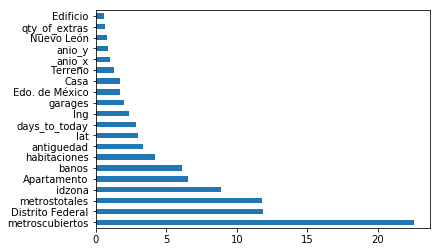

In [59]:
feat_importances = pd.Series(cb_model.best_estimator_.feature_importances_, index=x_test.columns)
feat_importances.nlargest(20).plot(kind='barh')